<a href="https://colab.research.google.com/github/damjag1992/AIRBNB-Analysis_NewJersey/blob/main/AIRBNB_DJ_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#0. Importing necessary modules and libraries




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set()

#1. Import raw data (Jersey City) and get to know its size

In [ ]:
df = pd.read_csv('http://data.insideairbnb.com/united-states/nj/jersey-city/2023-09-18/data/listings.csv.gz', encoding='utf-8', delimiter=',', header=0, low_memory=False)
df.shape

(1324, 75)

The data consists of 1,324 observations and 75 variables. It can be confidently assumed that this is not a large dataset, and its analysis should not be time-consuming due to the data size.

#2. Displaying a sample of the raw data.

In [ ]:
pd.set_option('display.max_columns', None)
df.head(10)

id                          listing_url       scrape_id last_scraped  \
0   40669   https://www.airbnb.com/rooms/40669  20230918050414   2023-09-18   
1  215768  https://www.airbnb.com/rooms/215768  20230918050414   2023-09-18   
2  254245  https://www.airbnb.com/rooms/254245  20230918050414   2023-09-18   
3  269266  https://www.airbnb.com/rooms/269266  20230918050414   2023-09-18   
4  270245  https://www.airbnb.com/rooms/270245  20230918050414   2023-09-18   
5  271255  https://www.airbnb.com/rooms/271255  20230918050414   2023-09-18   
6  508581  https://www.airbnb.com/rooms/508581  20230918050414   2023-09-18   
7  675483  https://www.airbnb.com/rooms/675483  20230918050414   2023-09-18   
8  810860  https://www.airbnb.com/rooms/810860  20230918050414   2023-09-18   
9  818075  https://www.airbnb.com/rooms/818075  20230918050414   2023-09-18   

        source                                               name  \
0  city scrape  Condo in Jersey City · ★5.0 · 1 bedroom · 1 be...   
1  city scrape  Home in Jersey City · ★4.77 · 1 bedroom · 2 be...   
2  city scrape  Home in Jersey City · ★4.76 · 1 bedroom · 1 be...   
3  city scrape  Rental unit in Jersey City · ★4.36 · 2 bedroom...   
4  city scrape  Townhouse in Jersey City · ★4.55 · 1 bedroom ·...   
5  city scrape  Townhouse in Jersey City · ★4.41 · 1 bedroom ·...   
6  city scrape  Rental unit in Jersey City · ★4.46 · 1 bedroom...   
7  city scrape  Townhouse in Jersey City · ★4.77 · 1 bedroom ·...   
8  city scrape  Rental unit in Jersey City · ★5.0 · 1 bedroom ...   
9  city scrape  Guest suite in Jersey City · ★4.93 · 2 bedroom...   

                                         description  \
0  <b>The space</b><br />Skyy’s Lounge ....Everyt...   
1  Walking to distance to Statue of Liberty and E...   
2  Walking to distance to Statue of Liberty and E...   
3  Enjoy that private luxury two bedrooms apartme...   
4  Just for you small bedroom with private bathro...   
5  You can enjoy your stay in large bedroom with ...   
6  JANUARY AND FEBRUARY DISCOUNT! Beautiful large...   
7  Full disclosure - professional photographs mak...   
8  Spacious Studio loft apartment on the ground f...   
9  Our guests tell us that they love coming back ...   

                               neighborhood_overview  \
0  The neighborhood is very diverse & friendly sh...   
1  Such close proximity to NYC, 7 minutes on the ...   
2  Such close proximity to NYC, 7 minutes on the ...   
3  Our House is located in the Liberty State Park...   
4                                                NaN   
5                                                NaN   
6                                                NaN   
7  Downtown Jersey City is right outside of Manha...   
8  The neighborhood is seconds from "Little India...   
9  Our area of Jersey City Heights is quiet and s...   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/af7e4a45-0118...   175412   
1  https://a0.muscache.com/pictures/miso/Hosting-...   846837   
2  https://a0.muscache.com/pictures/miso/Hosting-...   846837   
3  https://a0.muscache.com/pictures/miso/Hosting-...  1410590   
4  https://a0.muscache.com/pictures/miso/Hosting-...  1410590   
5  https://a0.muscache.com/pictures/miso/Hosting-...  1410590   
6  https://a0.muscache.com/pictures/6725344/a82a6...  2506890   
7  https://a0.muscache.com/pictures/miso/Hosting-...  2259684   
8  https://a0.muscache.com/pictures/miso/Hosting-...  3530754   
9  https://a0.muscache.com/pictures/24978455/cebc...  4296829   

                                    host_url  host_name  host_since  \
0   https://www.airbnb.com/users/show/175412       Skyy  2010-07-20   
1   https://www.airbnb.com/users/show/846837  Charlaine  2011-07-20   
2   https://www.airbnb.com/users/show/846837  Charlaine  2011-07-20   
3  https://www.airbnb.com/users/show/1410590      Magda  2011-11-15   
4  https://www.airbnb.com/users/show/1410590      Magda  2011-11-15   
5

#3 Displaying information about variable types and verifying them.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324 entries, 0 to 1323
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            1324 non-null   int64  
 1   listing_url                                   1324 non-null   object 
 2   scrape_id                                     1324 non-null   int64  
 3   last_scraped                                  1324 non-null   object 
 4   source                                        1324 non-null   object 
 5   name                                          1324 non-null   object 
 6   description                                   1317 non-null   object 
 7   neighborhood_overview                         819 non-null    object 
 8   picture_url                                   1324 non-null   object 
 9   host_id                                       1324 non-null   i

3.1 I'm checking if the id column has any missing values, and if so, I'm setting it as the index.

In [ ]:
df['id'].unique().size

1324

In [ ]:
df.set_index('id', inplace=True)

#4.Summary of all variables.

4.1. Numerical variables.

In [ ]:
numeric_values = df.select_dtypes(include='number')
table_sum_1 = numeric_values.describe().T
table_sum_1['missing_values'] = numeric_values.isnull().sum()
table_sum_1['non-numerical values'] = df.apply(lambda col: pd.to_numeric(col, errors='coerce')).isnull().sum()
table_sum_1

count          mean  \
scrape_id                                     1324.0  2.023092e+13   
host_id                                       1324.0  1.720573e+08   
host_listings_count                           1324.0  8.896073e+01   
host_total_listings_count                     1324.0  1.416609e+02   
neighbourhood_group_cleansed                     0.0           NaN   
latitude                                      1324.0  4.072521e+01   
longitude                                     1324.0 -7.405988e+01   
accommodates                                  1324.0  3.693353e+00   
bathrooms                                        0.0           NaN   
bedrooms                                       856.0  1.811916e+00   
beds                                          1311.0  2.024409e+00   
minimum_nights                                1324.0  1.995770e+01   
maximum_nights                                1324.0  5.253535e+02   
minimum_minimum_nights                        1324.0  1.980136e+01   
maximum_minimum_nights                        1324.0  2.328550e+01   
minimum_maximum_nights                        1324.0  7.327258e+02   
maximum_maximum_nights                        1324.0  7.433165e+02   
minimum_nights_avg_ntm                        1324.0  2.275816e+01   
maximum_nights_avg_ntm                        1324.0  7.417782e+02   
calendar_updated                                 0.0           NaN   
availability_30                               1324.0  9.188822e+00   
availability_60                               1324.0  2.668958e+01   
availability_90                               1324.0  4.735121e+01   
availability_365                              1324.0  2.150242e+02   
number_of_reviews                             1324.0  3.160121e+01   
number_of_reviews_ltm                         1324.0  9.290030e+00   
number_of_reviews_l30d                        1324.0  9.599698e-01   
review_scores_rating                          1055.0  4.634000e+00   
review_scores_accuracy                        1051.0  4.679753e+00   
review_scores_cleanliness                     1051.0  4.622274e+00   
review_scores_checkin                         1051.0  4.784206e+00   
review_scores_communication                   1051.0  4.778516e+00   
review_scores_location                        1051.0  4.553882e+00   
review_scores_value                           1051.0  4.565081e+00   
calculated_host_listings_count                1324.0  9.392749e+00   
calculated_host_listings_count_entire_homes   1324.0  5.260574e+00   
calculated_host_listings_count_private_rooms  1324.0  4.114048e+00   
calculated_host_listings_count_shared_rooms   1324.0  3.021148e-03   
reviews_per_month                             1055.0  1.549261e+00   

                                                       std           min  \
scrape_id                                     0.000000e+00  2.023092e+13   
host_id                                       1.680958e+08  1.603800e+04   
host_listings_count                           3.886616e+02  1.000000e+00   
host_total_listings_count                     5.266934e+02  1.000000e+00   
neighbourhood_group_cleansed                           NaN           NaN   
latitude                                      1.524731e-02  4.068723e+01   
longitude                                     1.749072e-02 -7.410753e+01   
accommodates                                  2.511877e+00  1.000000e+00   
bathrooms                                              NaN           NaN   
bedrooms                                      1.047815e+00  1.000000e+00   
beds                                          1.367903e+00  1.000000e+00   
minimum_nights                                4.409547e+01  1.000000e+00   
maximum_nights                                4.318885e+02  3.000000e+00   
minimum_minimum_nights                        4.618808e+01  1.000000e+00   
maximum_minimum_nights                        5.323276e+01  1.000000e+00   
minimum_maximum_nights        

4.2. Categorical variables.

In [ ]:
categorical_values = df.select_dtypes(include='object')
table_sum_2 = categorical_values.describe().T
table_sum_2['missing_values'] = categorical_values.isnull().sum()
table_sum_2

count unique  \
listing_url             1324   1324   
last_scraped            1324      2   
source                  1324      2   
name                    1324    820   
description             1317   1127   
neighborhood_overview    819    525   
picture_url             1324   1276   
host_url                1324    579   
host_name               1324    508   
host_since              1324    534   
host_location           1047     56   
host_about               737    290   
host_response_time      1291      4   
host_response_rate      1291     43   
host_acceptance_rate    1272     61   
host_is_superhost       1304      2   
host_thumbnail_url      1324    560   
host_picture_url        1324    560   
host_neighbourhood      1122     43   
host_verifications      1324      5   
host_has_profile_pic    1324      2   
host_identity_verified  1324      2   
neighbourhood            819      5   
neighbourhood_cleansed  1324      6   
property_type           1324     26   
room_type               1324      4   
bathrooms_text          1324     18   
amenities               1324   1186   
price                   1324    322   
has_availability        1324      2   
calendar_last_scraped   1324      2   
first_review            1055    763   
last_review             1055    320   
license                   50     45   
instant_bookable        1324      2   

                                                                      top  \
listing_url                            https://www.airbnb.com/rooms/40669   
last_scraped                                                   2023-09-18   
source                                                        city scrape   
name                    Rental unit in Jersey City · 1 bedroom · 1 bed...   
description             Soaring 50 stories above the Hudson River, thi...   
neighborhood_overview   Why stay in Manhattan when you can savor the p...   
picture_url             https://a0.muscache.com/pictures/hosting/Hosti...   
host_url                       https://www.airbnb.com/users/show/30283594   
host_name                                            Global Luxury Suites   
host_since                                                     2015-03-30   
host_location                                             Jersey City, NJ   
host_about              New York City based avid traveler and investor...   
host_response_time                                         within an hour   
host_response_rate                                                   100%   
host_acceptance_rate                                                 100%   
host_is_superhost                                                       f   
host_thumbnail_url      https://a0.muscache.com/im/pictures/user/61fc8...   
host_picture_url        https://a0.muscache.com/im/pictures/user/61fc8...   
host_neighbourhood                                            The Heights   
host_verifications                                     ['email', 'phone']   
host_has_profile_pic                                                    t   
host_identity_verified                                                  t   
neighbourhood                      Jersey City, New Jersey, United States   
neighbourhood_cleansed               Ward E (councilmember James Solomon)   
property_type                                          Entire rental unit   
room_type                                                 Entire home/apt   
bathrooms_text                                                     1 bath   
amenities               ["Coffee", "Paid parking off premises", "Washe...   
price                                                             $219.00   
has_availability                                                        t   
calendar_last_scraped                                          2023-09-18   
first_review                                                   2023-09-04   
last_review                                                    2023-09-04   


#5. Checking for missing values in the dataset.

In [ ]:
df_isna = df.isna().sum() > 0
df.loc[:, df_isna].isna().sum().sort_values(ascending=False)/len(df)*100

calendar_updated                100.000000
neighbourhood_group_cleansed    100.000000
bathrooms                       100.000000
license                          96.223565
host_about                       44.335347
neighbourhood                    38.141994
neighborhood_overview            38.141994
bedrooms                         35.347432
host_location                    20.921450
review_scores_location           20.619335
review_scores_communication      20.619335
review_scores_checkin            20.619335
review_scores_cleanliness        20.619335
review_scores_accuracy           20.619335
review_scores_value              20.619335
first_review                     20.317221
last_review                      20.317221
review_scores_rating             20.317221
reviews_per_month                20.317221
host_neighbourhood               15.256798
host_acceptance_rate              3.927492
host_response_rate                2.492447
host_response_time                2.492447
host_is_superhost                 1.510574
beds                              0.981873
description                       0.528701
dtype: float64

#6. Visualizing the distributions of all variables using the Sweetviz library. I separate the reports into one for numerical variables and another for categorical variables.

In [ ]:
!pip install sweetviz -qq
!echo '[Layout]' > Override.ini
!echo 'show_logo = 0' >> Override.ini

6.1. Numerical variables.

                                             |          | [  0%]   00:00 -> (? left)

Report Numeric_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



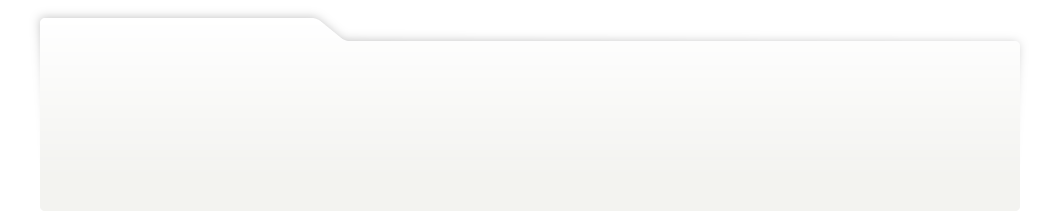
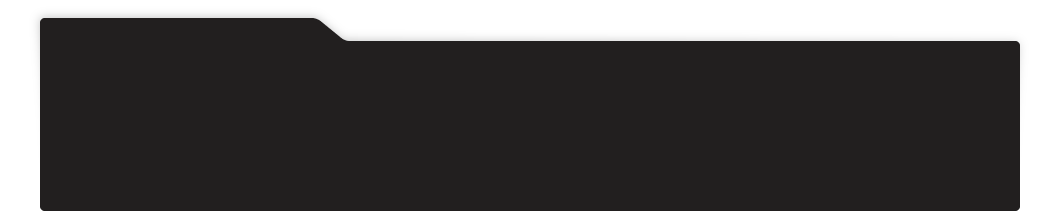
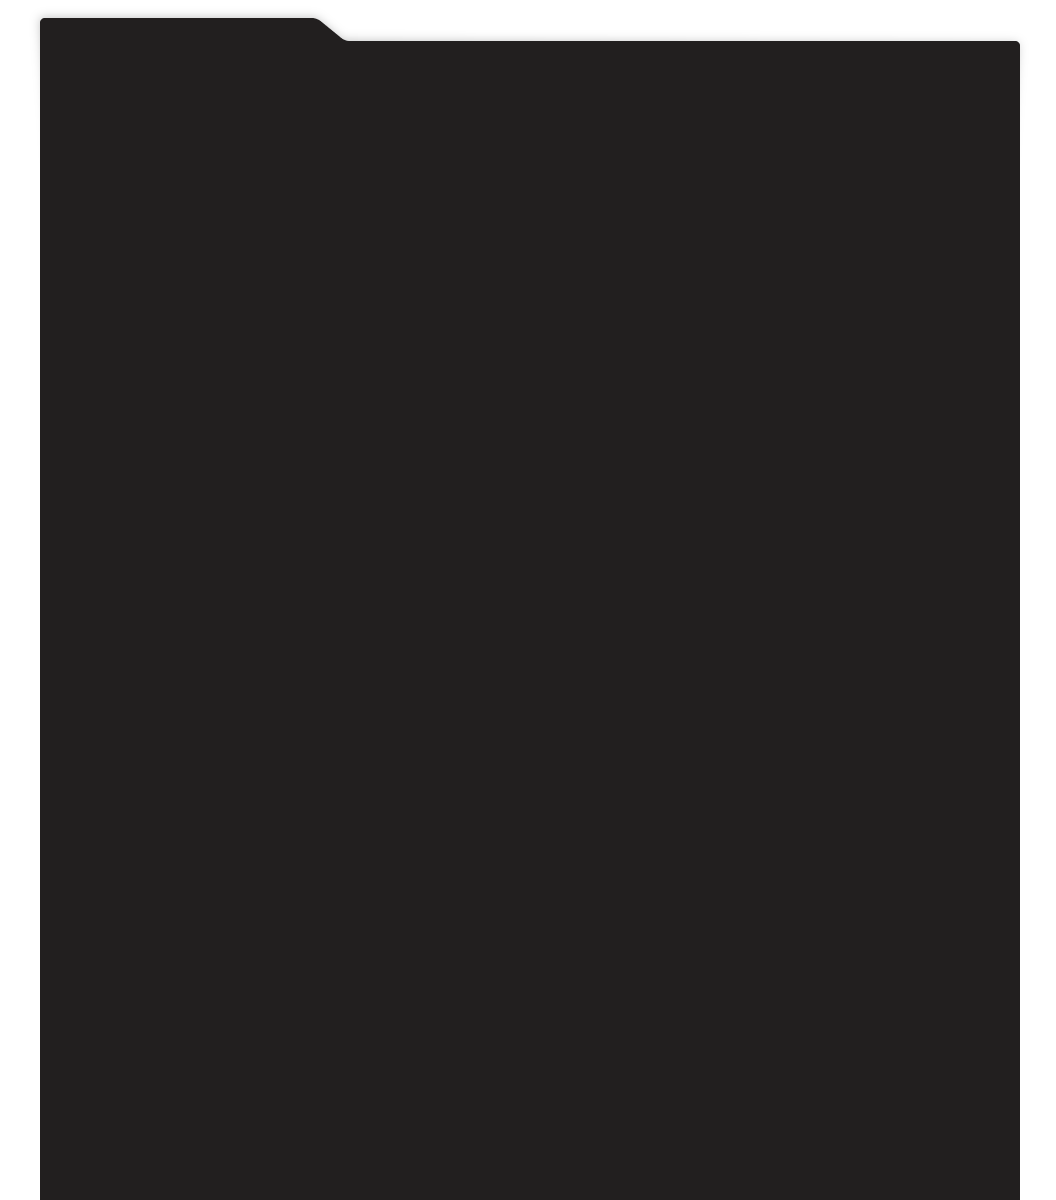
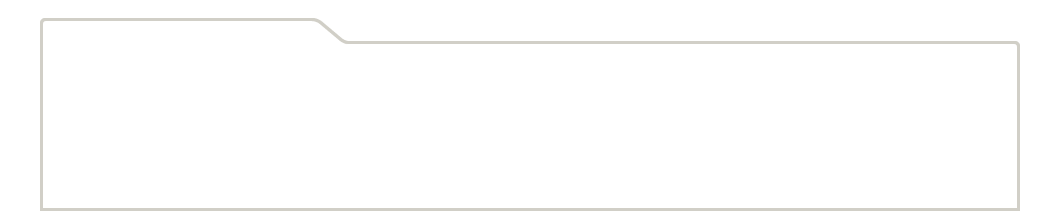
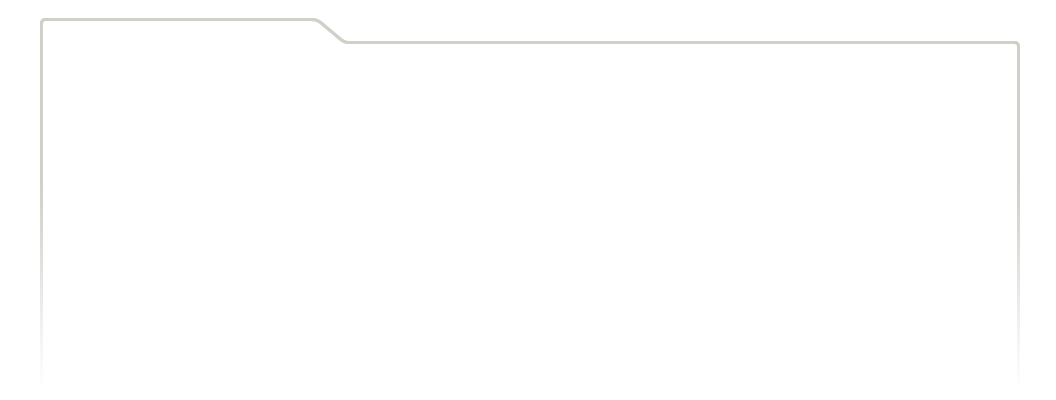
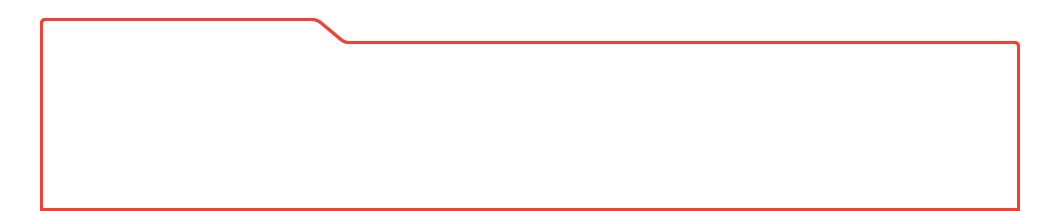
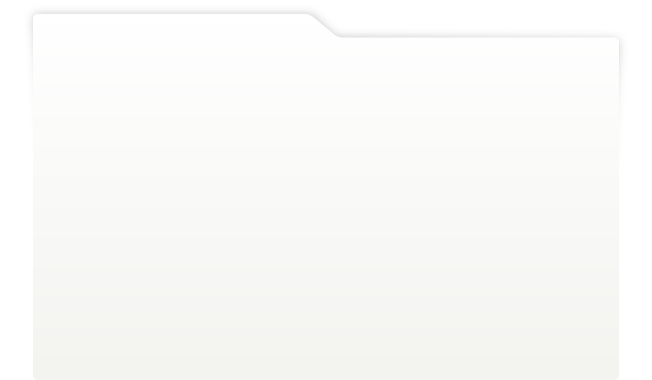
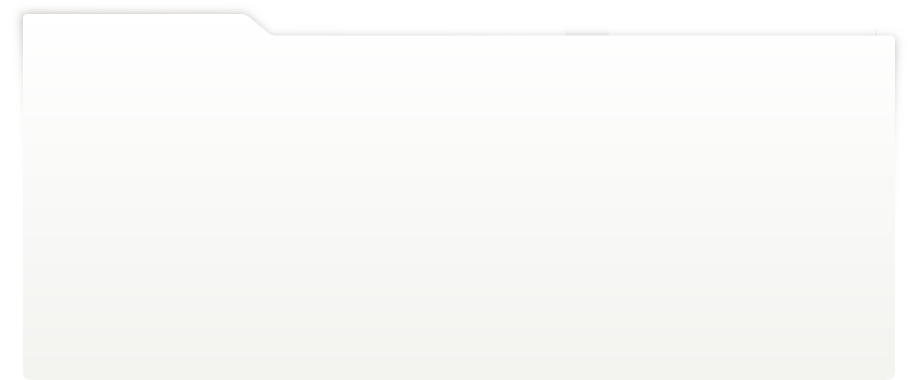
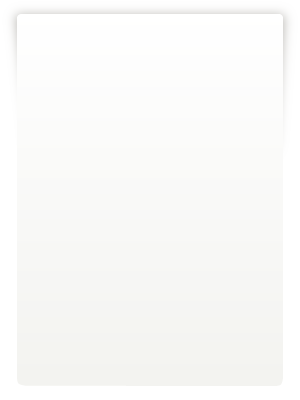
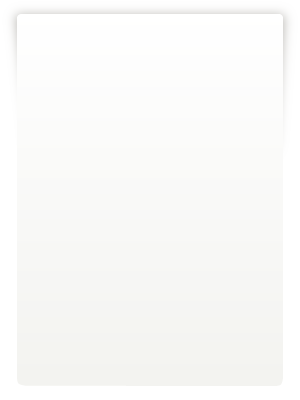
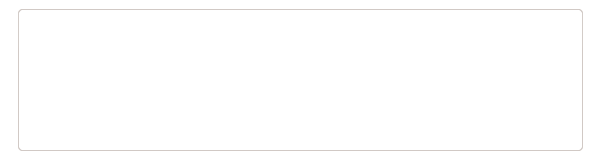
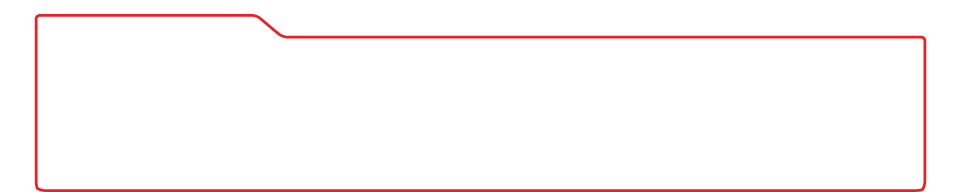
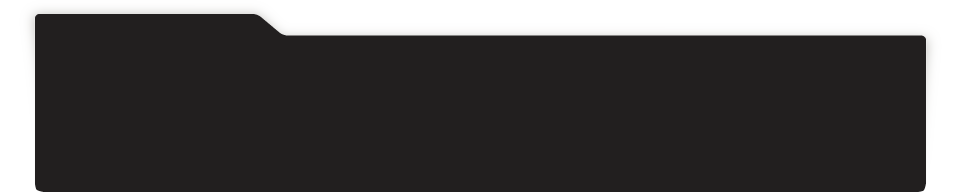
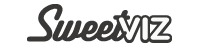
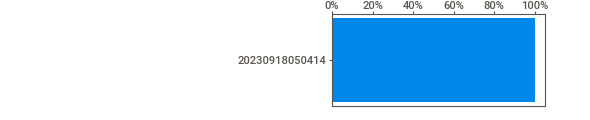
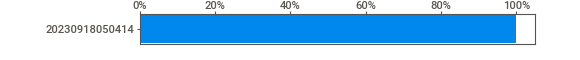
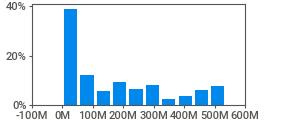
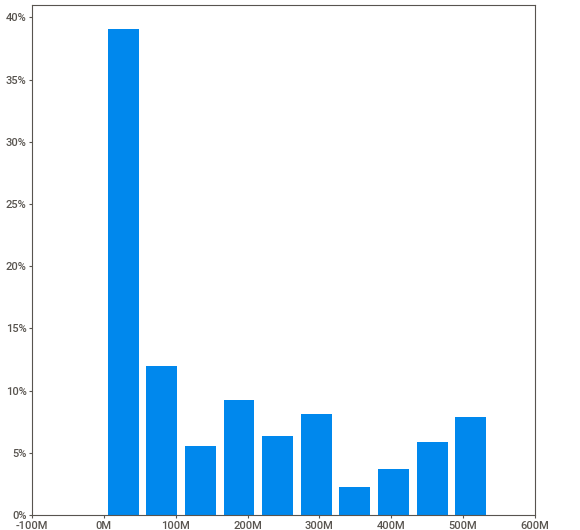
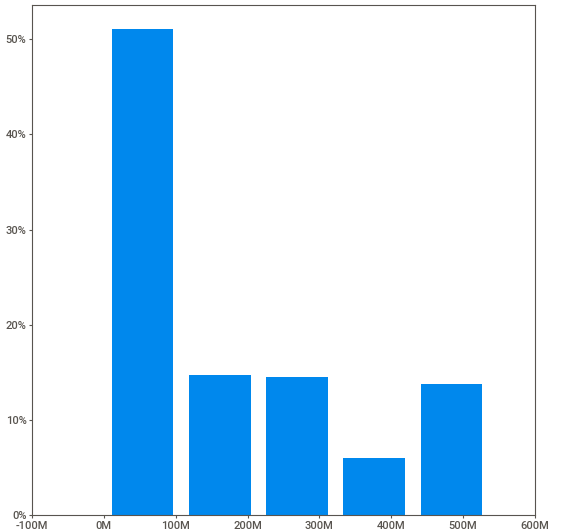
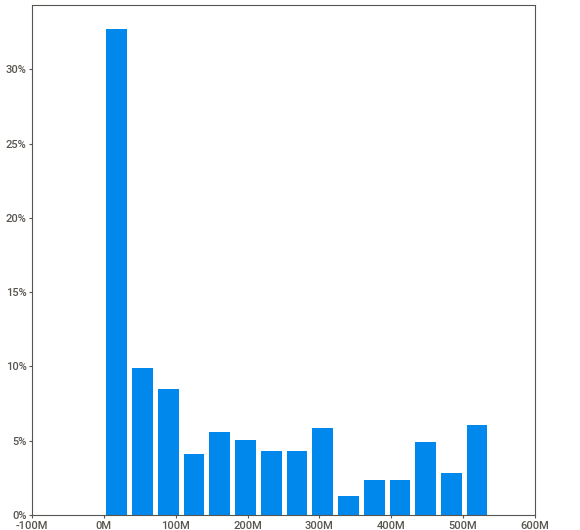
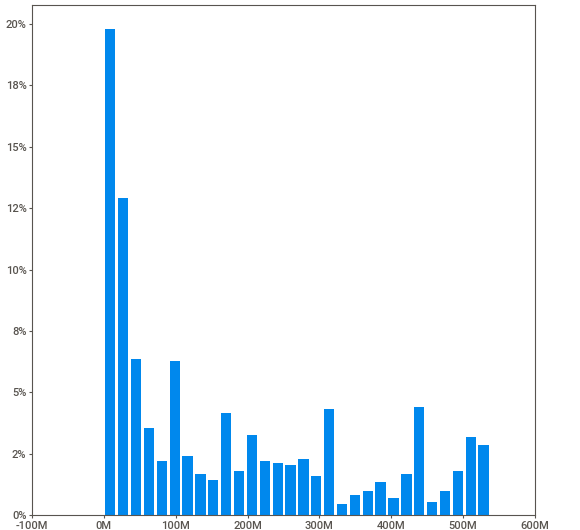
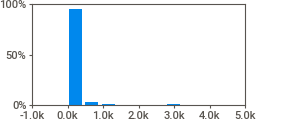
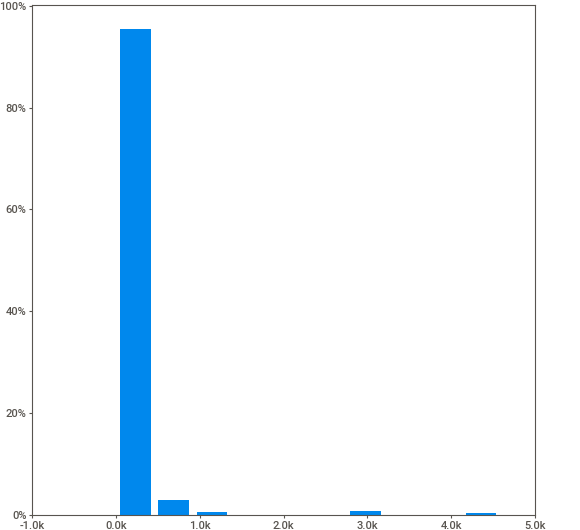
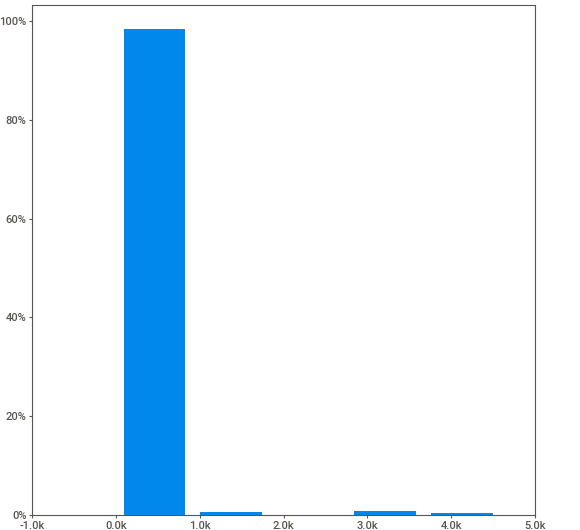
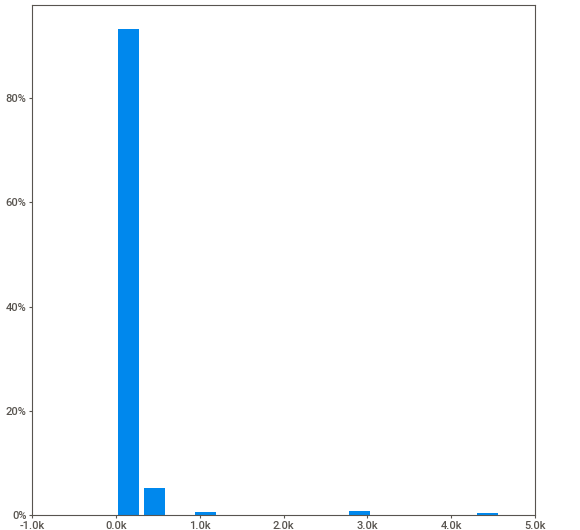
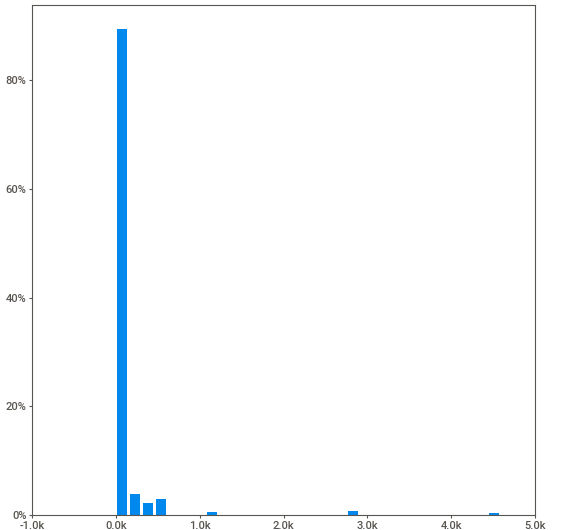
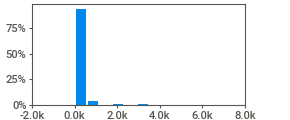
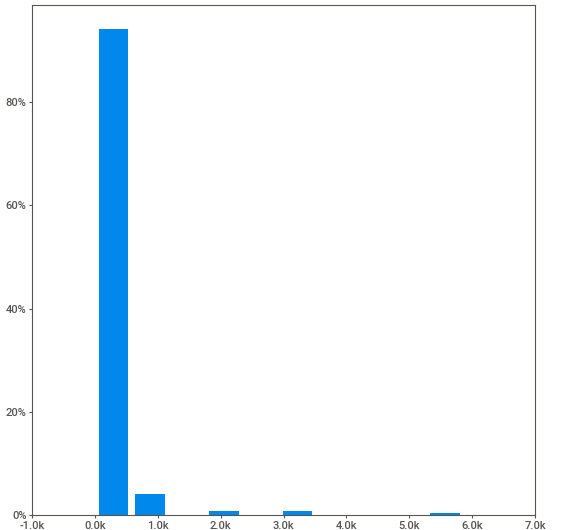
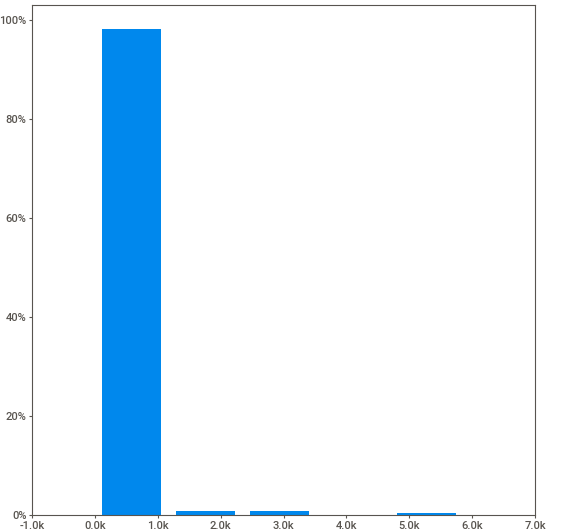
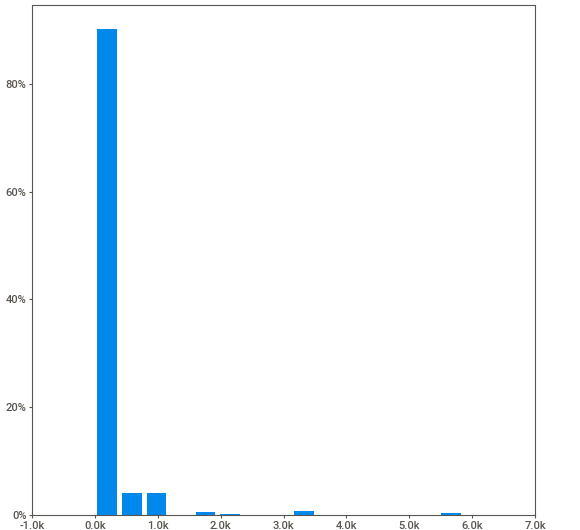
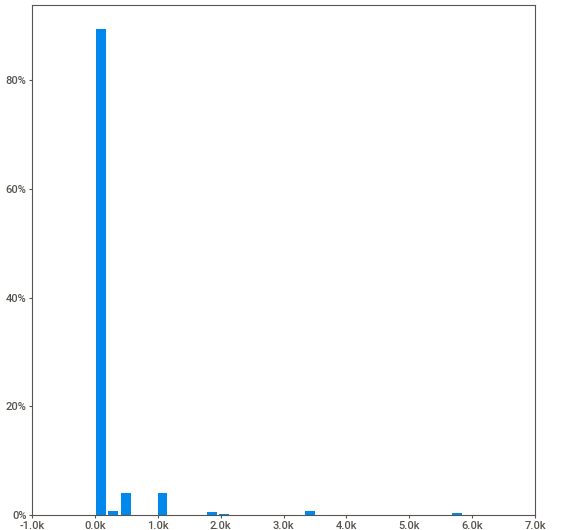
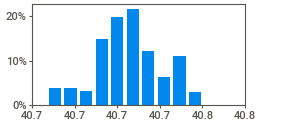
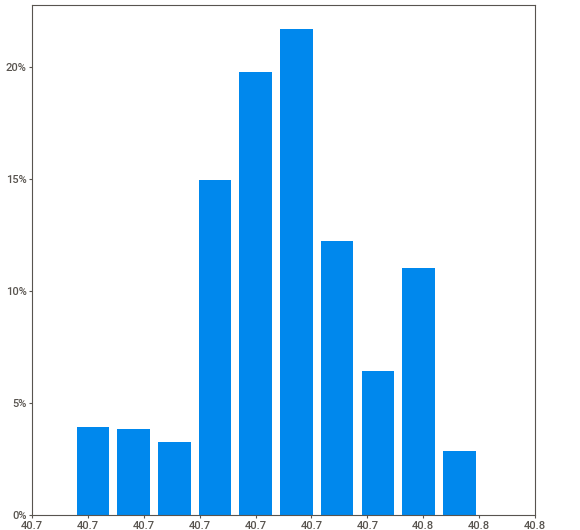
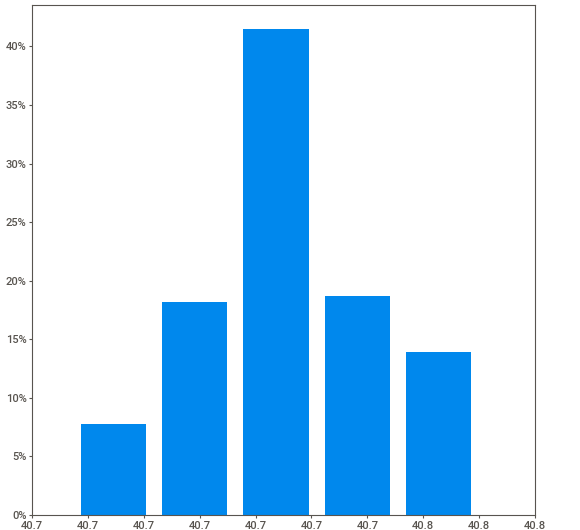
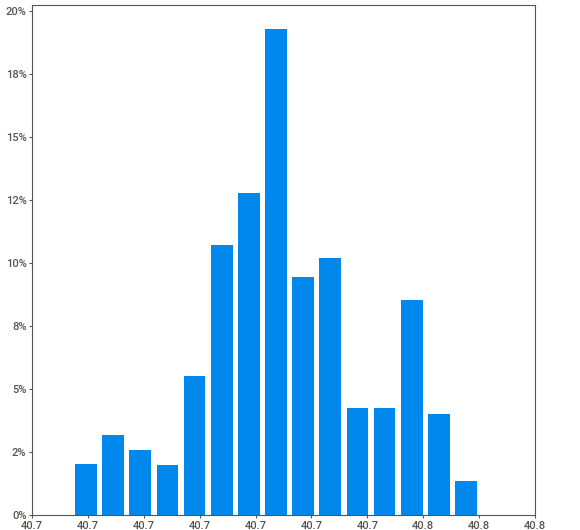
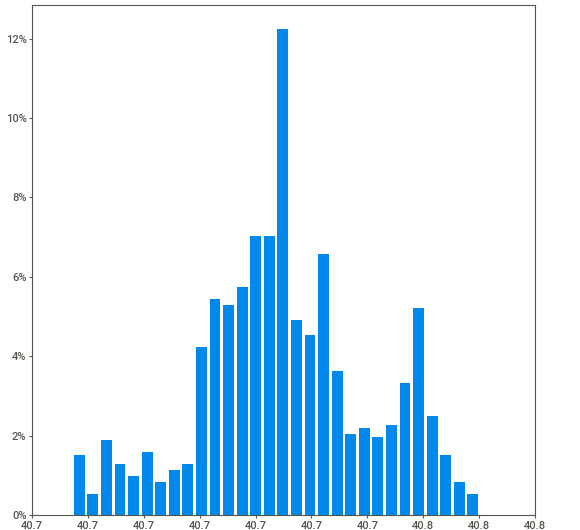
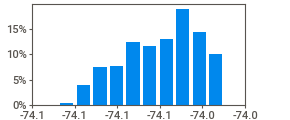
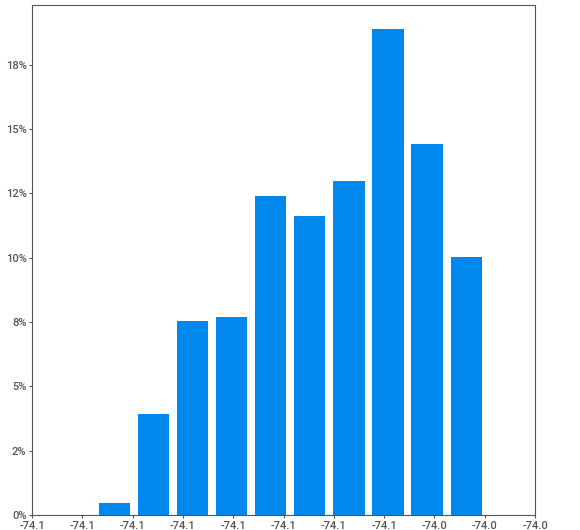
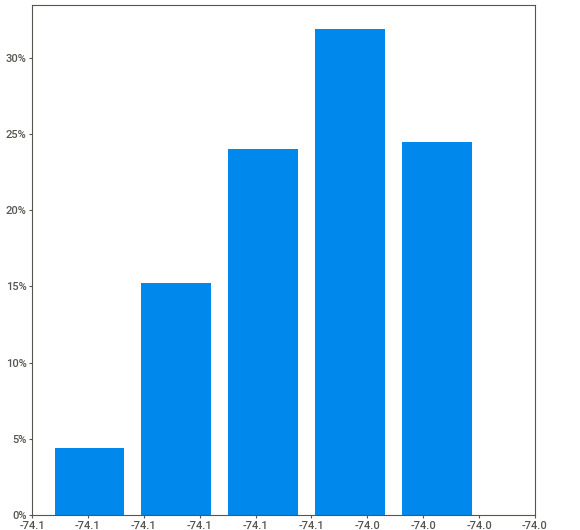
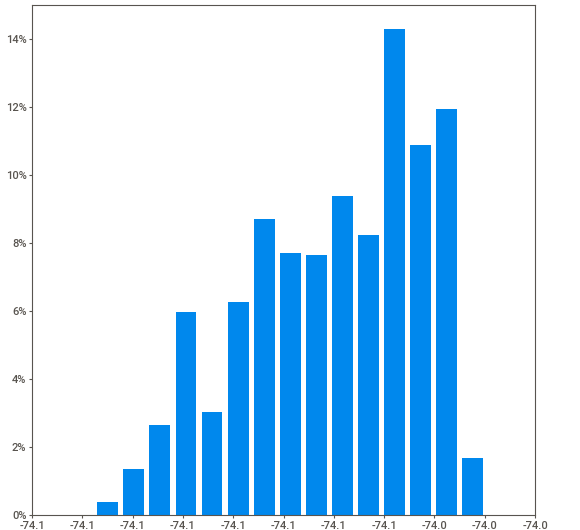
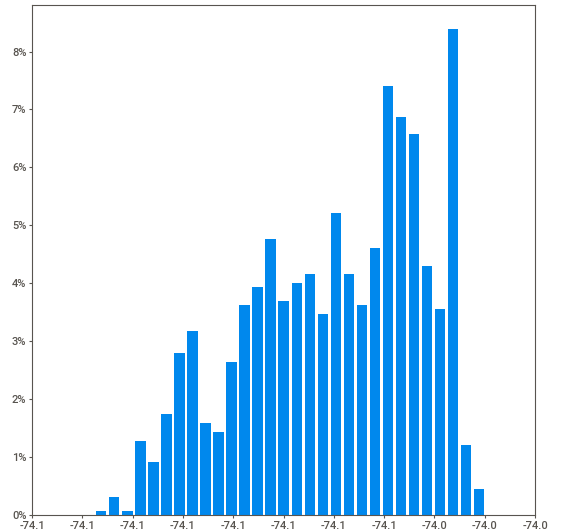
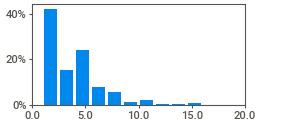
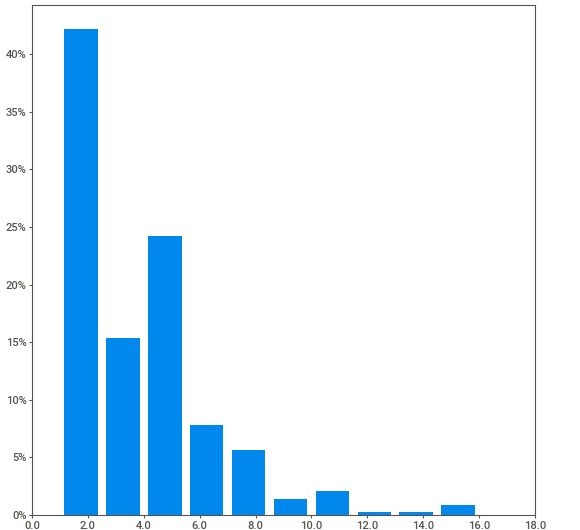
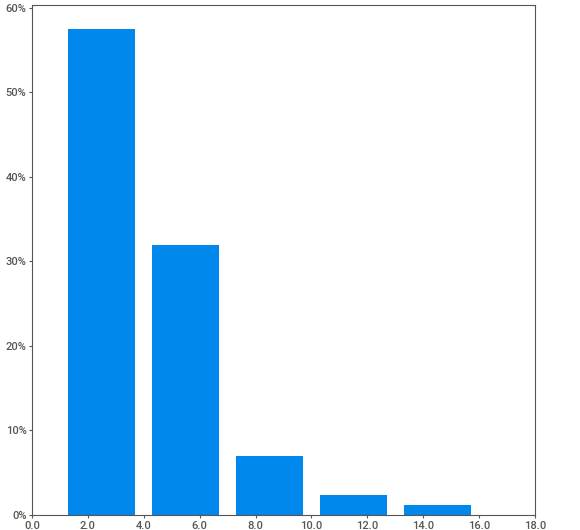
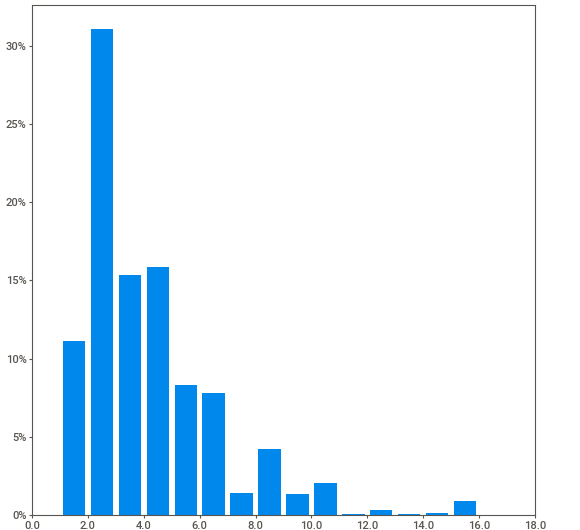
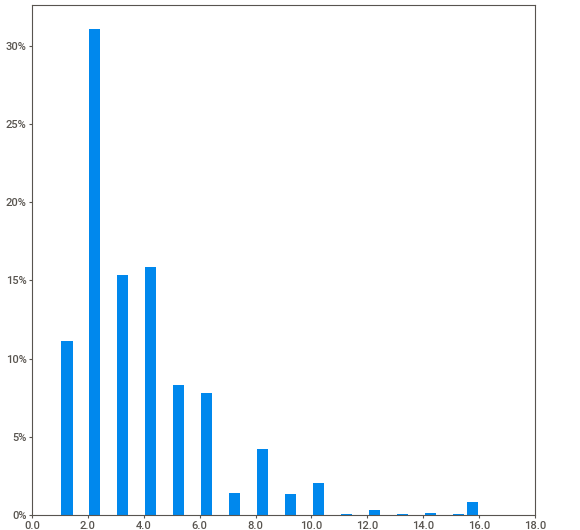
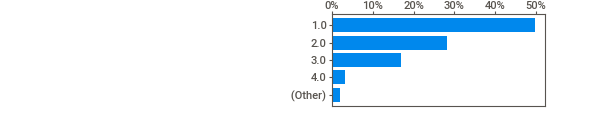
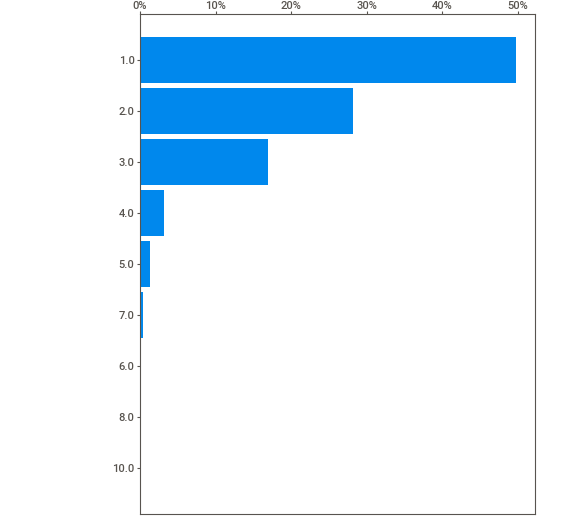
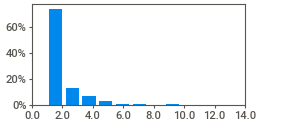
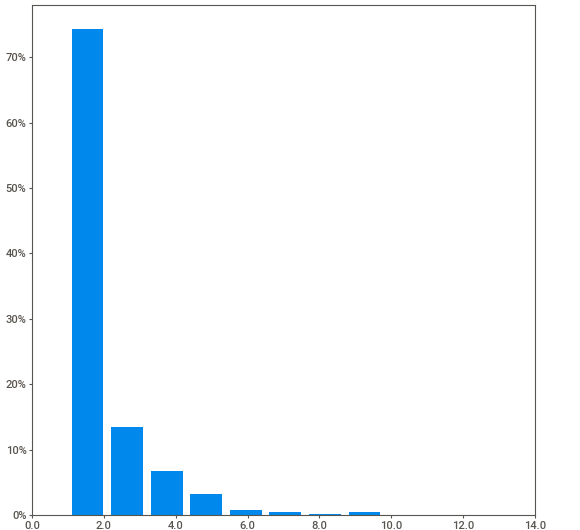
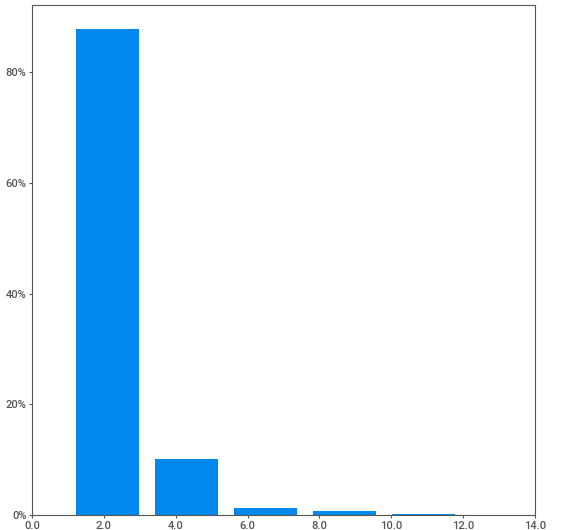
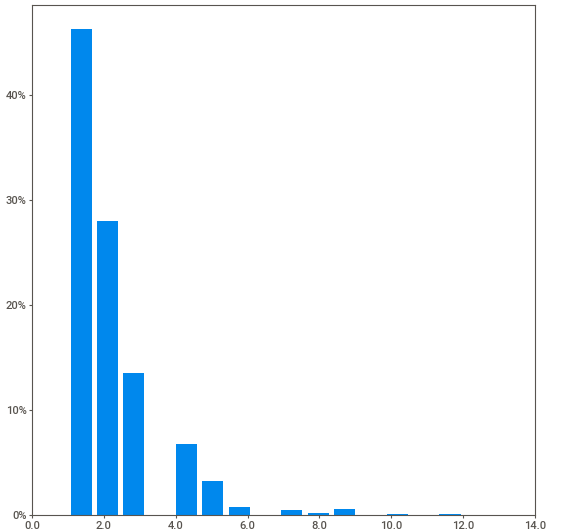
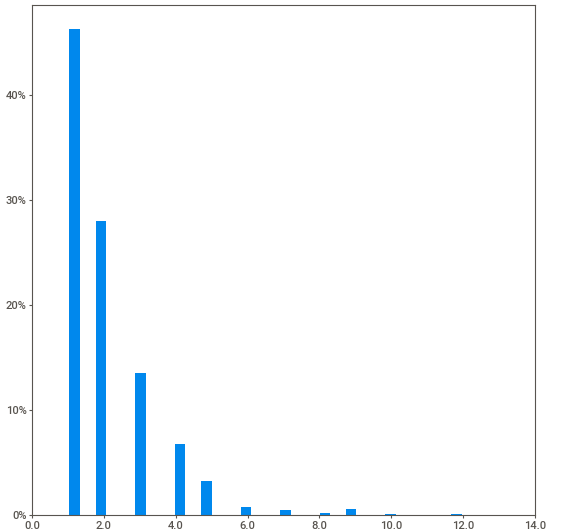
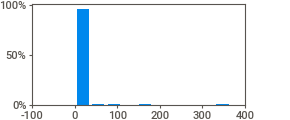
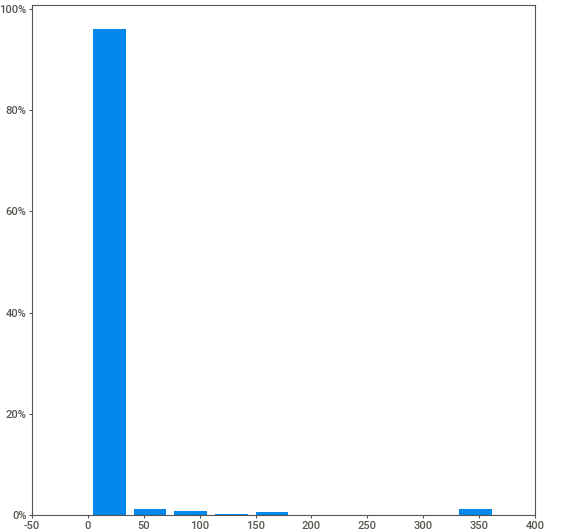
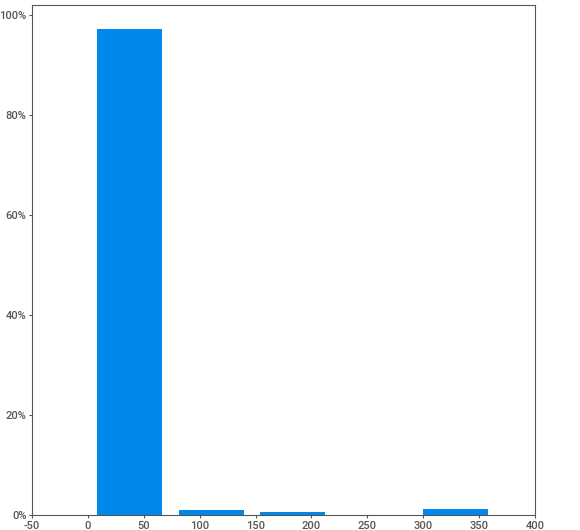
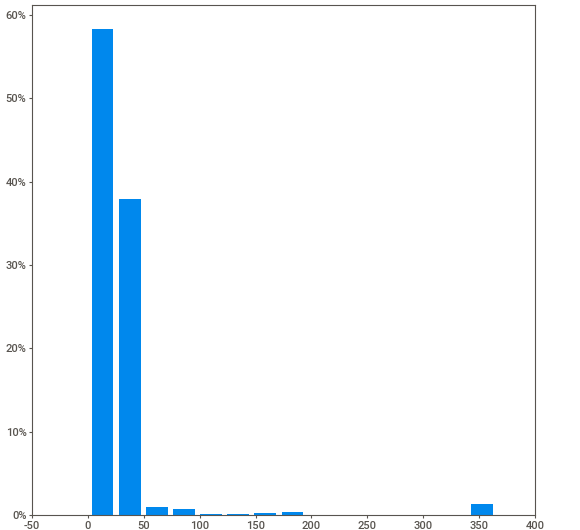
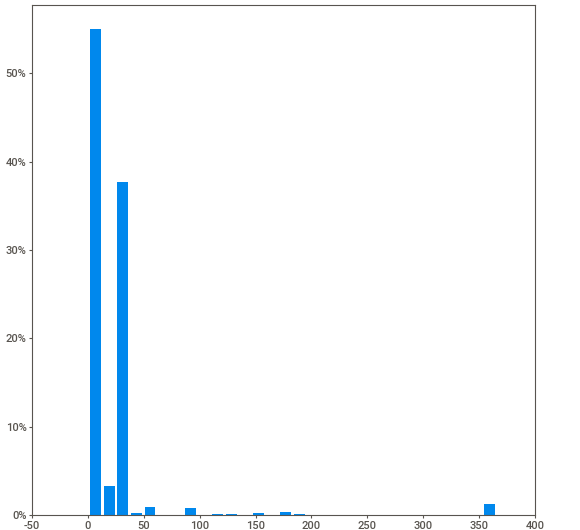
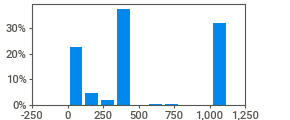
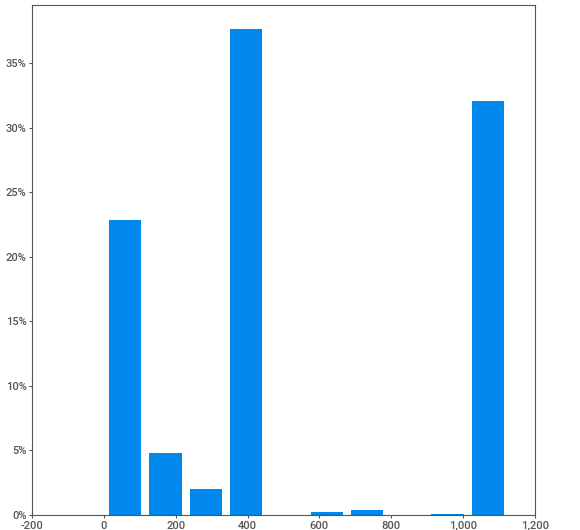
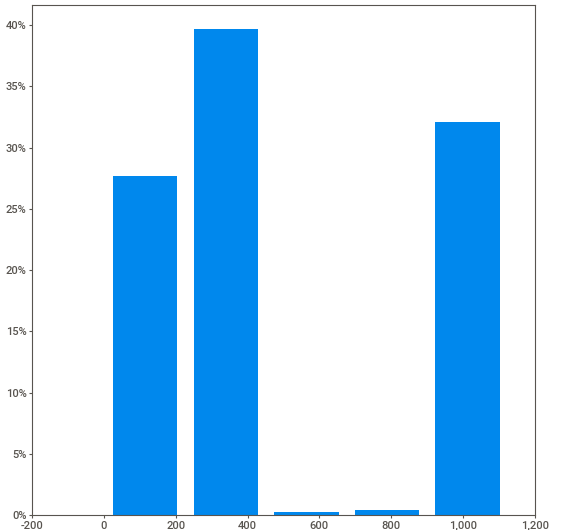
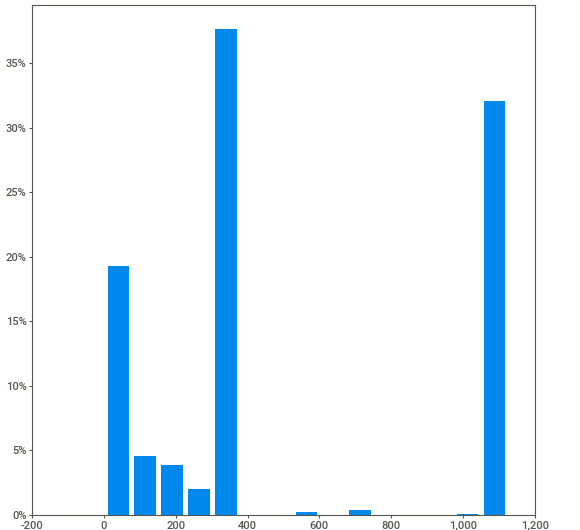
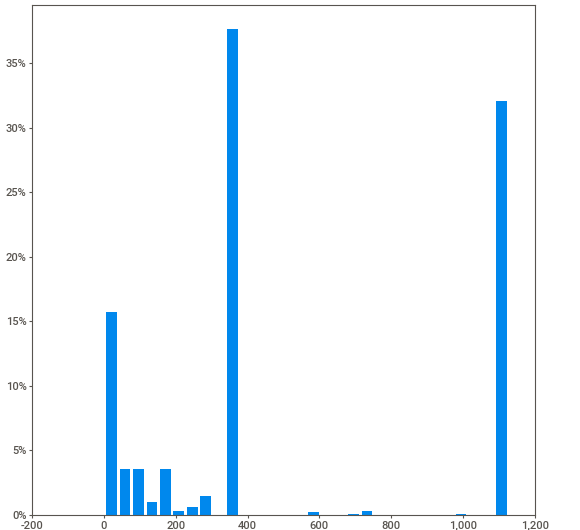
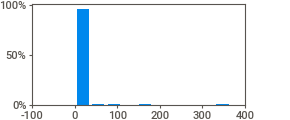
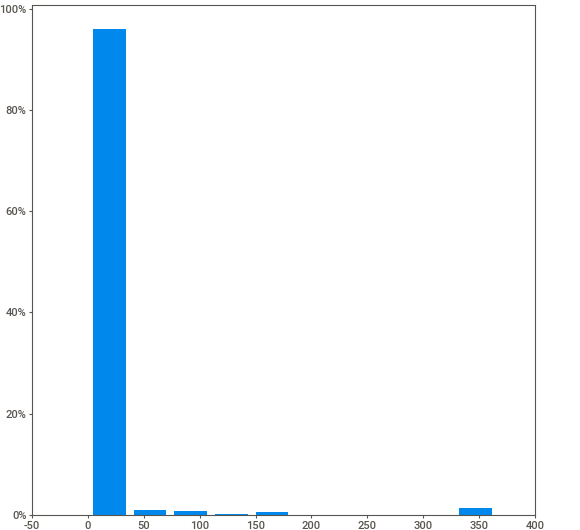
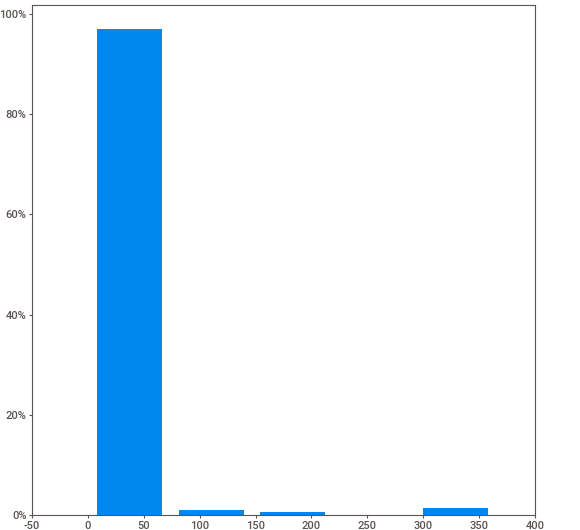
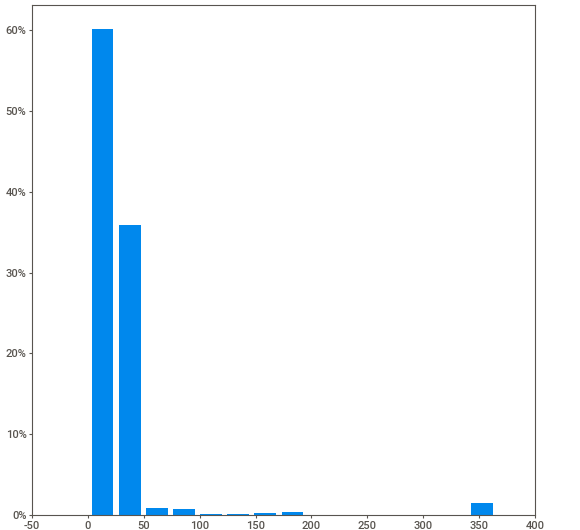
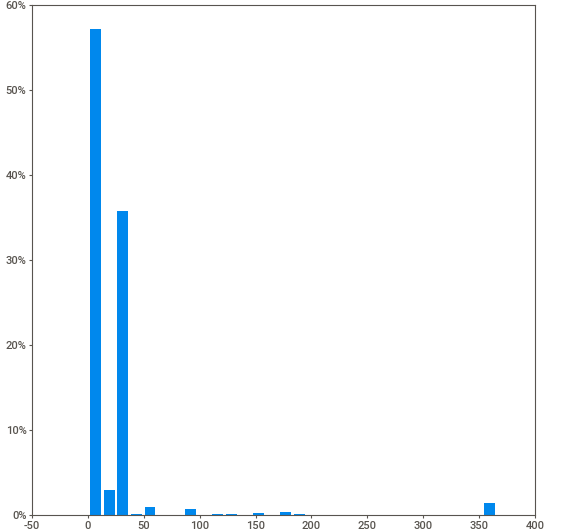
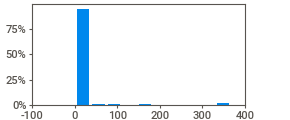
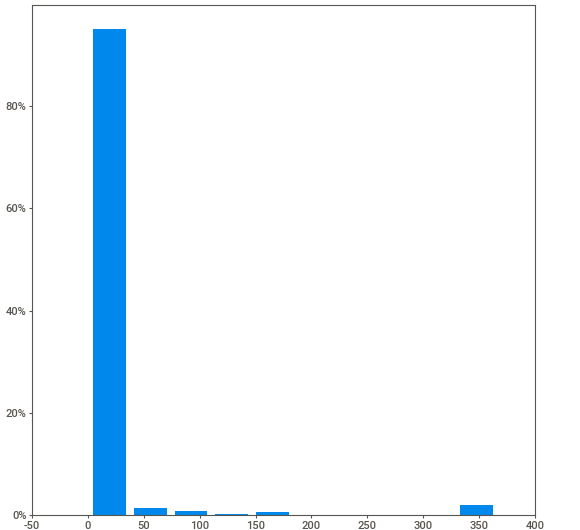
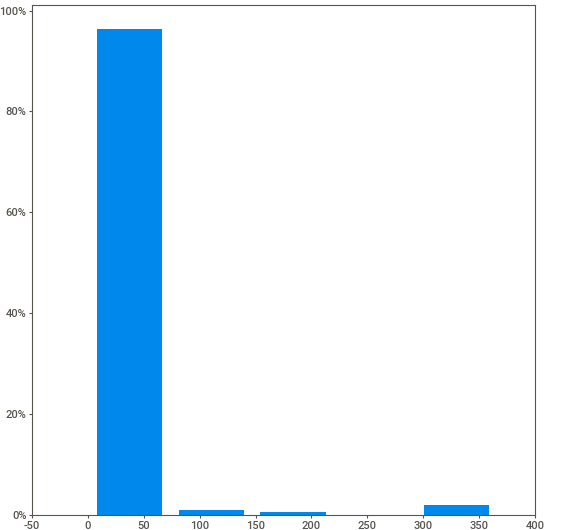
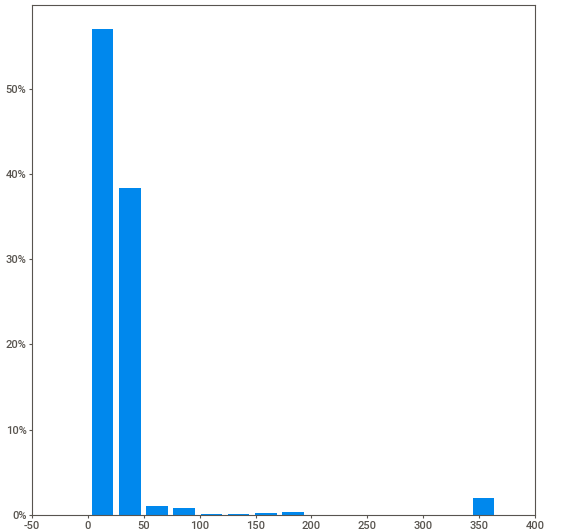
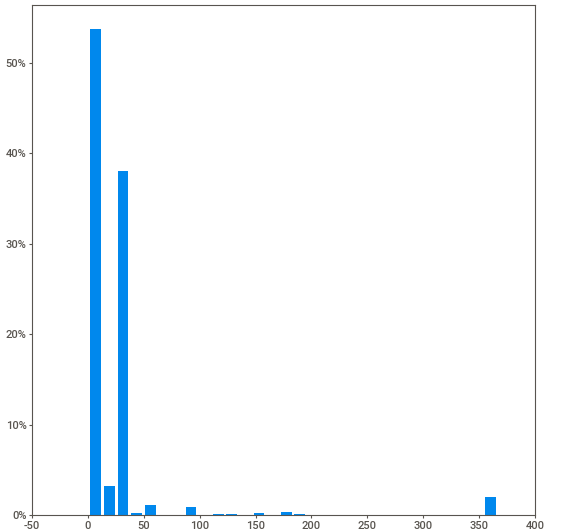
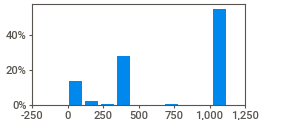
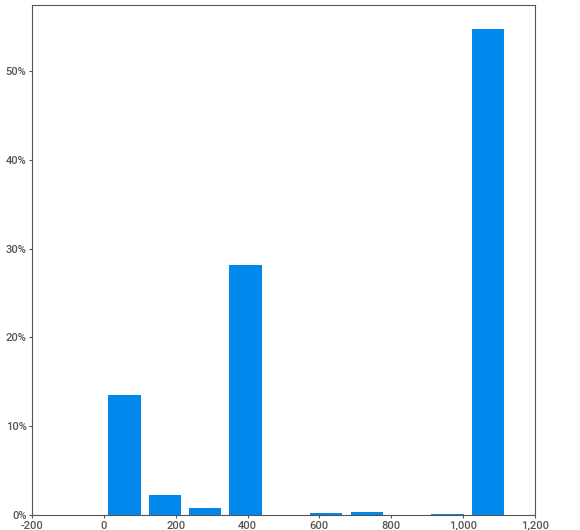
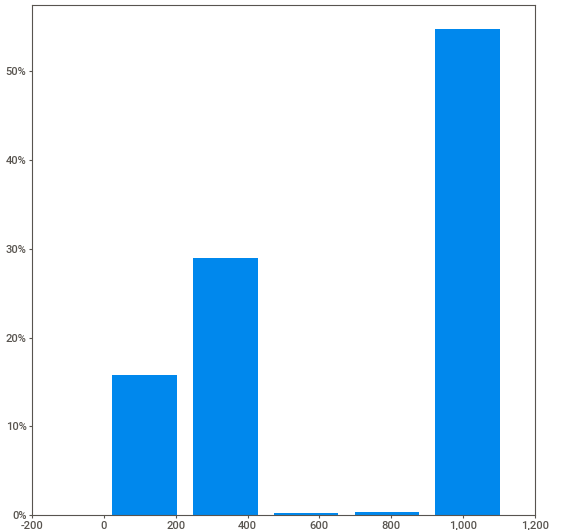
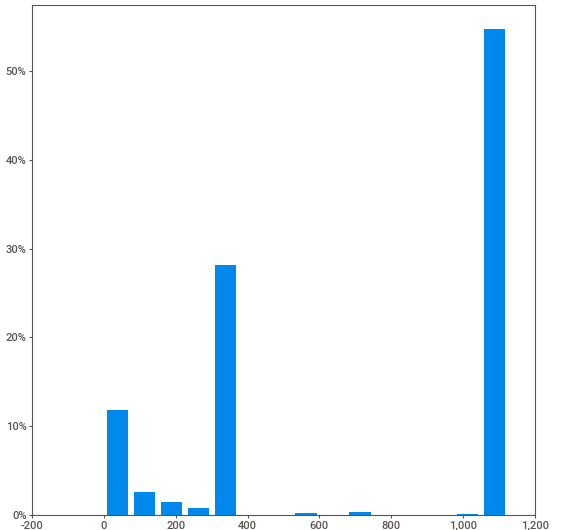
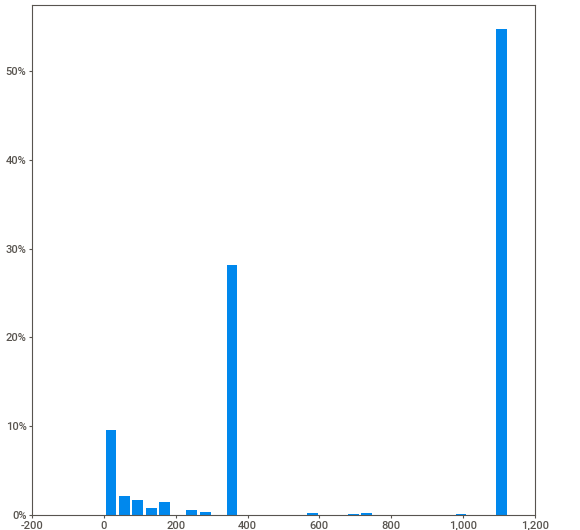
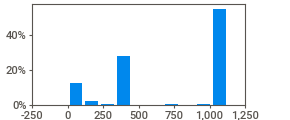
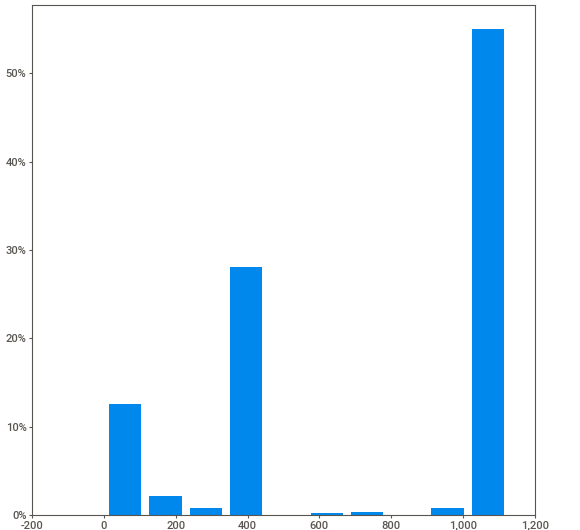
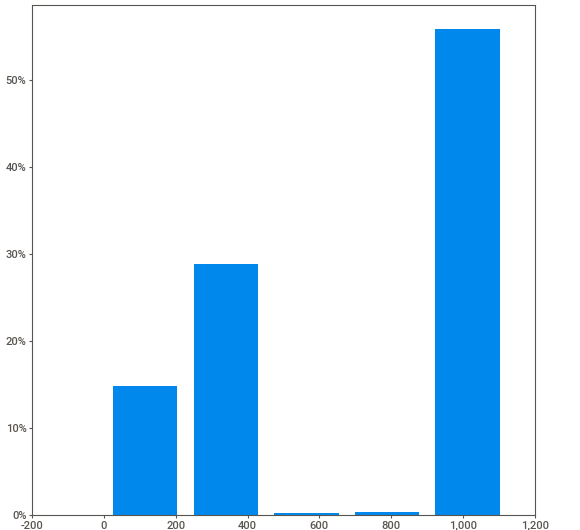
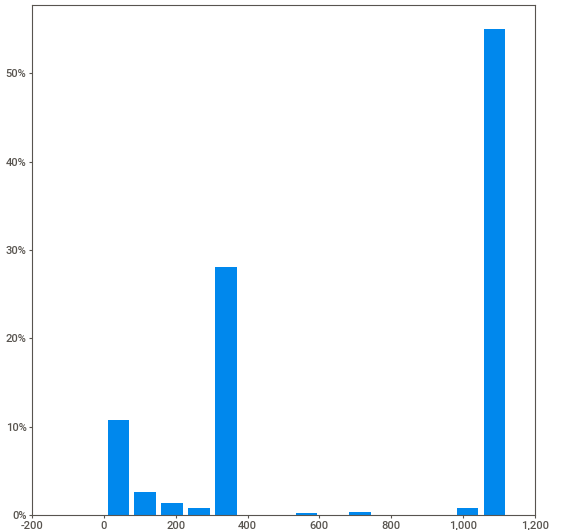
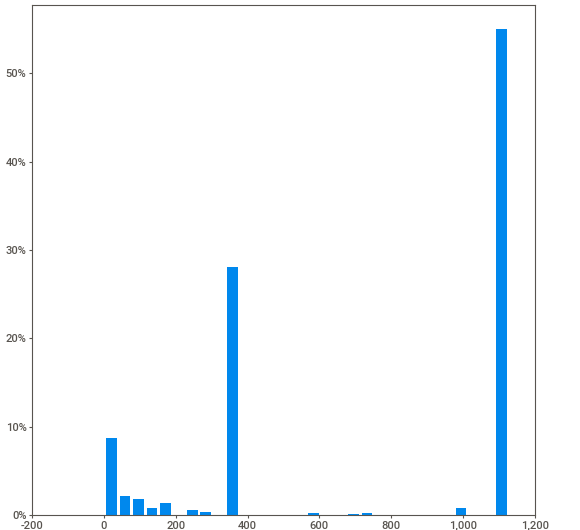
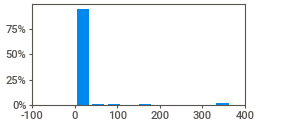
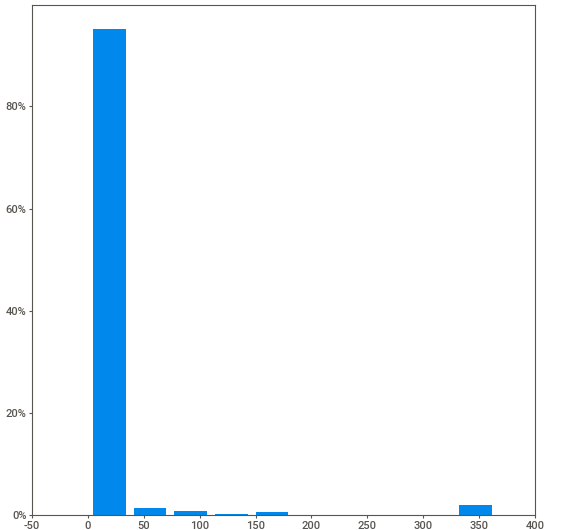
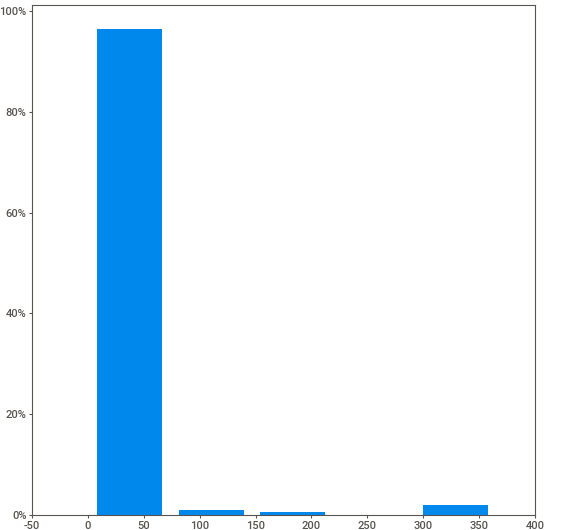
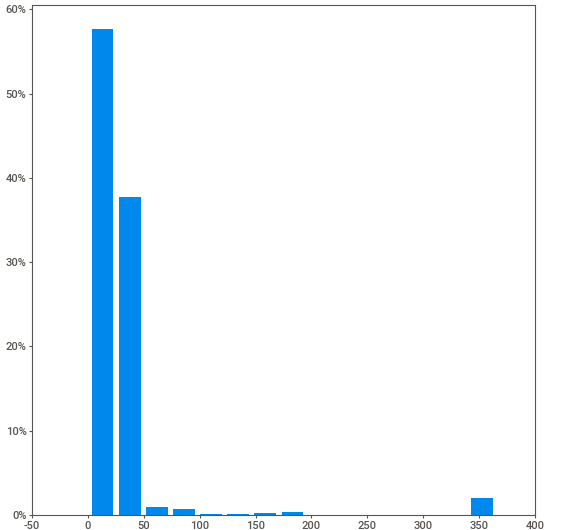
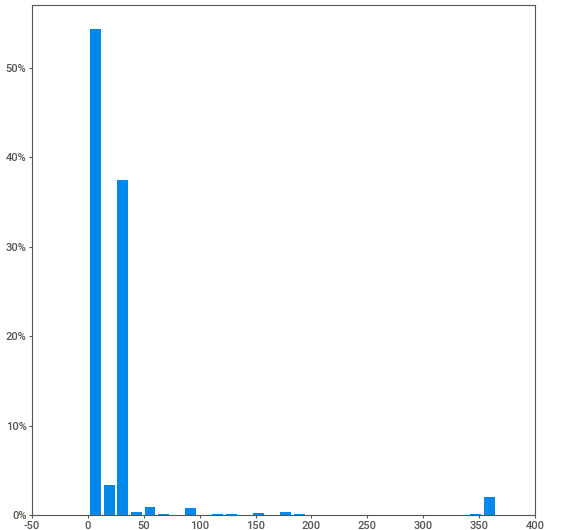
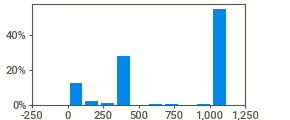
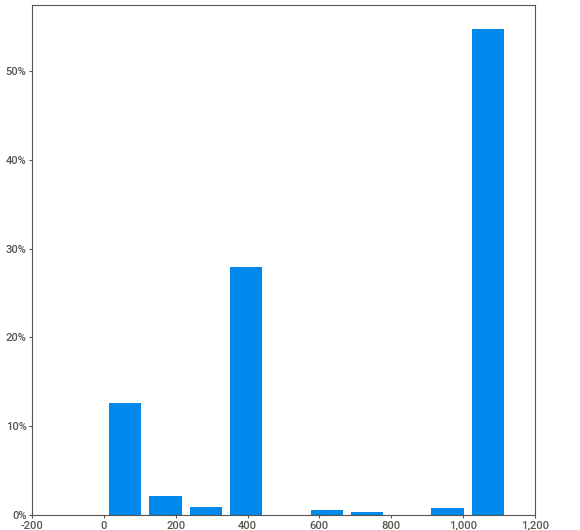
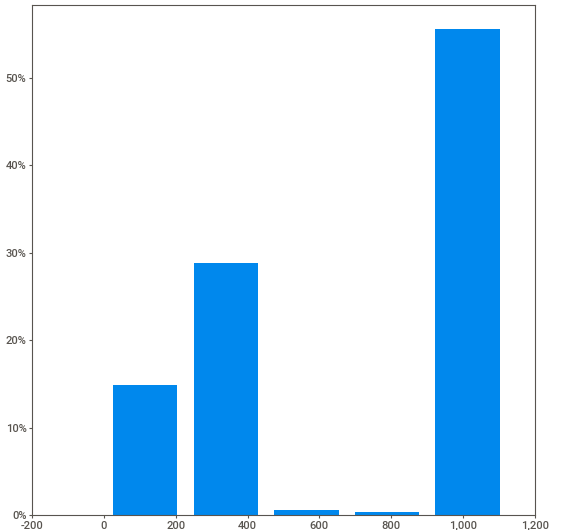
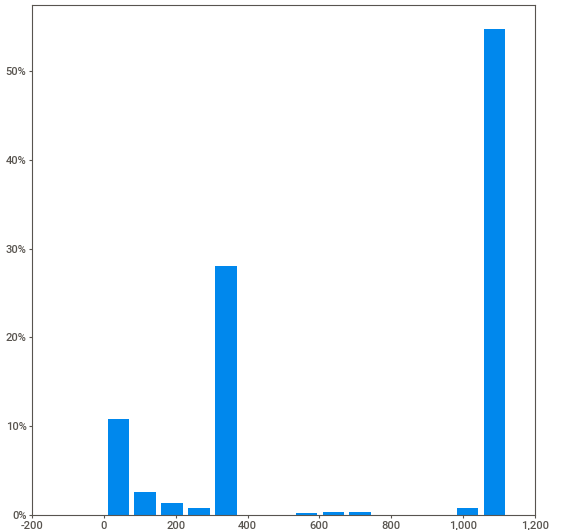
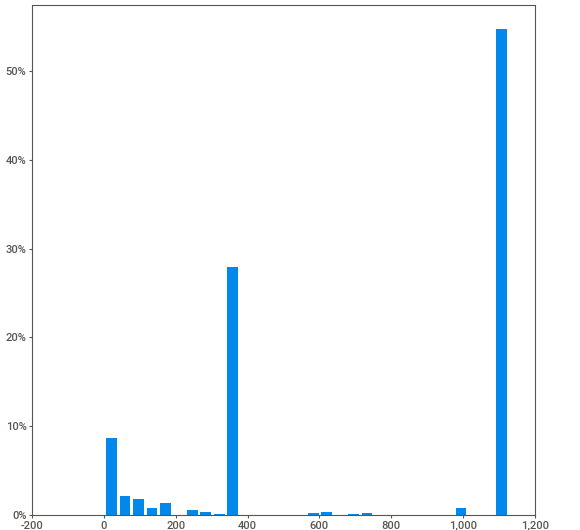
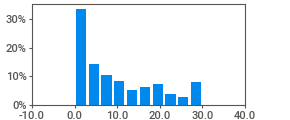
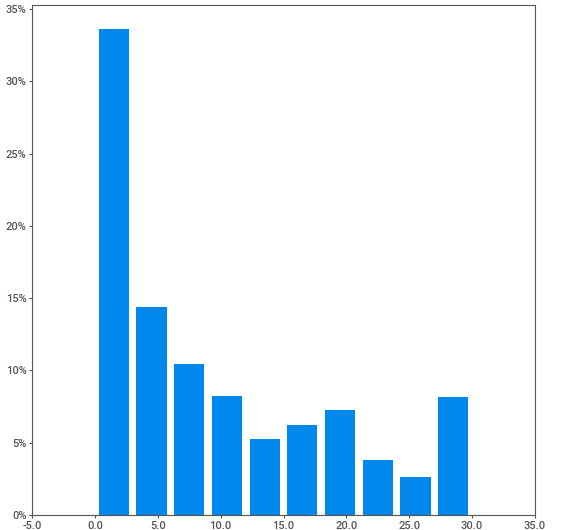
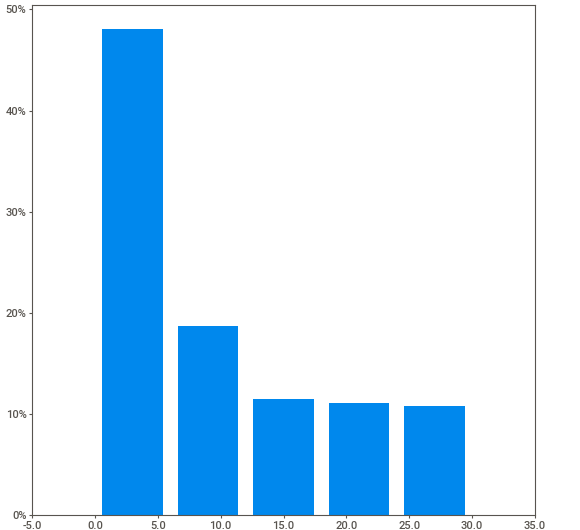
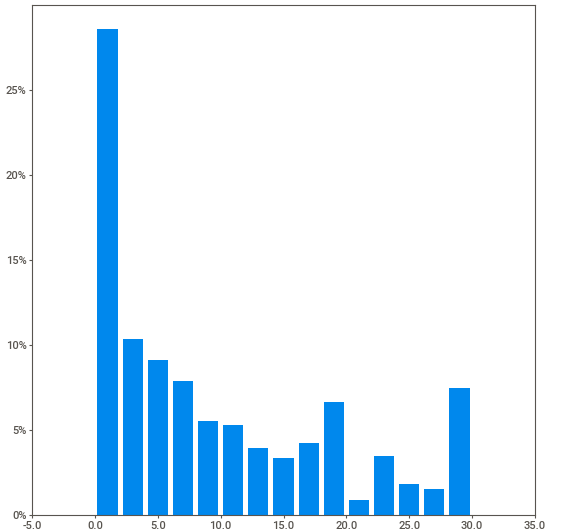
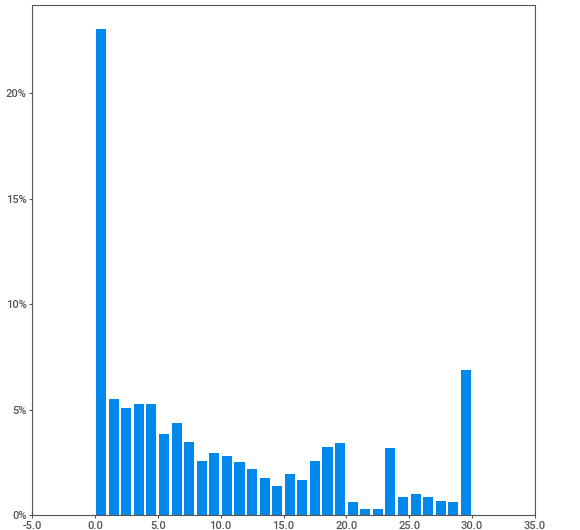
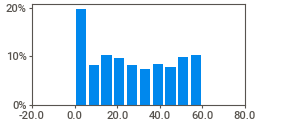
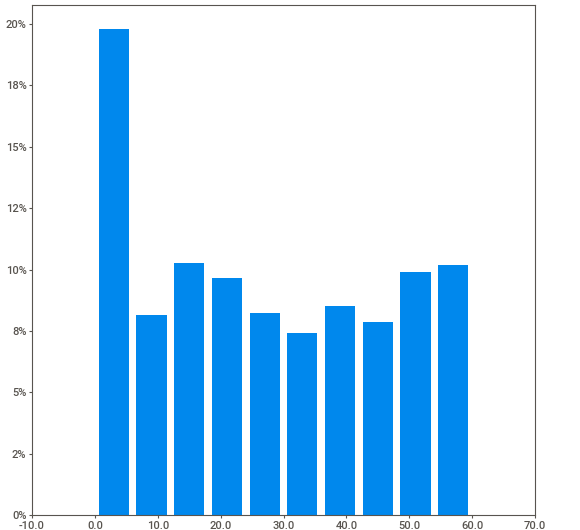
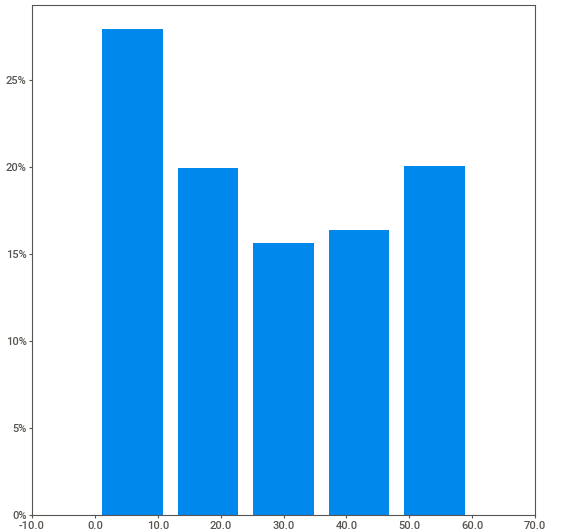
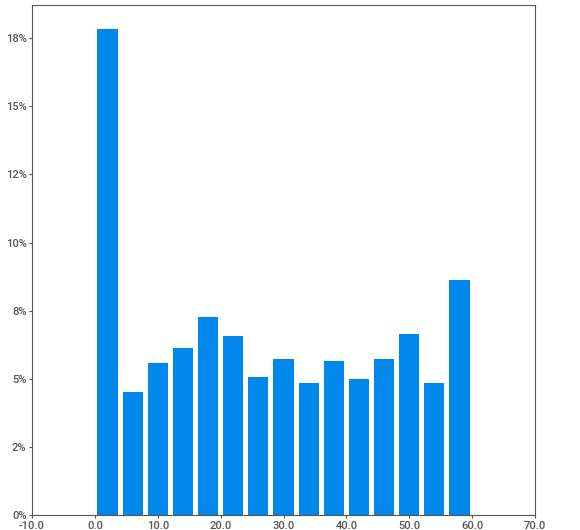
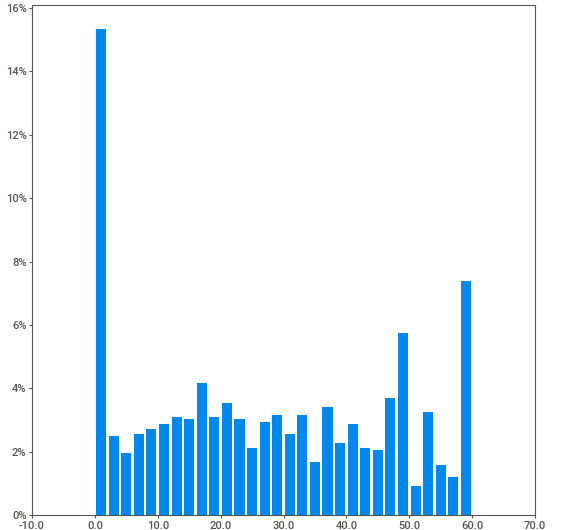
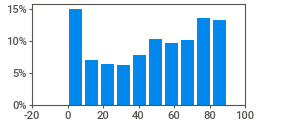
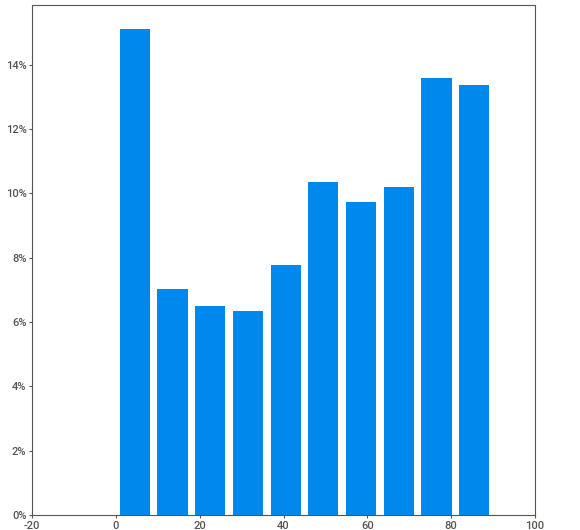
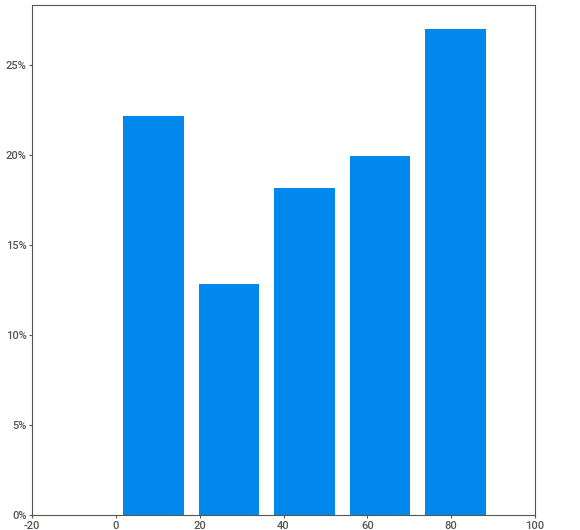
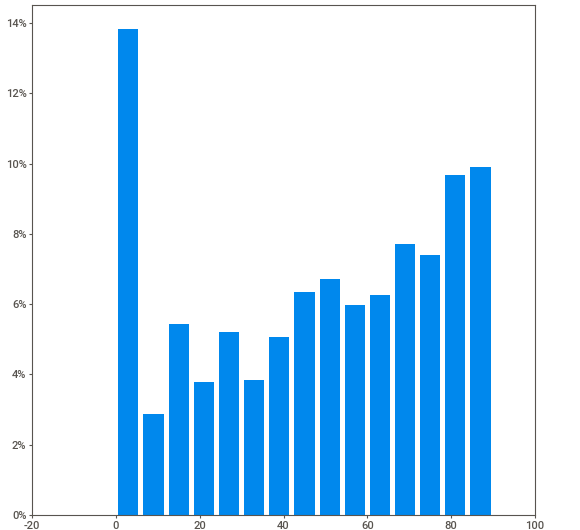
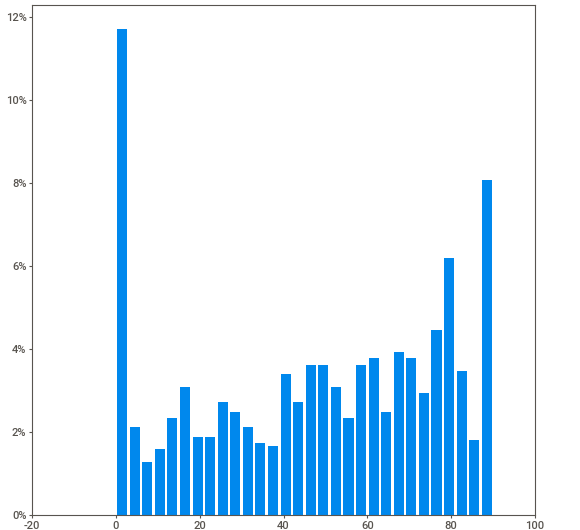
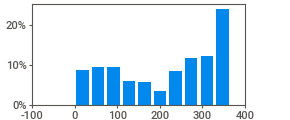
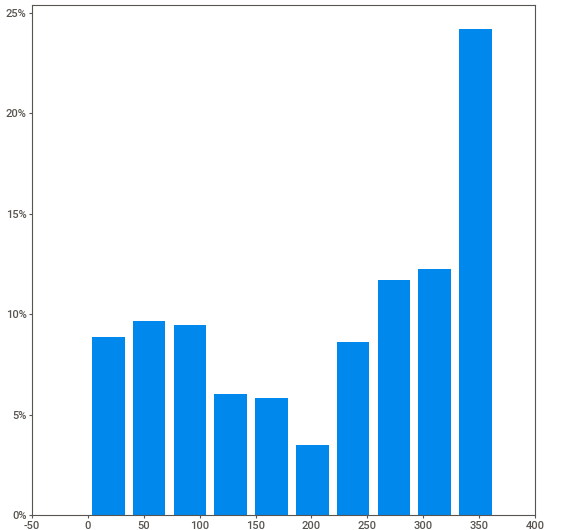
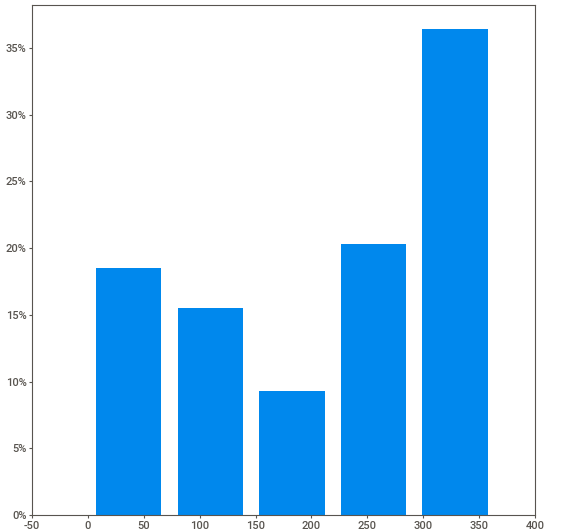
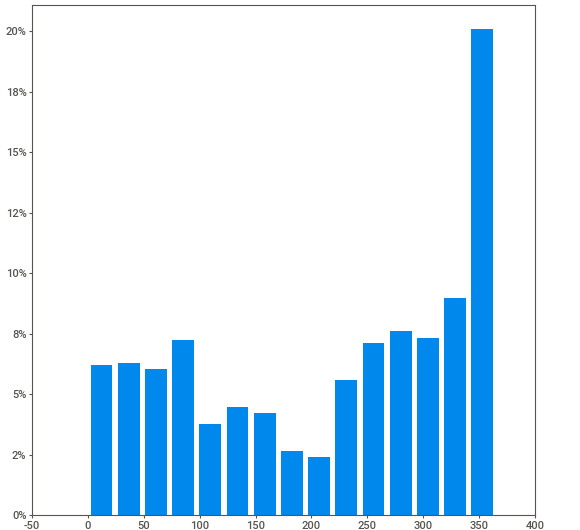
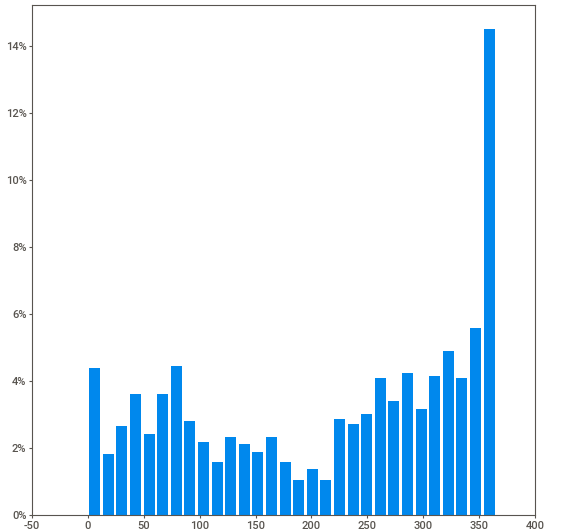
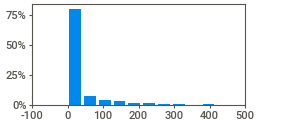
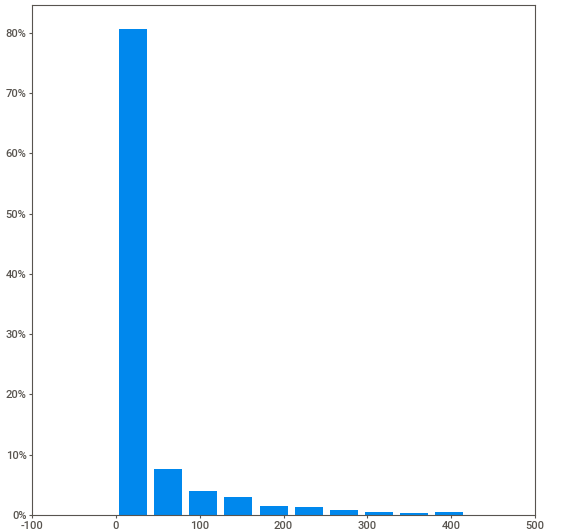
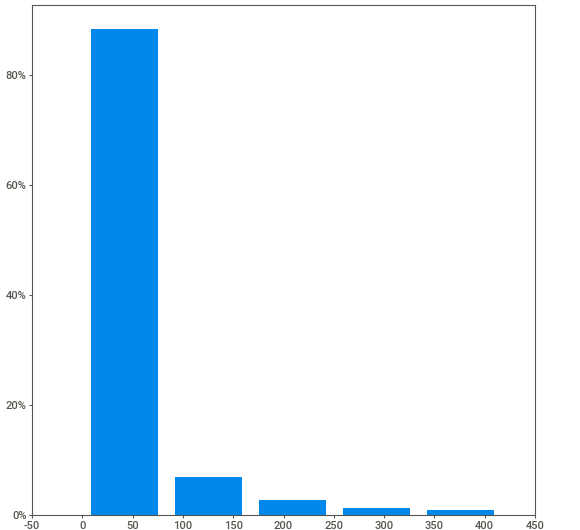
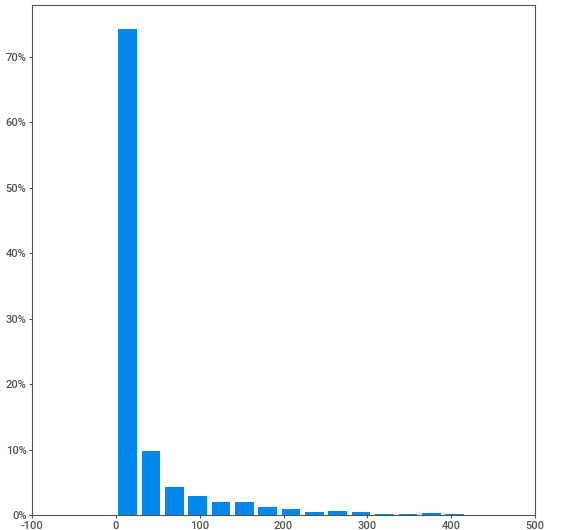
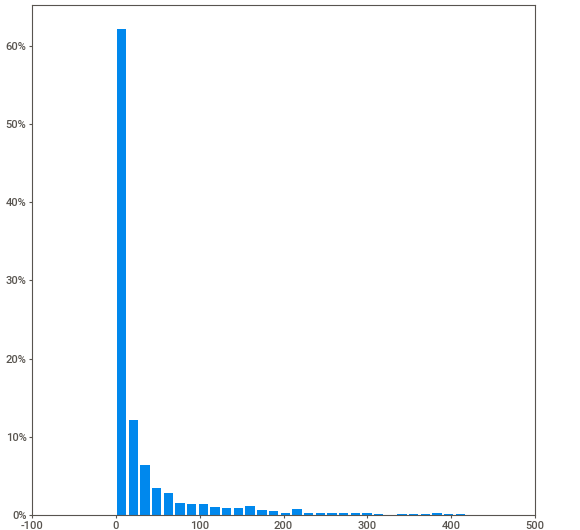
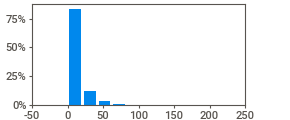
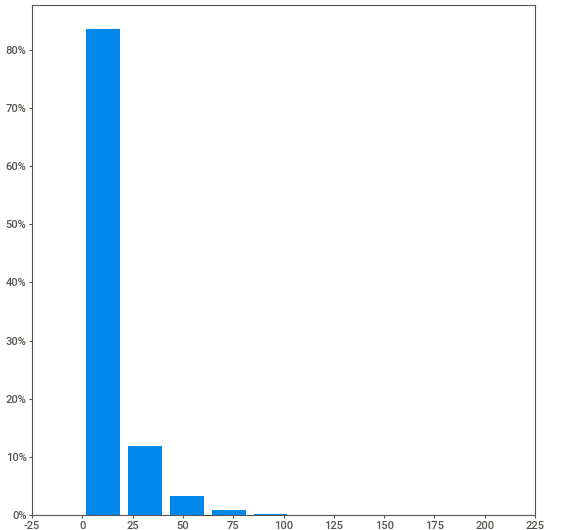
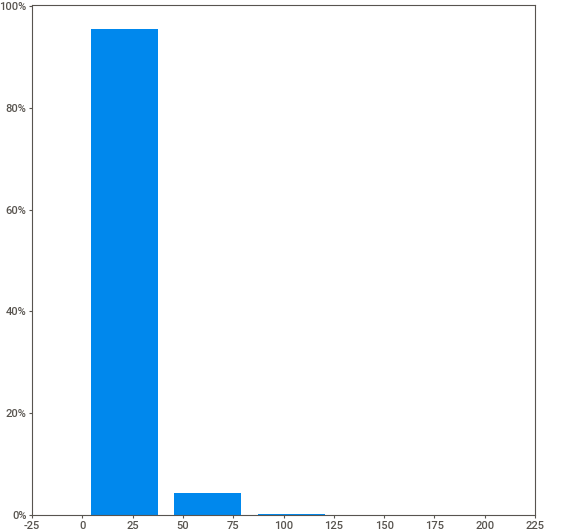
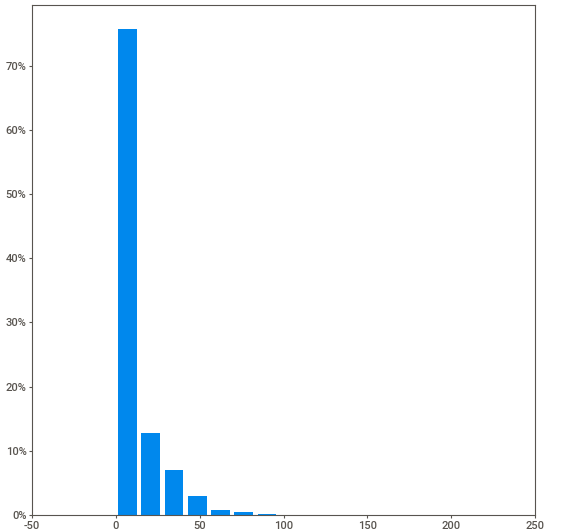
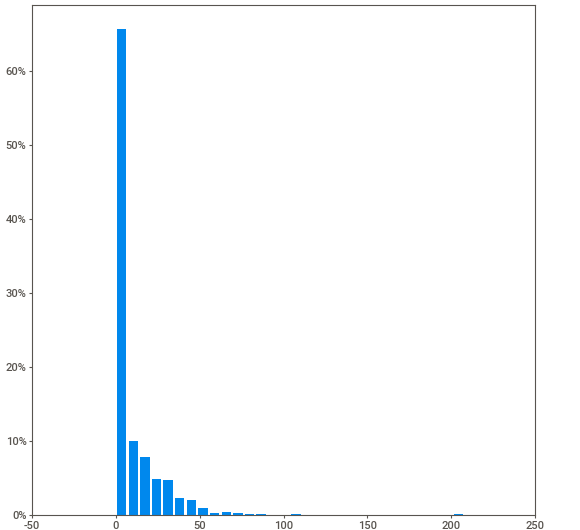
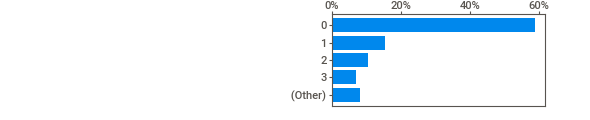
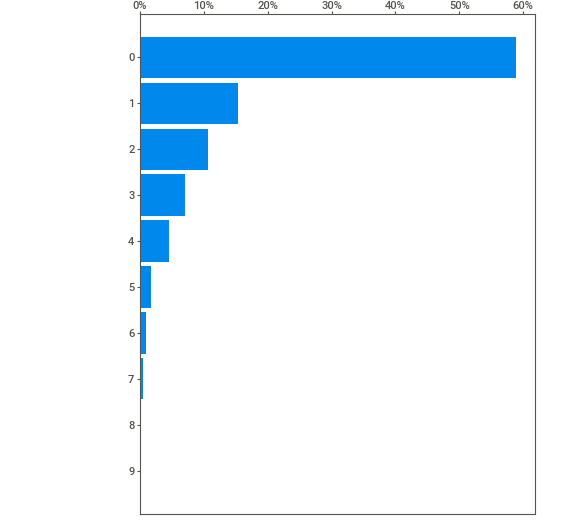
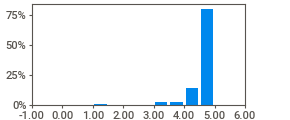
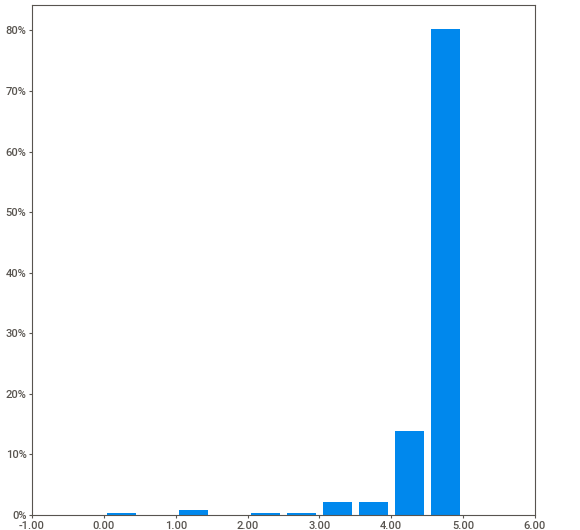
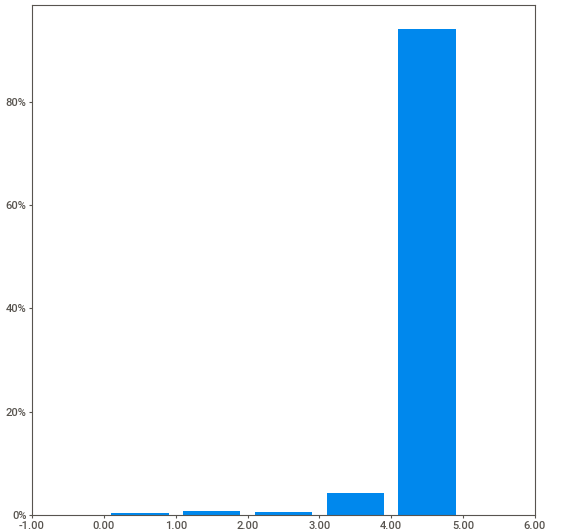
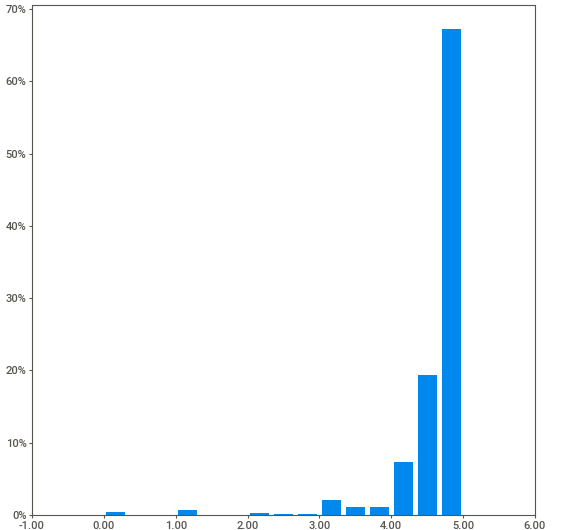
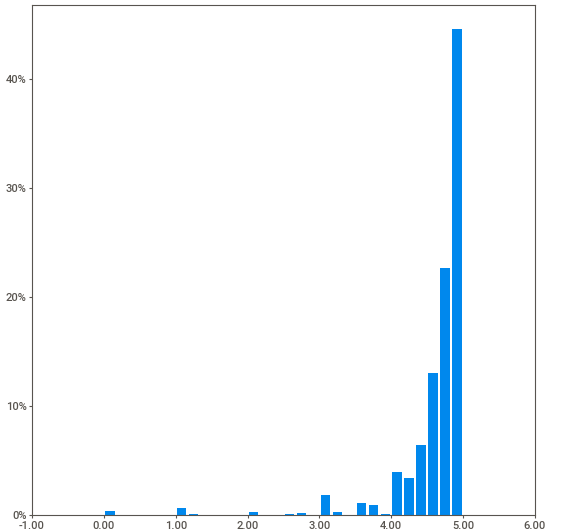
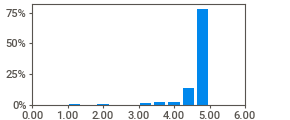
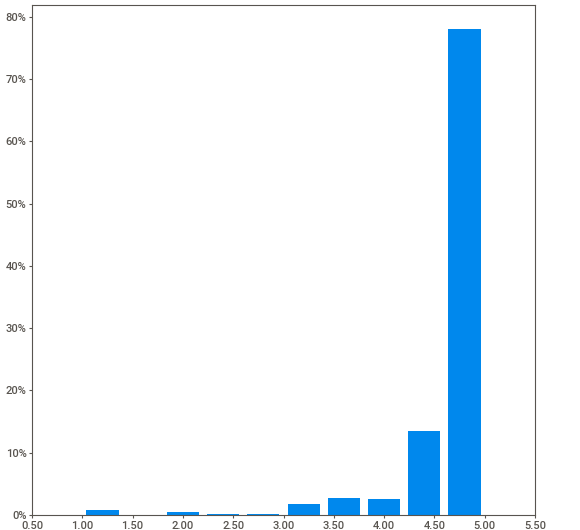
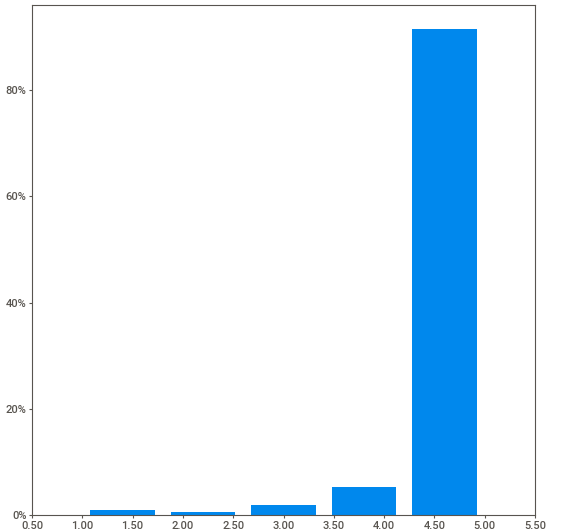
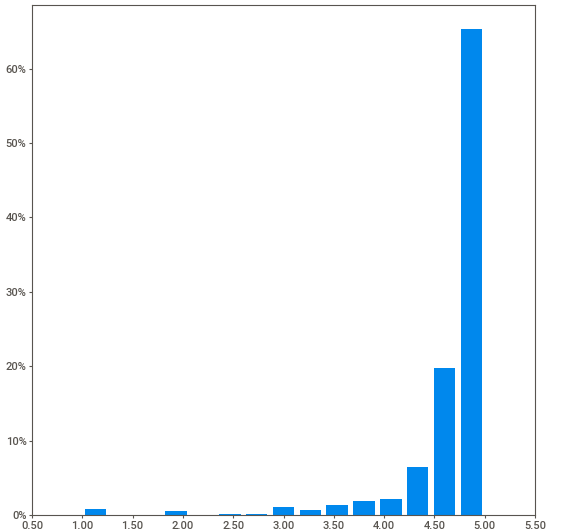
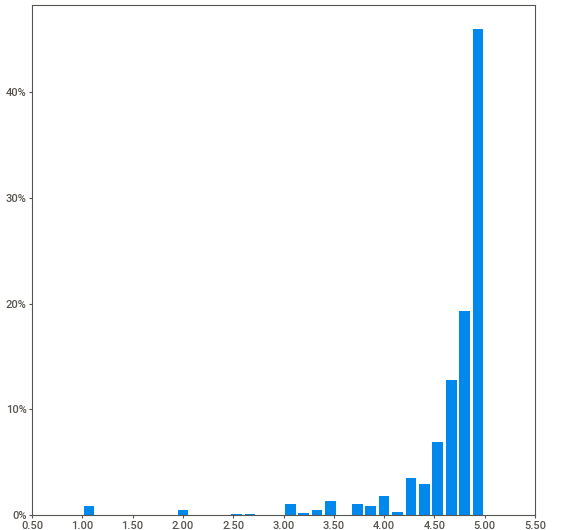
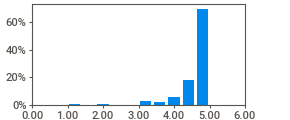
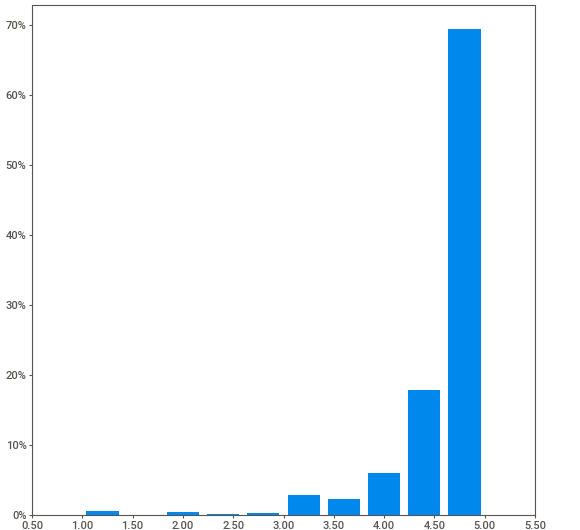
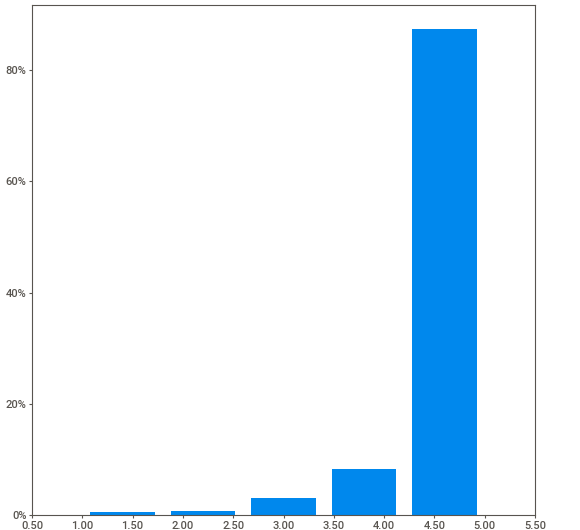
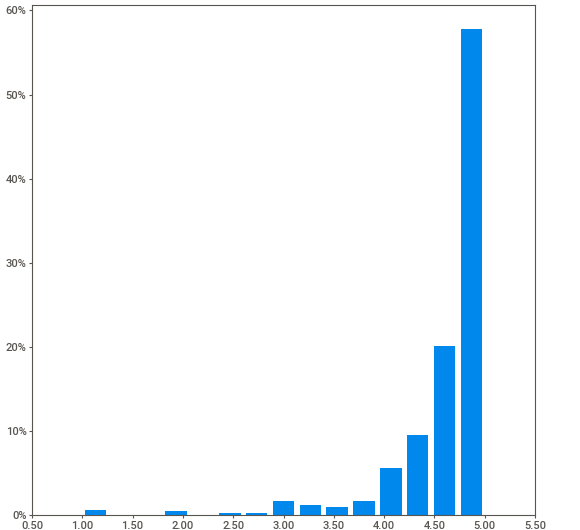
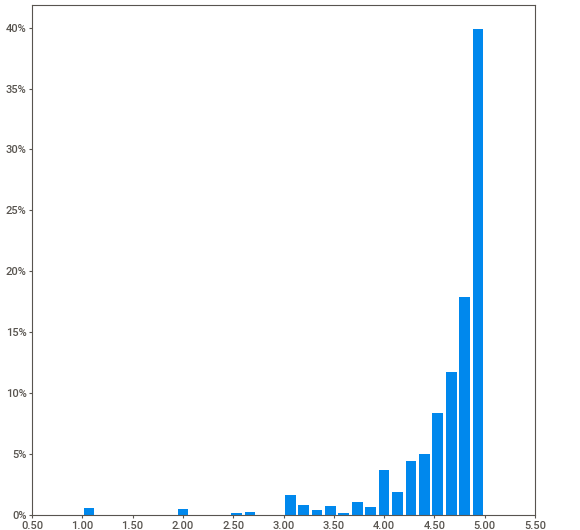
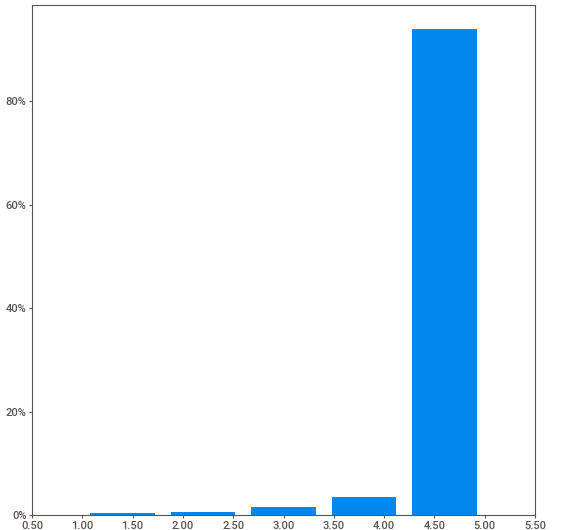
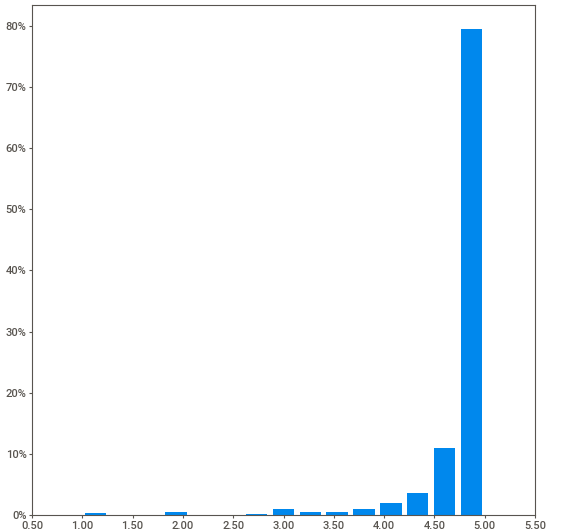
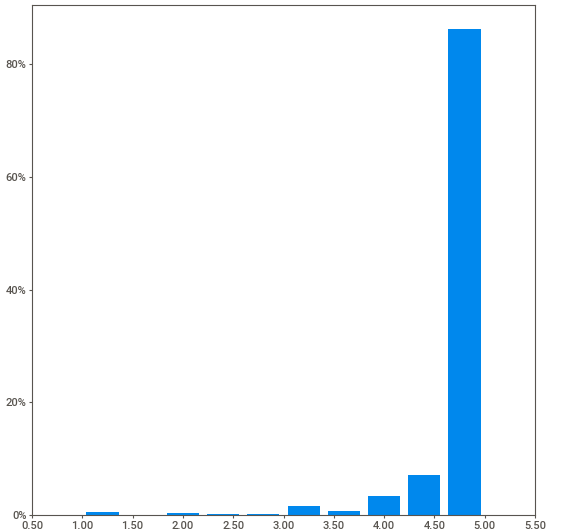
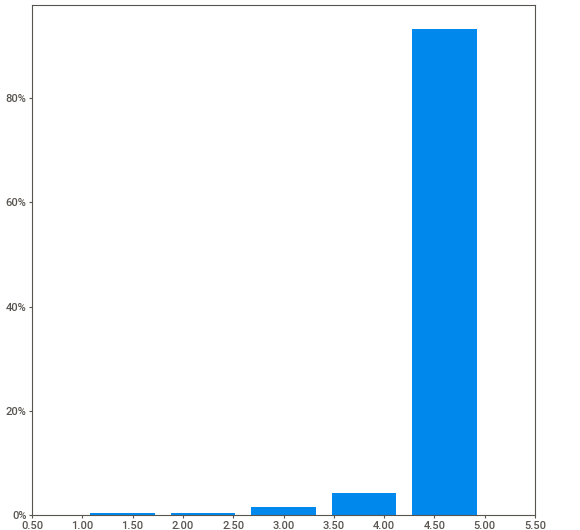
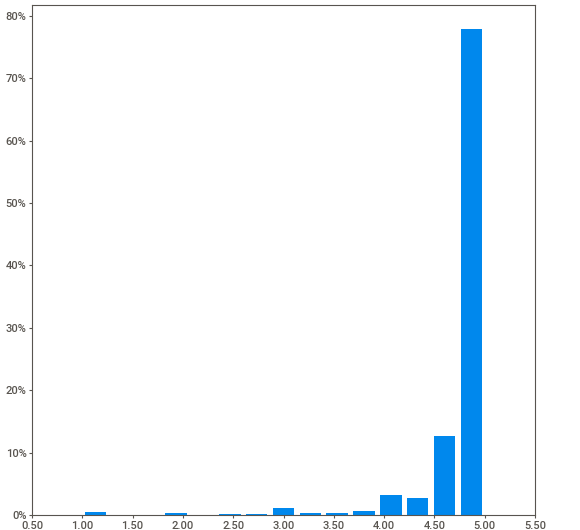
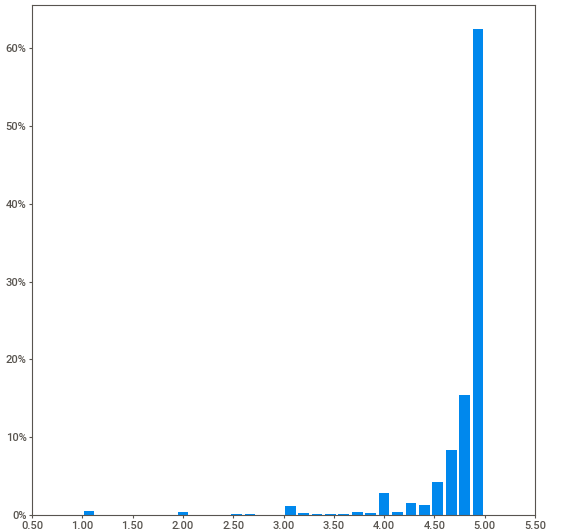
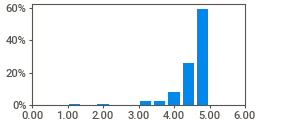
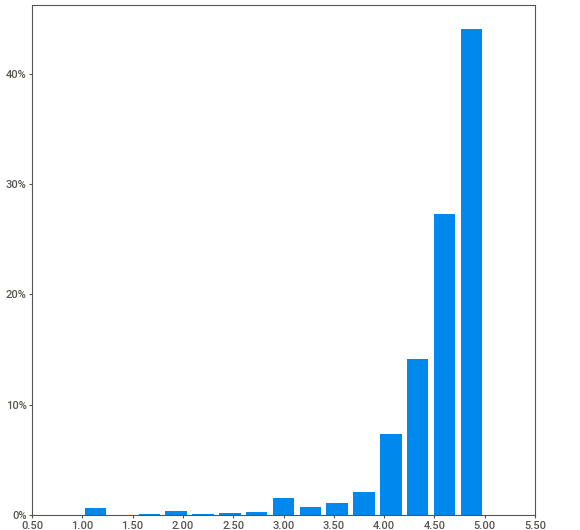
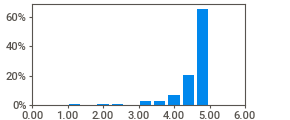
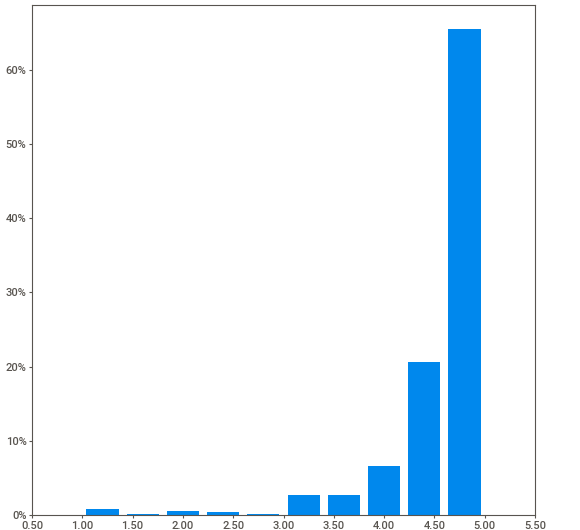
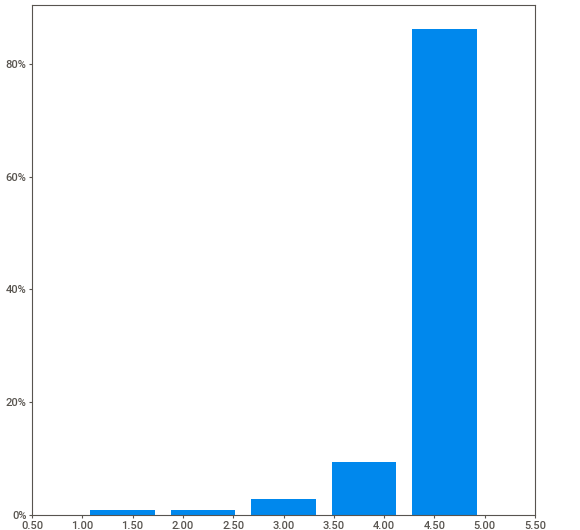
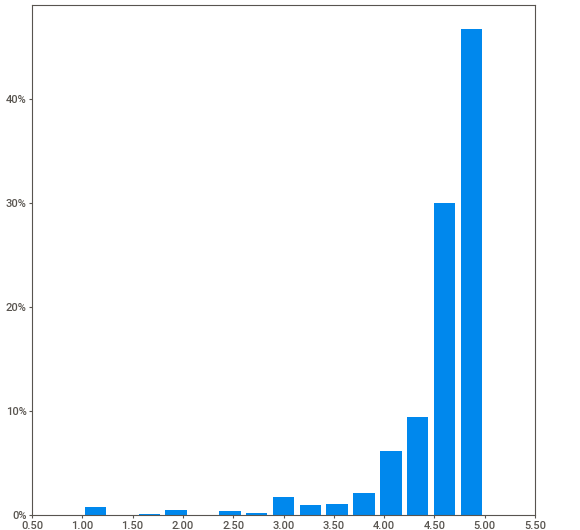
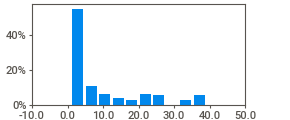
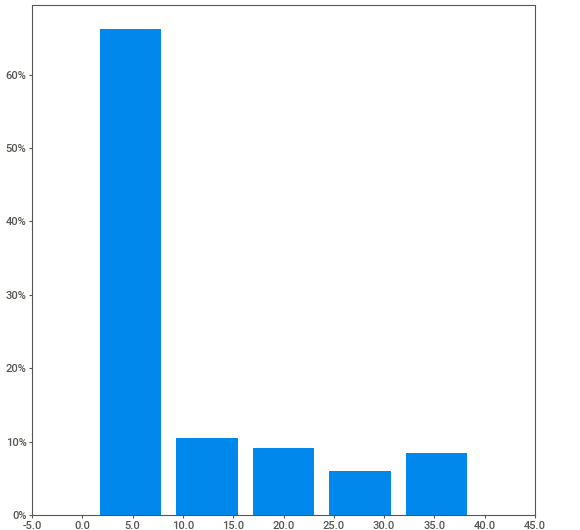
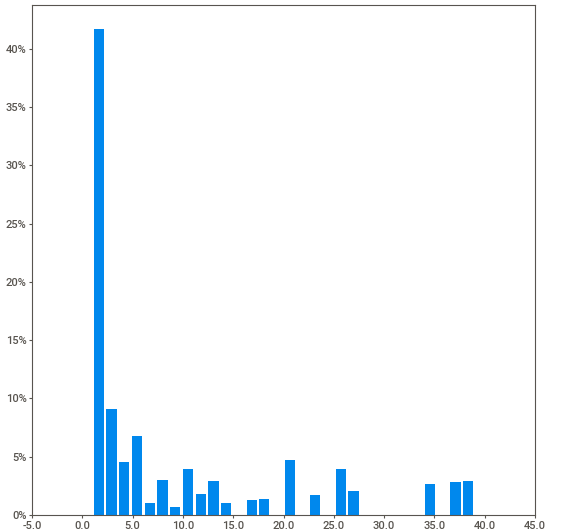
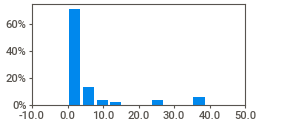
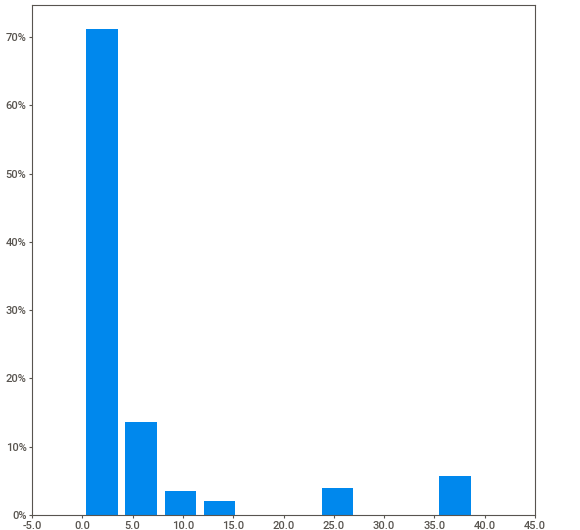
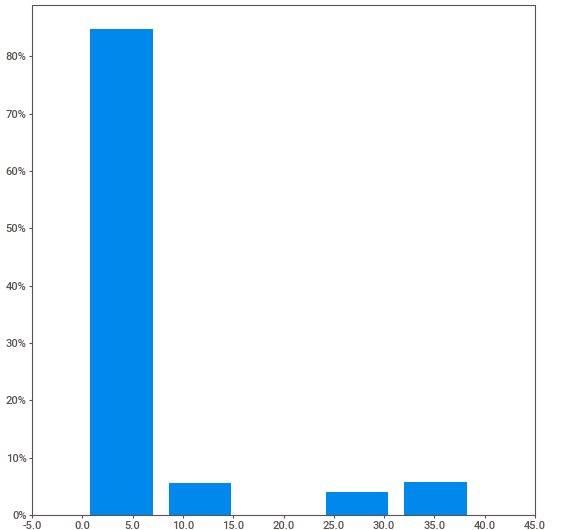
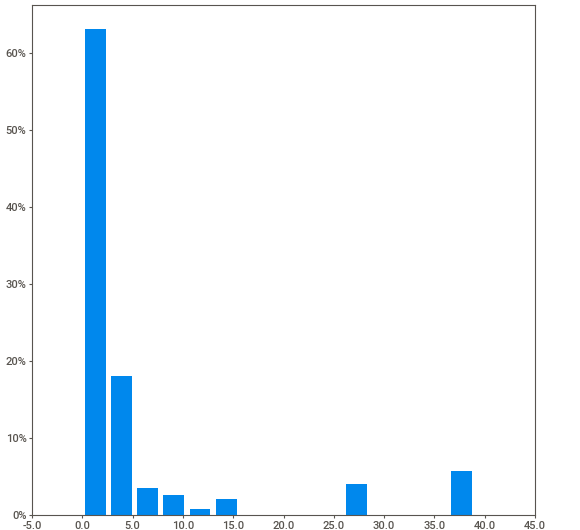
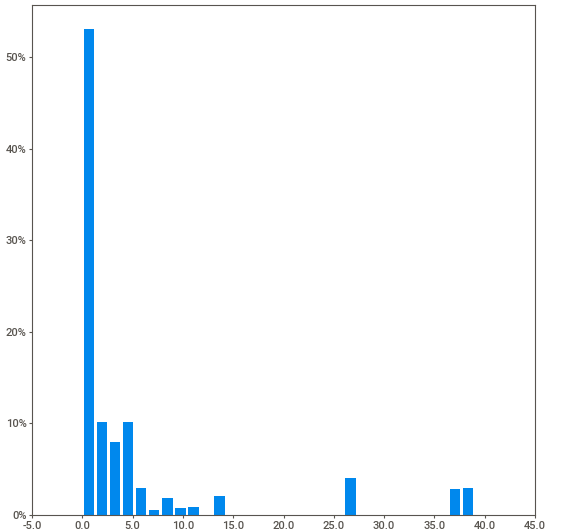
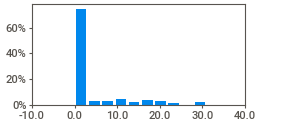
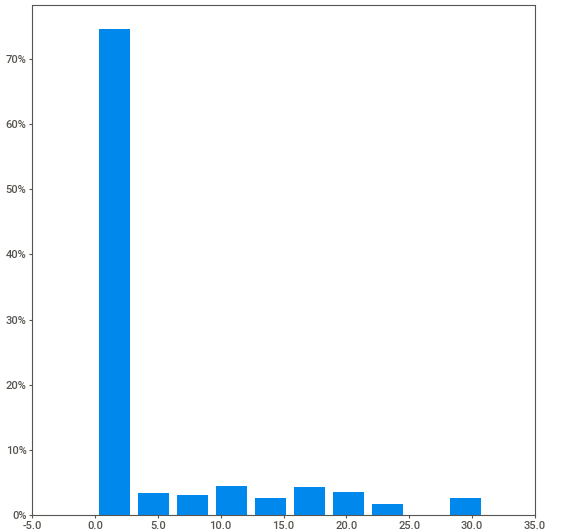
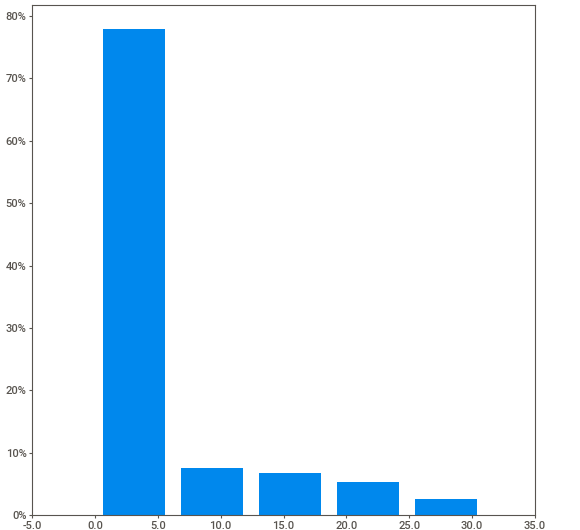
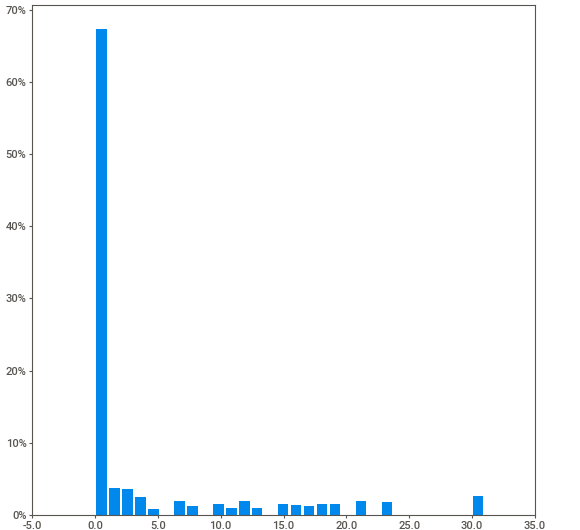
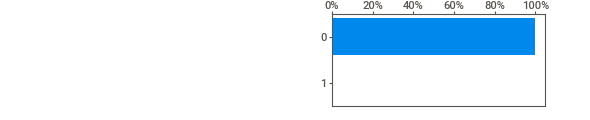
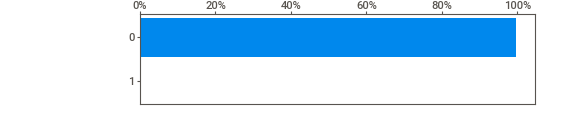
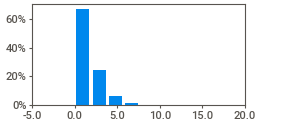
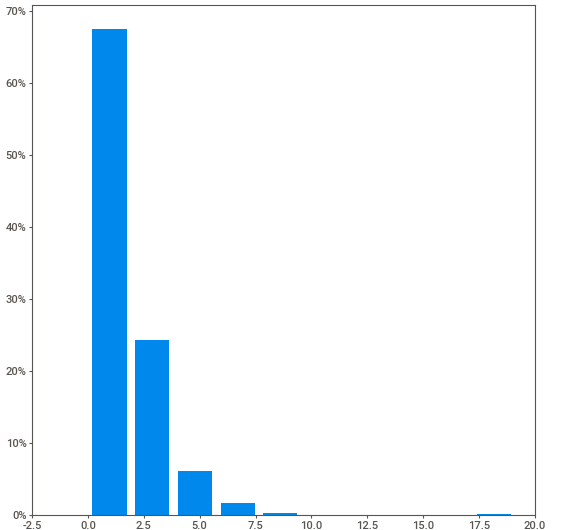
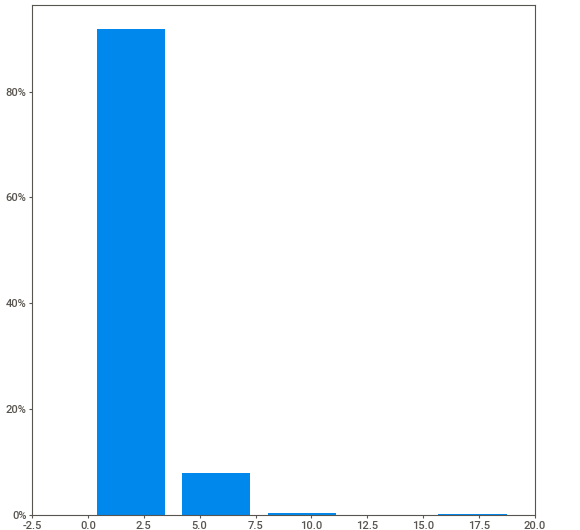
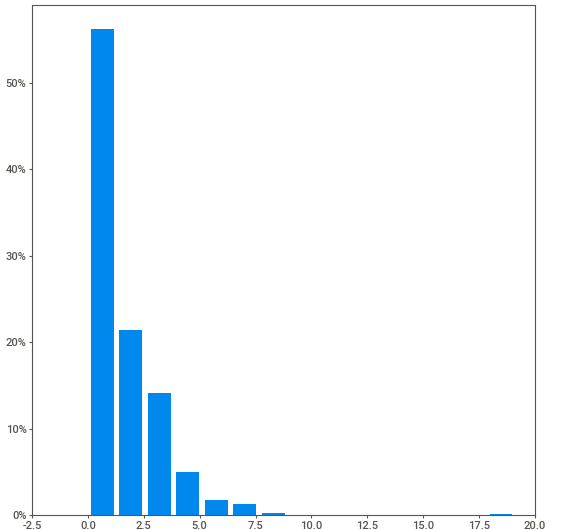
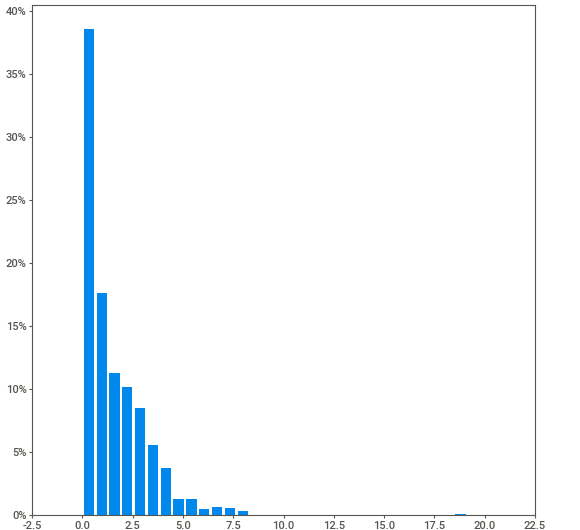
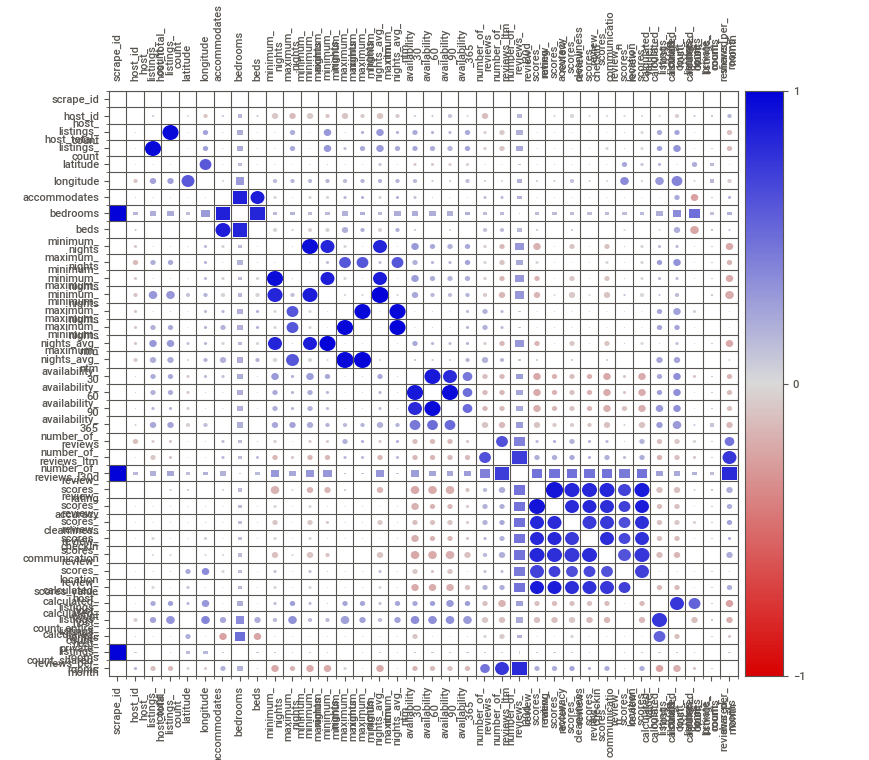
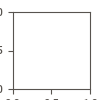

In [ ]:
import sweetviz as sv
sv.config_parser.read("Override.ini")
numeric_features = df.select_dtypes(include='number').columns.tolist()
my_report_numeric_features_report = sv.analyze(df[numeric_features])
my_report_numeric_features_report.show_html(filepath='Numeric_report.html', layout='vertical', scale=None)
my_report_numeric_features_report.show_notebook()

6.2. Categorical variables.

                                             |          | [  0%]   00:00 -> (? left)

Report Numeric_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



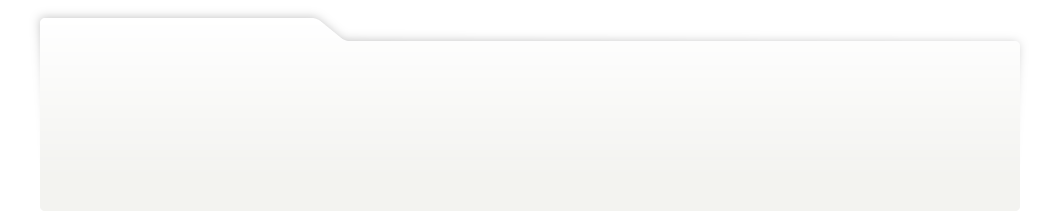
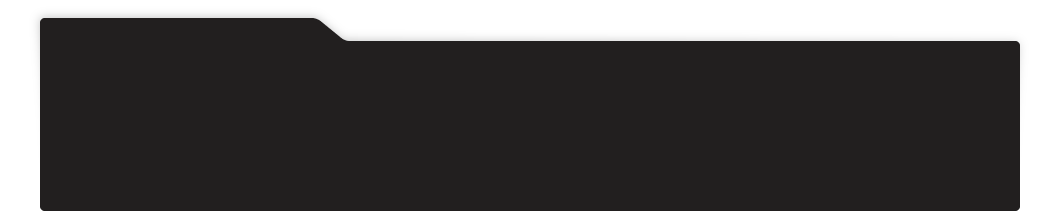
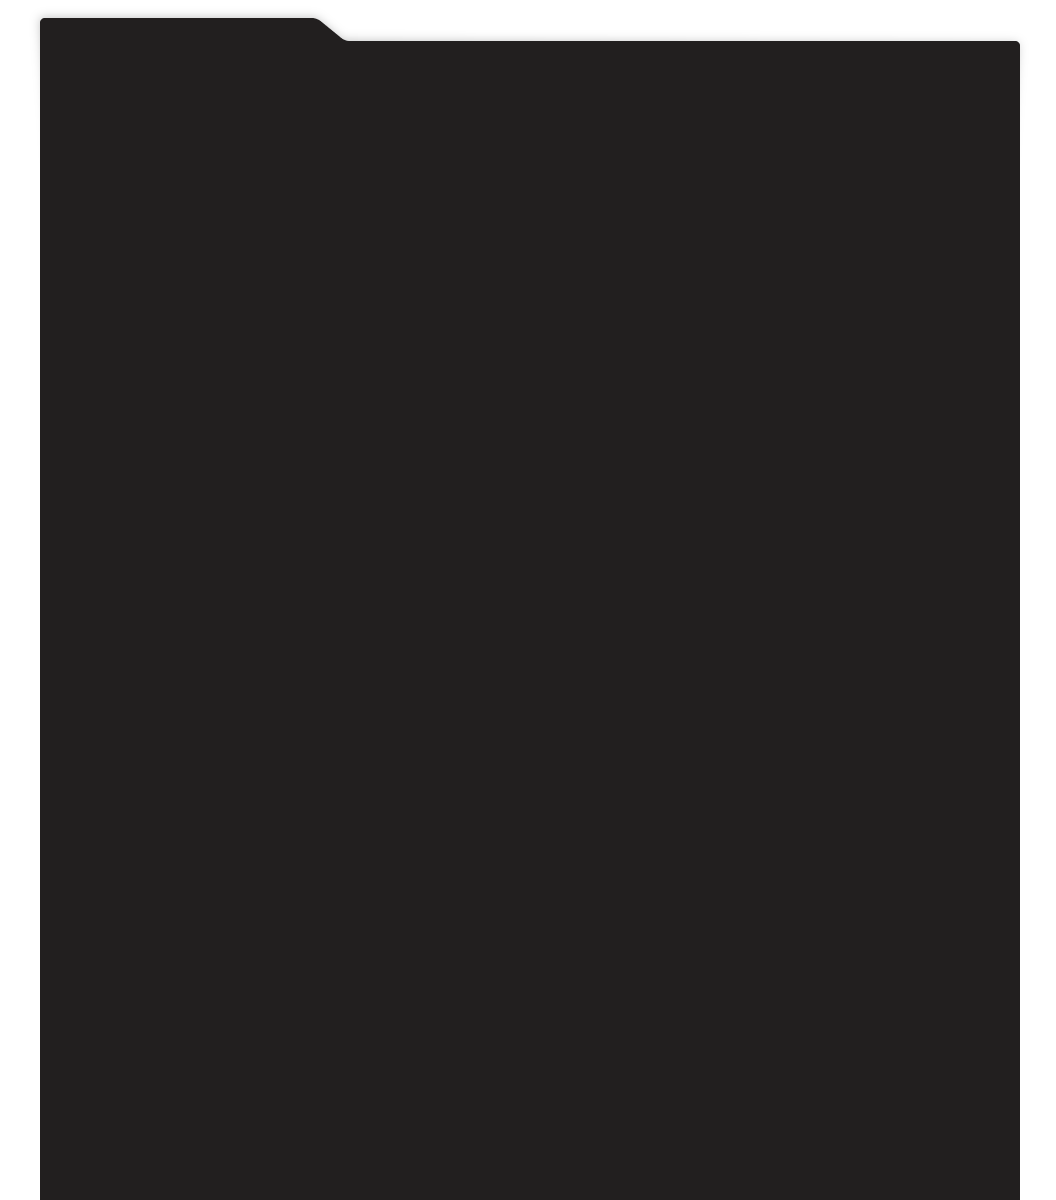
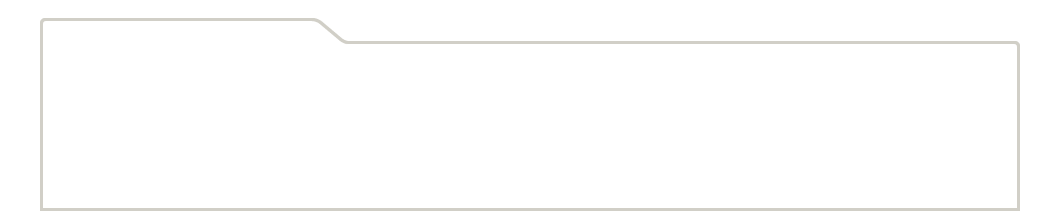
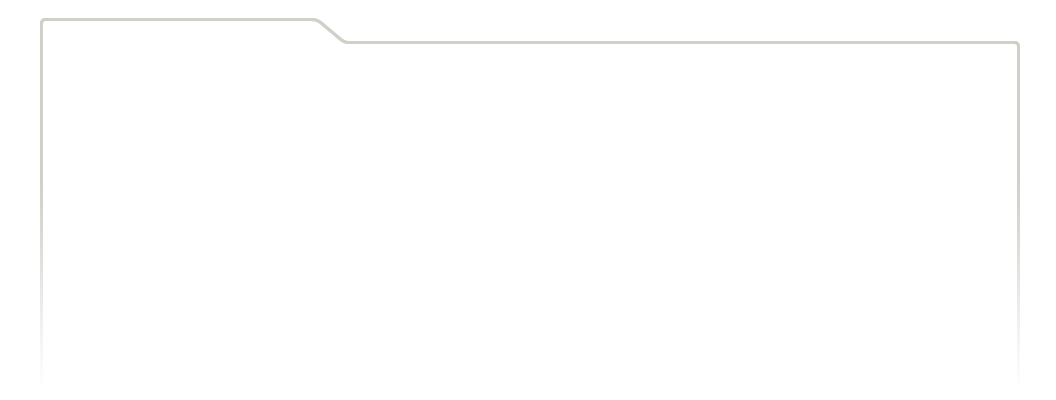
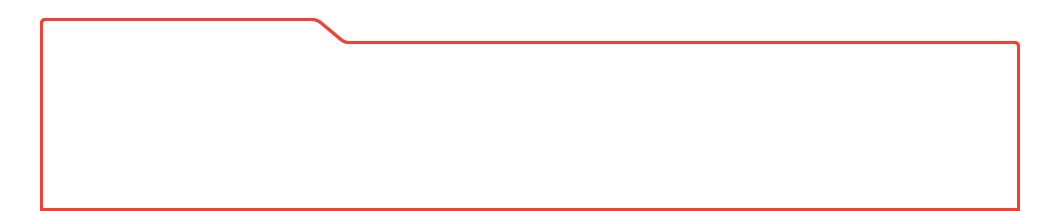
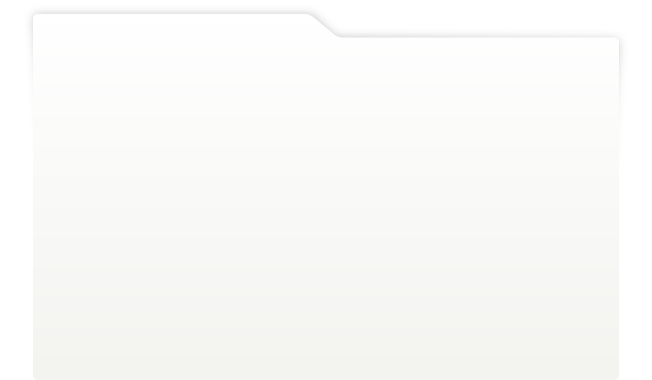
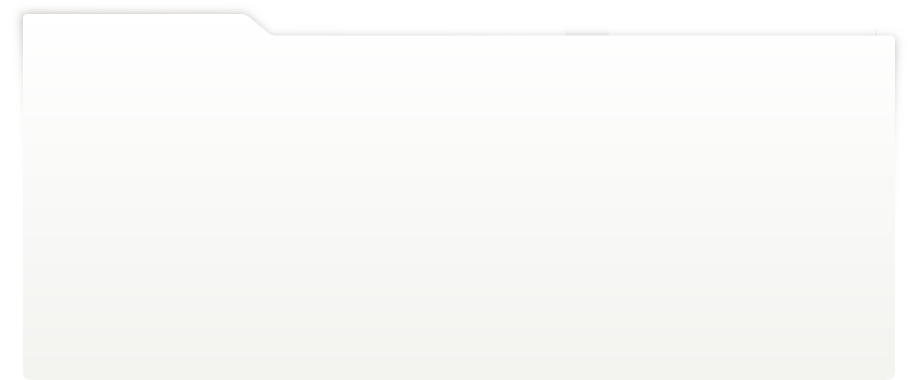
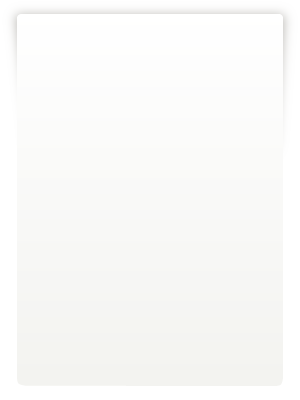
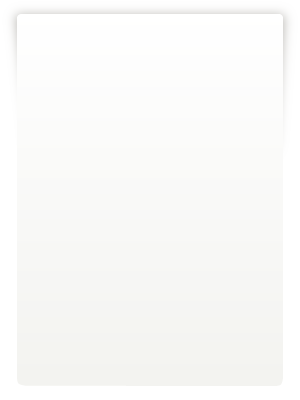
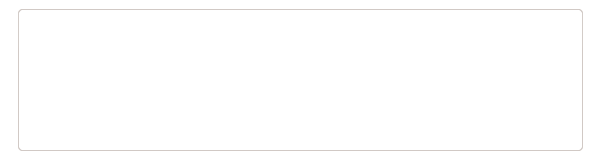
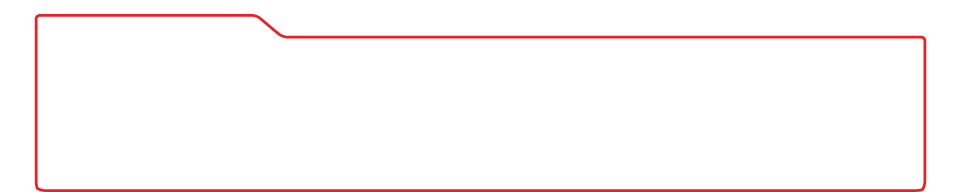
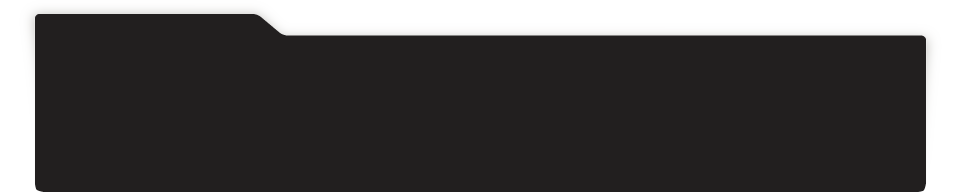
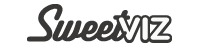
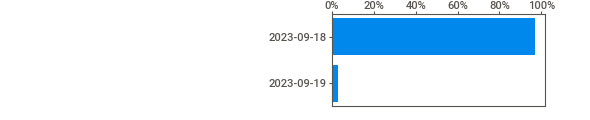
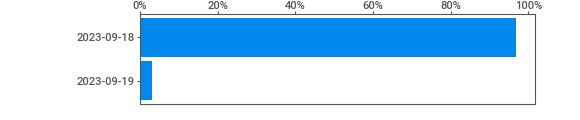
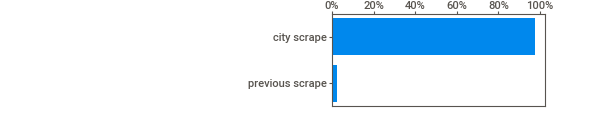
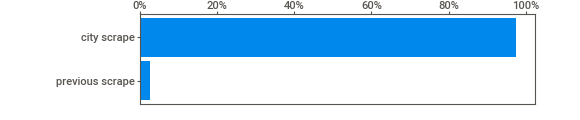
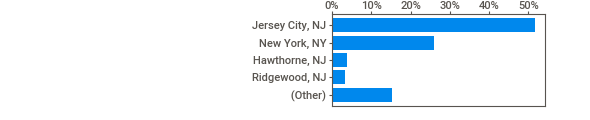
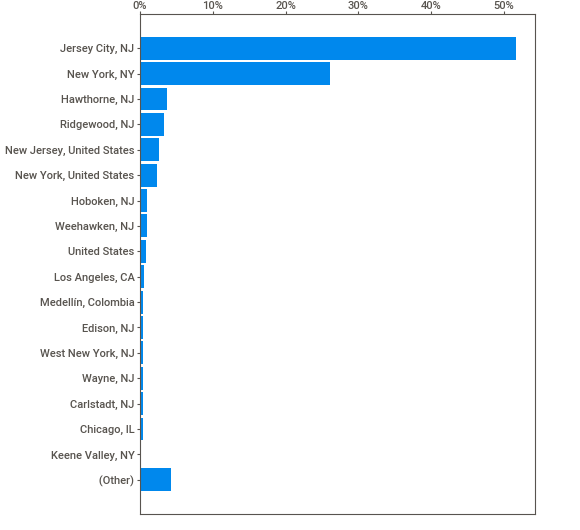
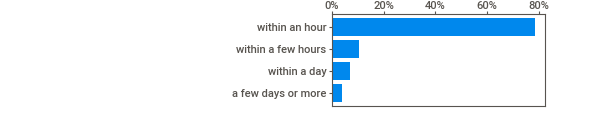
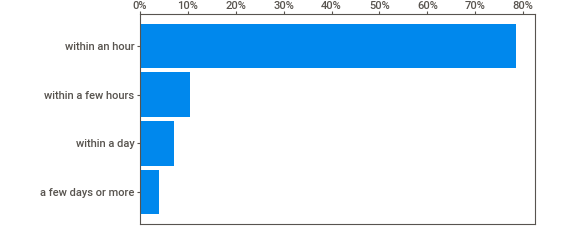
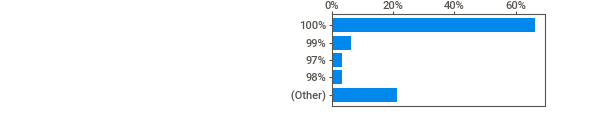
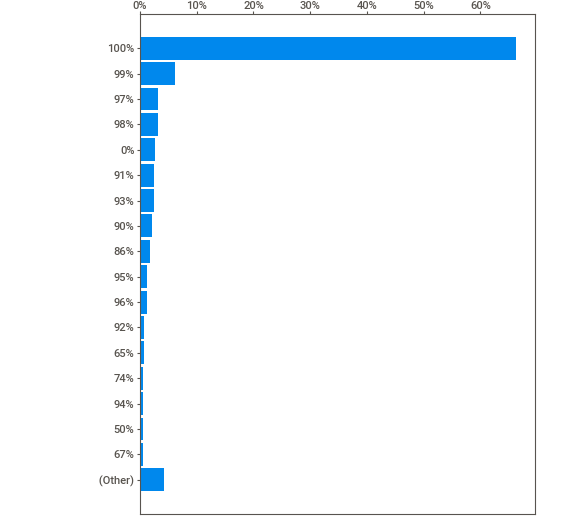
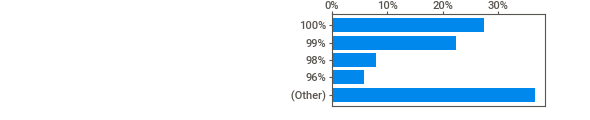
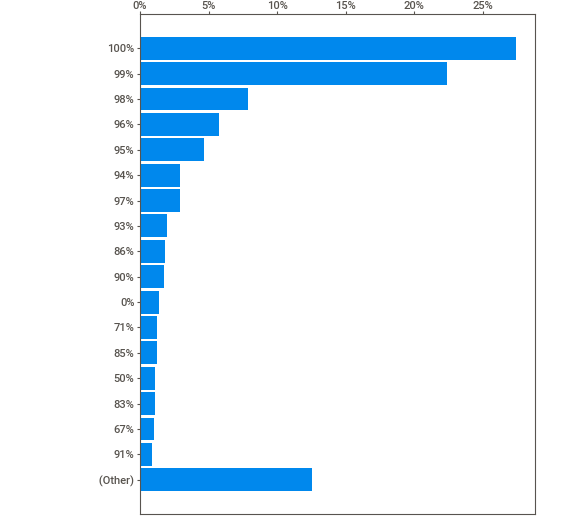
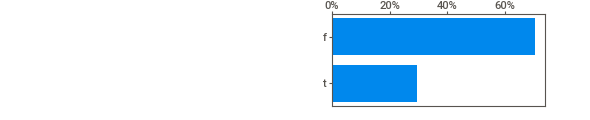
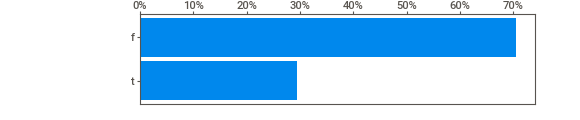
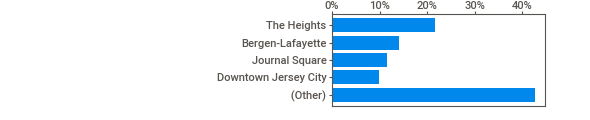
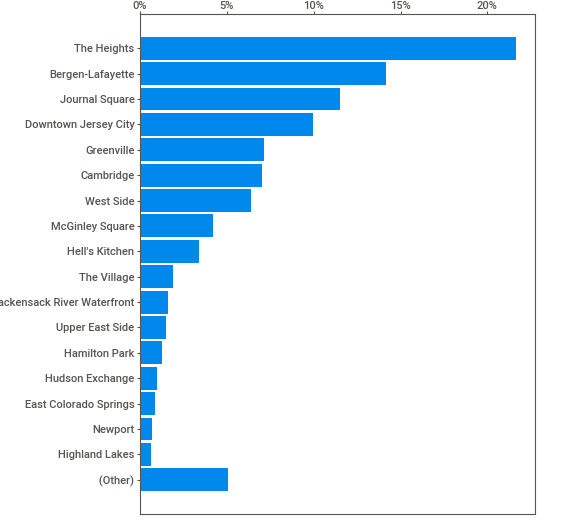
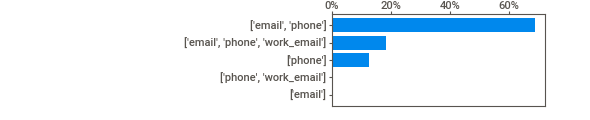
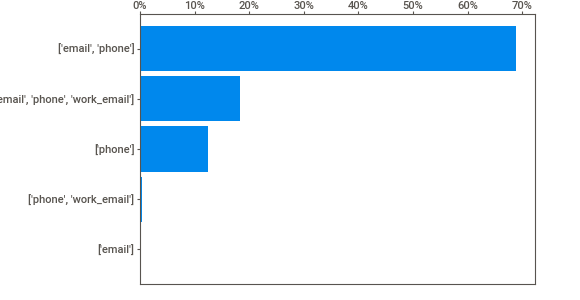
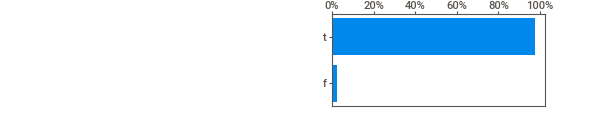
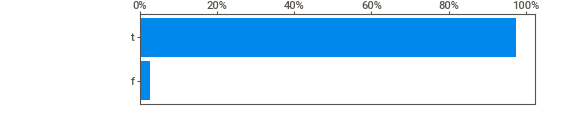
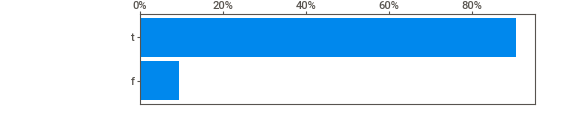
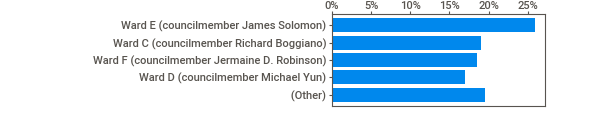
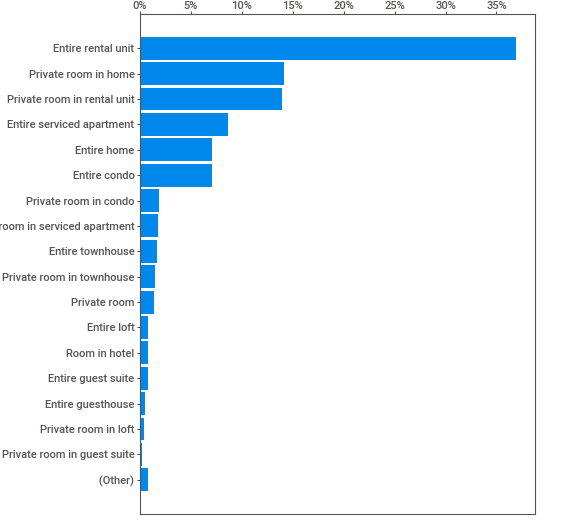
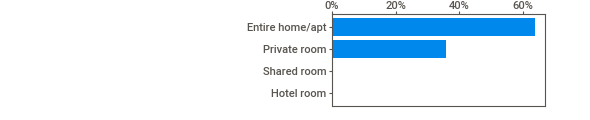
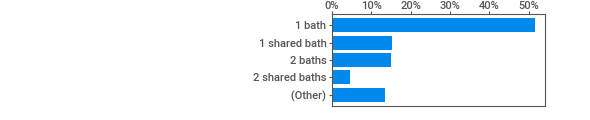
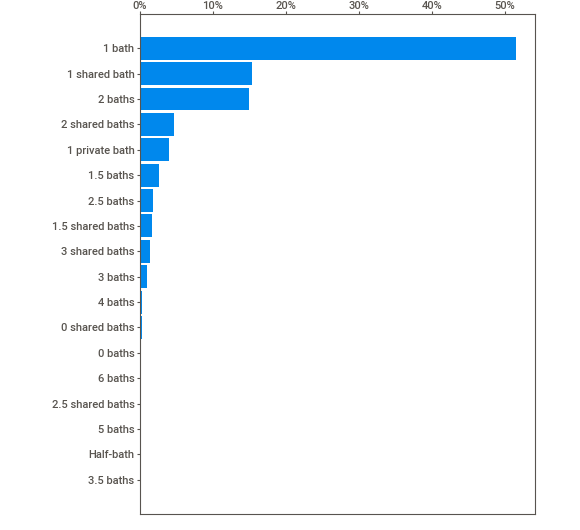
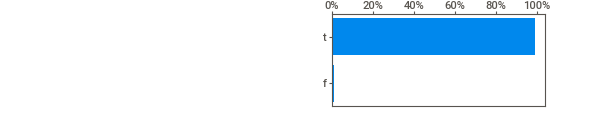
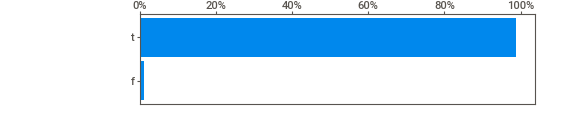
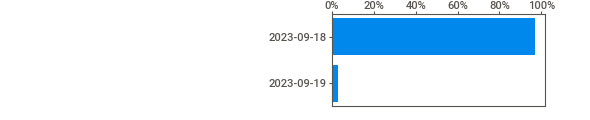
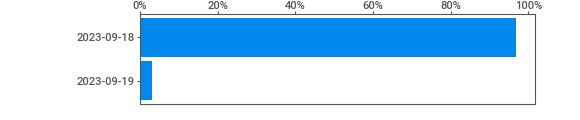
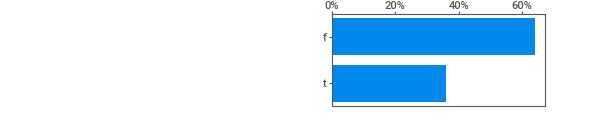
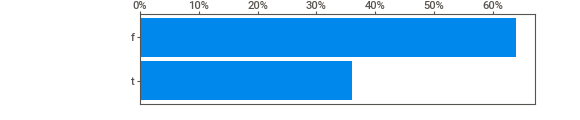
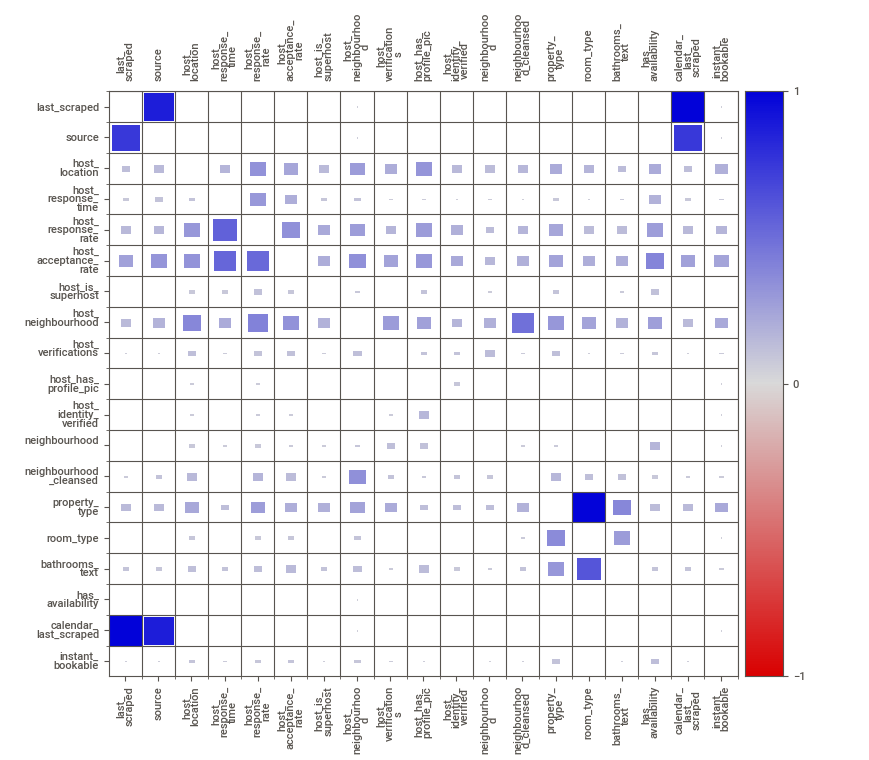
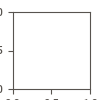

In [ ]:
categorical_features = df.select_dtypes(include='object').columns.tolist()
my_report_categorical_features_report = sv.analyze(df[categorical_features])
my_report_categorical_features_report.show_html(filepath='Numeric_report.html', layout='vertical', scale=None)
my_report_categorical_features_report.show_notebook()

#7. Data cleaning.

At this stage, I am removing the columns that have missing data exceeding 30%.

In [ ]:
df.drop(columns=['calendar_updated', 'neighbourhood_group_cleansed', 'bathrooms', 'license', 'host_about', 'neighbourhood', 'neighborhood_overview', 'bedrooms'],
                 inplace=True)

In [ ]:
# Displaying information about the number of unique values in each column.
pd.set_option('display.max_rows', None)
df.nunique()

listing_url                                     1324
scrape_id                                          1
last_scraped                                       2
source                                             2
name                                             820
description                                     1127
picture_url                                     1276
host_id                                          579
host_url                                         579
host_name                                        508
host_since                                       534
host_location                                     56
host_response_time                                 4
host_response_rate                                43
host_acceptance_rate                              61
host_is_superhost                                  2
host_thumbnail_url                               560
host_picture_url                                 560
host_neighbourhood                                43
host_listings_count                               39
host_total_listings_count                         50
host_verifications                                 5
host_has_profile_pic                               2
host_identity_verified                             2
neighbourhood_cleansed                             6
latitude                                        1123
longitude                                       1144
property_type                                     26
room_type                                          4
accommodates                                      16
bathrooms_text                                    18
beds                                              11
amenities                                       1186
price                                            322
minimum_nights                                    33
maximum_nights                                    67
minimum_minimum_nights                            35
maximum_minimum_nights                            34
minimum_maximum_nights                            51
maximum_maximum_nights                            50
minimum_nights_avg_ntm                           104
maximum_nights_avg_ntm                            56
has_availability                                   2
availability_30                                   31
availability_60                                   61
availability_90                                   91
availability_365                                 335
calendar_last_scraped                              2
number_of_reviews                                188
number_of_reviews_ltm                             73
number_of_reviews_l30d                            10
first_review                                     763
last_review                                      320
review_scores_rating                             103
review_scores_accuracy                            91
review_scores_cleanliness                        111
review_scores_checkin                             75
review_scores_communication                       83
review_scores_location                           120
review_scores_value                              106
instant_bookable                                   2
calculated_host_listings_count                    24
calculated_host_listings_count_entire_homes       18
calculated_host_listings_count_private_rooms      20
calculated_host_listings_count_shared_rooms        2
reviews_per_month                                378
dtype: int64

I am converting all dates to datetime objects.

In [ ]:
for col in ['last_scraped', 'calendar_last_scraped', 'first_review', 'last_review']:
  df[col] = pd.to_datetime(df[col])

For the variables: host_location, review_scores_location, review_scores_communication, review_scores_checkin, review_scores_cleanliness, review_scores_accuracy, review_scores_value, first_review, last_review, review_scores_rating, reviews_per_month, and host_neighbourhood, we need to consider their significance and fill in the missing values if possible.

The distributions of review_scores_location, review_scores_communication, review_scores_checkin, review_scores_cleanliness, review_scores_accuracy, review_scores_value, first_review, last_review, review_scores_rating, and reviews_per_month are asymmetrical; therefore, I will fill in the missing data with the median value.

In [ ]:
for col in ['review_scores_location', 'review_scores_communication', 'review_scores_checkin', 'review_scores_cleanliness', 'review_scores_accuracy', 'review_scores_value', 'review_scores_value', 'review_scores_rating', 'reviews_per_month']:
  df[col] = df[col].fillna(df[col].median())

I will fill in the missing values for the variables host_location and host_neighbourhood using the mode.

In [ ]:
df['host_location'] = df['host_location'].fillna(df['host_location'].mode()[0])

In [ ]:
df['host_neighbourhood'] = df['host_neighbourhood'].fillna(df['host_neighbourhood'].mode()[0])

I will fill in the missing values in the columns first_review and last_review using the neighboring values.

In [ ]:
df['first_review'] = df['first_review'].fillna(method='ffill')
df['last_review'] = df['last_review'].fillna(method='ffill')

<ipython-input-191-e3f26c5bcf4f>:1: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

<ipython-input-191-e3f26c5bcf4f>:2: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [ ]:
df['host_acceptance_rate'].unique()

array(['60%', '99%', '100%', '0%', '89%', '94%', '78%', nan, '96%', '82%',
       '98%', '57%', '87%', '50%', '83%', '93%', '90%', '85%', '95%',
       '76%', '79%', '97%', '71%', '86%', '67%', '75%', '88%', '73%',
       '80%', '64%', '72%', '33%', '43%', '37%', '91%', '20%', '92%',
       '77%', '15%', '25%', '26%', '69%', '48%', '31%', '41%', '65%',
       '7%', '81%', '56%', '14%', '70%', '5%', '84%', '32%', '42%', '47%',
       '35%', '63%', '40%', '68%', '24%', '61%'], dtype=object)

In [ ]:
#I am removing the % sign and casting the values to a specific data type.
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '', regex=False).astype('float')/100

I will fill in the missing values in host_acceptance_rate with the median, even though there are not many missing values.

In [ ]:
df['host_acceptance_rate'] = df['host_acceptance_rate'].fillna(df['host_acceptance_rate'].median())

I will proceed similarly with the host_response_rate column, filling in the missing values with the median.

In [ ]:
#I am removing the % sign and casting the values to a specific data type.
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '', regex=False).astype('float')/100

In [ ]:
df['host_response_rate'] = df['host_response_rate'].fillna(df['host_response_rate'].median())

I will fill in the missing values in host_response_time with the mode, even though there are not many missing values.

In [ ]:
df['host_response_time'] = df['host_response_time'].fillna(df['host_response_time'].mode()[0])

For the beds column, I will fill in the missing values with the median.

In [ ]:
df['beds'] = df['beds'].fillna(df['beds'].median())

I am removing the scrape_id column because it contains only one value and does not contribute to the analysis.

In [ ]:
df.drop(columns=['scrape_id'], inplace=True)

Variables: host_is_superhost, host_has_profile_pic, host_identity_verified, has_availability, instant_bookable are changed to boolean type.

In [ ]:
for col in ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'has_availability', 'instant_bookable']:
  df[col] = df[col].map({'t': True, 'f': False}).fillna(False)

I am removing the variable host_id because it is not useful for further data analysis.

In [ ]:
df.drop(columns=['host_id'], inplace=True)

I am removing the variable listing because it contains domain addresses (different for each row), which do not contribute to further analysis.

In [ ]:
df['listing_url'].unique()

array(['https://www.airbnb.com/rooms/40669',
       'https://www.airbnb.com/rooms/215768',
       'https://www.airbnb.com/rooms/254245', ...,
       'https://www.airbnb.com/rooms/981716811722485393',
       'https://www.airbnb.com/rooms/981829528456499146',
       'https://www.airbnb.com/rooms/982161671070648813'], dtype=object)

In [ ]:
df['listing_url'].nunique()

1324

In [ ]:
df.drop(columns=['listing_url'], inplace=True)

In [ ]:
df['last_scraped'].unique()

<DatetimeArray>
['2023-09-18 00:00:00', '2023-09-19 00:00:00']
Length: 2, dtype: datetime64[ns]

In [ ]:
df['calendar_last_scraped'].unique()

<DatetimeArray>
['2023-09-18 00:00:00', '2023-09-19 00:00:00']
Length: 2, dtype: datetime64[ns]

In [ ]:
#I am checking the similarity of the data in these two columns using the difflib library for each row and calculating the average of these checks.
import difflib

def similar(a, b):
    return difflib.SequenceMatcher(None, str(a), str(b)).ratio()

similarity_score = df.apply(lambda row: similar(row['last_scraped'], row['calendar_last_scraped']), axis=1)
average_similarity = similarity_score.mean()
average_similarity

1.0

These two columns contain identical data, so I can remove one of them.

In [ ]:
df.drop(columns=['calendar_last_scraped'], inplace=True)

In [ ]:
df['source'].unique()

array(['city scrape', 'previous scrape'], dtype=object)

In [ ]:
df['host_response_time'].unique()

array(['within a day', 'within an hour', 'a few days or more',
       'within a few hours'], dtype=object)

In [ ]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Hotel room', 'Shared room'],
      dtype=object)

In [ ]:
df['neighbourhood_cleansed'].unique()

array(['Ward C (councilmember Richard Boggiano)',
       'Ward F (councilmember Jermaine D. Robinson)',
       'Ward E (councilmember James Solomon)',
       'Ward B (councilmember Mira Prinz-Arey)',
       'Ward D (councilmember Michael Yun)',
       'Ward A (councilmember Denise Ridley)'], dtype=object)

I am encoding the following categorical variables: source, host_response_time, room_type, neighbourhood_cleansed.

In [ ]:
df[['source', 'host_response_time', 'room_type', 'neighbourhood_cleansed']] = \
  df[['source', 'host_response_time', 'room_type', 'neighbourhood_cleansed']].astype('category')

The column host_verifications contains data in the form of string arrays. I am converting it into a list of strings for each row.

In [ ]:
df['host_verifications'].head(10)

id
40669     ['email', 'phone']
215768    ['email', 'phone']
254245    ['email', 'phone']
269266    ['email', 'phone']
270245    ['email', 'phone']
271255    ['email', 'phone']
508581    ['email', 'phone']
675483    ['email', 'phone']
810860    ['email', 'phone']
818075    ['email', 'phone']
Name: host_verifications, dtype: object

In [ ]:
df['host_verifications'].unique()

array(["['email', 'phone']", "['email', 'phone', 'work_email']",
       "['phone']", "['phone', 'work_email']", "['email']"], dtype=object)

In [ ]:
#I am converting it from an array of strings to a list of strings.
df['host_verifications'] = df['host_verifications'].apply(eval)

In [ ]:
df['host_verifications'].head(10)

id
40669     [email, phone]
215768    [email, phone]
254245    [email, phone]
269266    [email, phone]
270245    [email, phone]
271255    [email, phone]
508581    [email, phone]
675483    [email, phone]
810860    [email, phone]
818075    [email, phone]
Name: host_verifications, dtype: object

I am doing the same with the amenities column, but the data is in JSON format, so I am using the appropriate library for this transformation.

In [ ]:
import json as js
df['amenities'] = df['amenities'].apply(js.loads)

In [ ]:
df['amenities'].head(5)

id
40669     [Single level home, Washer, Fire extinguisher,...
215768    [Coffee, Washer, Fire extinguisher, Host greet...
254245    [Coffee, Washer, Fire extinguisher, Host greet...
269266    [Self check-in, Pack ’n play/Travel crib, Fire...
270245    [Self check-in, Fire extinguisher, Hot water k...
Name: amenities, dtype: object

The bathrooms_text column contains information about bathrooms in both numerical and word form. It needs to be transformed into a numerical format to represent the number of bathrooms.

In [ ]:
df['bathrooms_text'].unique()

array(['1 shared bath', '1 bath', '1 private bath', '2 baths',
       '1.5 baths', '3 shared baths', '2.5 baths', '2 shared baths',
       '1.5 shared baths', '3 baths', '4 baths', '6 baths', '0 baths',
       '2.5 shared baths', '0 shared baths', '5 baths', 'Half-bath',
       '3.5 baths'], dtype=object)

In [ ]:
#I am converting to numerical variables, taking into account that the term 'half' appears in some cases.
df['bathrooms_text'].str.split().str[0]
df['bathrooms'] = np.where(df['bathrooms_text'].str.contains('half', case=False, na=False), 0.5, df['bathrooms_text'].str.split().str[0]).astype('float')
df['bathrooms'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 4. , 6. , 0. , 5. , 0.5, 3.5])

I am removing the characters: $ and . from the price column and casting it to the float type.

In [ ]:
df['price'].head(10)

id
40669     $128.00
215768    $139.00
254245    $139.00
269266    $136.00
270245     $56.00
271255     $71.00
508581    $142.00
675483    $100.00
810860    $100.00
818075    $105.00
Name: price, dtype: object

In [ ]:
df['price'] = df['price'].replace('[$,]', '', regex=True).astype(float)
df['price'].head(10)

id
40669     128.0
215768    139.0
254245    139.0
269266    136.0
270245     56.0
271255     71.0
508581    142.0
675483    100.0
810860    100.0
818075    105.0
Name: price, dtype: float64

I am removing the following columns because they will not be needed for further analysis: short host descriptions, property names, host photos, and property photos.

In [ ]:
df.drop(columns=['description', 'picture_url', 'host_url', 'host_thumbnail_url', 'host_picture_url'], inplace=True)

I am now looking for outliers in the selected variables and removing them. However, first, I am performing standardization of the individual variables.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['price_s'] = scaler.fit_transform(df[['price']])

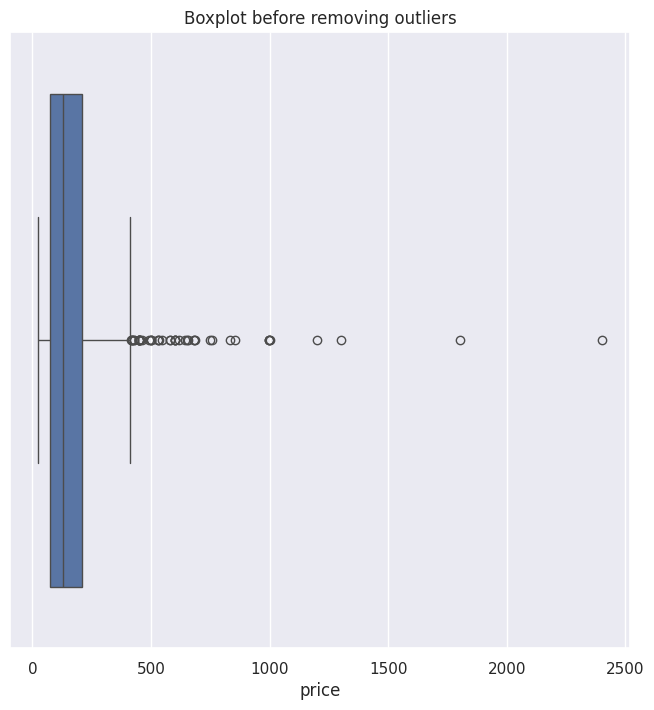

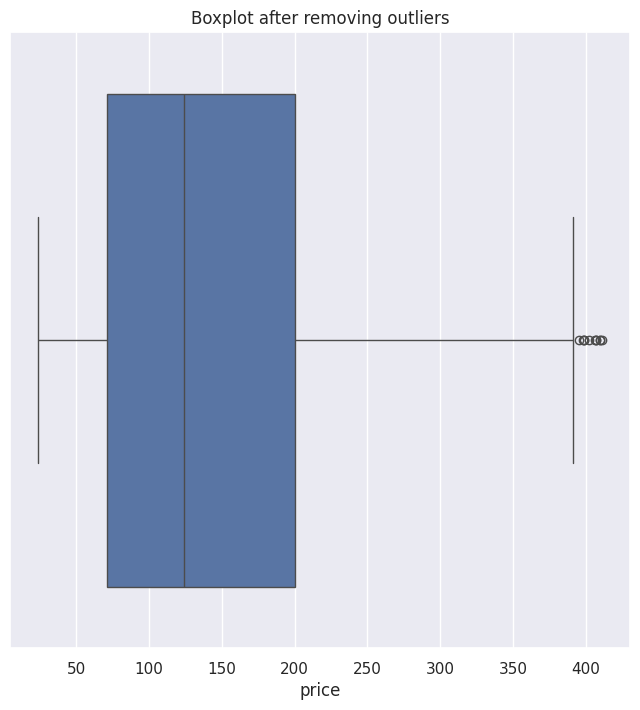

In [ ]:
plt.figure(figsize=(8, 8))
sns.boxplot(x='price', data=df)
plt.title('Boxplot before removing outliers')
plt.show()

# Identification of outliers based on the IQR (Interquartile Range).
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Selecting only those points that are not outliers.
df_no_outliers_price = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Box plot after removing outliers.
plt.figure(figsize=(8, 8))
sns.boxplot(x='price', data=df_no_outliers_price)
plt.title('Boxplot after removing outliers')
plt.show()

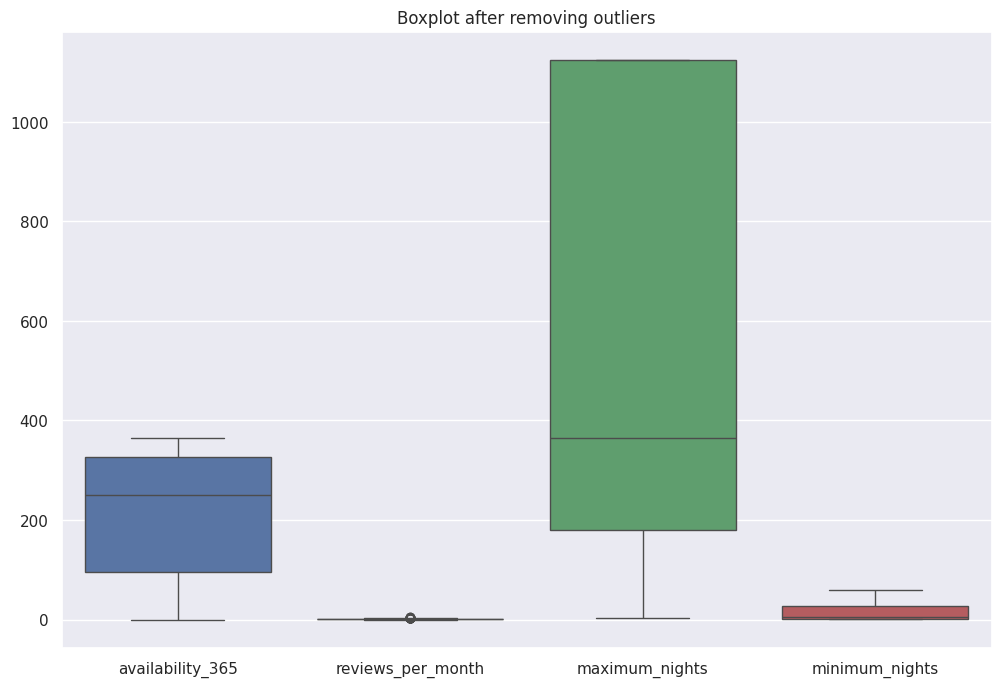

In [ ]:
# List of variables for analysis.
zmienne_do_analizy = ['availability_365', 'reviews_per_month', 'maximum_nights', 'minimum_nights']

# Displaying box plots before removing outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[zmienne_do_analizy])
plt.title('Boxplot before removing outliers')
plt.show()

# Identification of outliers based on IQR for each variable.
df_no_outliers = df.copy()  # We create a copy of the DataFrame to avoid modifying the original.
for zmienna in zmienne_do_analizy:
    Q1 = df[zmienna].quantile(0.25)
    Q3 = df[zmienna].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Selecting only those points that are not outliers.
    df_no_outliers = df_no_outliers[(df_no_outliers[zmienna] >= lower_bound) & (df_no_outliers[zmienna] <= upper_bound)]

# Displaying box plots after removing outliers.
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_no_outliers[zmienne_do_analizy])
plt.title('Boxplot after removing outliers')
plt.show()

#8. Investigating the relationships between individual variables.

---



Correlation matrix - numerical variables.

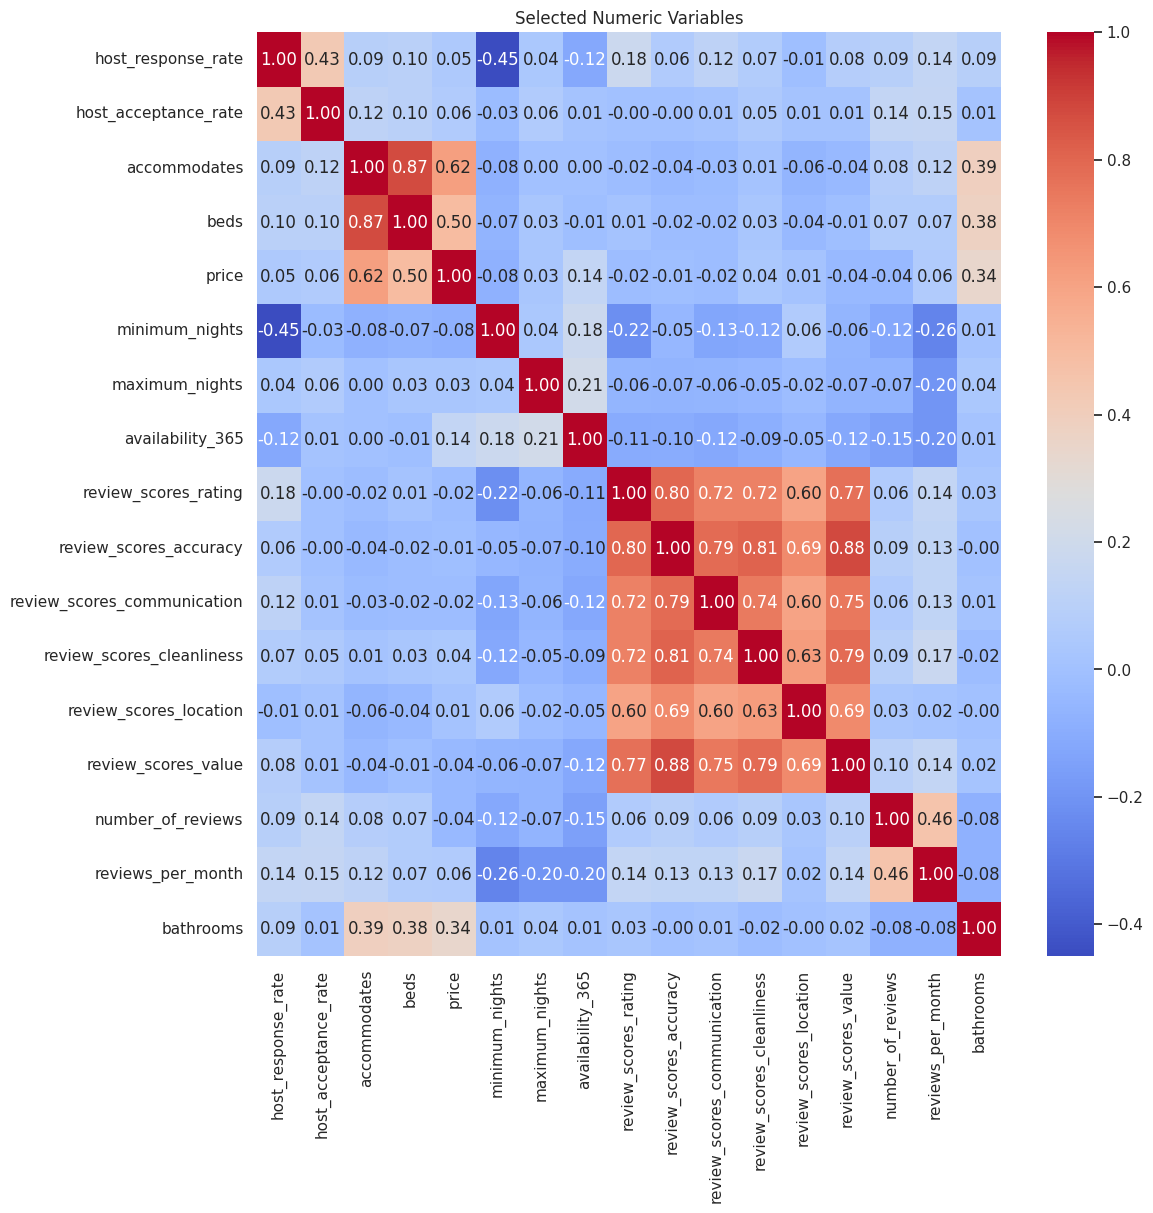

In [ ]:
numerical_col = ['host_response_rate', 'host_acceptance_rate', 'accommodates', 'beds', 'price', \
                 'minimum_nights', 'maximum_nights', 'availability_365', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_communication', \
                 'review_scores_cleanliness', 'review_scores_location', 'review_scores_value', 'number_of_reviews', 'reviews_per_month', 'bathrooms']
cor_matrix = df[numerical_col].corr(method='pearson').round(2)

plt.figure(figsize=(12, 12))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Selected Numeric Variables")
plt.show()

In [ ]:
numerical_col_1 = ['host_response_rate', 'host_acceptance_rate', 'accommodates', 'beds', 'price', \
                 'minimum_nights', 'maximum_nights', 'availability_365', 'review_scores_rating']
numerical_col_2 = ['review_scores_accuracy', 'review_scores_communication', \
                 'review_scores_cleanliness', 'review_scores_location', 'review_scores_value', 'number_of_reviews', 'reviews_per_month', 'bathrooms']

Pair plots for selected variables, divided into two parts for better visualization. It can be observed that for data with a high correlation coefficient, certain patterns can be identified.

In [ ]:
sns.pairplot(df[numerical_col_1])
plt.show()

In [ ]:
sns.pairplot(df[numerical_col_2])
plt.show()

Categorical variables - a list of Cramér's V coefficients for selected columns presented in a table.

In [ ]:
import scipy.stats as ss


# Function to calculate Cramér's V coefficient.
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

categorical_columns = ['host_name', 'host_since', 'host_location', 'host_neighbourhood', 'property_type', 'bathrooms_text', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',\
       'has_availability', 'instant_bookable', 'name']

#I am initializing a table in which all results for all pairs will be collected.
results_df = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

# Calculating and displaying the coefficient for selected columns.
for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 != col2:
            cramers_value = cramers_v(df[col1], df[col2])
            results_df.at[col1, col2] = cramers_value

results_df

host_name host_since host_location host_neighbourhood  \
host_name                    NaN   0.917116      0.705666           0.728723   
host_since              0.917116        NaN      0.741978           0.721083   
host_location           0.705666   0.741978           NaN           0.449011   
host_neighbourhood      0.728723   0.721083      0.449011                NaN   
property_type           0.521766   0.499218      0.232652           0.294483   
bathrooms_text          0.335948   0.397173           0.0           0.159933   
host_is_superhost       0.730391   0.750684      0.207991           0.301314   
host_has_profile_pic    0.726222    0.70226           0.0           0.235433   
host_identity_verified  0.745651   0.669694      0.141663           0.156305   
has_availability        0.694466   0.750892      0.185215             0.2782   
instant_bookable        0.639322   0.625335      0.289072           0.421451   
name                    0.271407   0.270822      0.192557           0.083171   

                       property_type bathrooms_text host_is_superhost  \
host_name                   0.521766       0.335948          0.730391   
host_since                  0.499218       0.397173          0.750684   
host_location               0.232652            0.0          0.207991   
host_neighbourhood          0.294483       0.159933          0.301314   
property_type                    NaN       0.244085           0.37733   
bathrooms_text              0.244085            NaN          0.149819   
host_is_superhost            0.37733       0.149819               NaN   
host_has_profile_pic        0.083158       0.108961          0.081699   
host_identity_verified      0.189104       0.107541          0.047052   
has_availability                 0.0            0.0          0.053975   
instant_bookable            0.456147       0.109299          0.096187   
name                        0.615849       0.621217          0.450702   

                       host_has_profile_pic host_identity_verified  \
host_name                          0.726222               0.745651   
host_since                          0.70226               0.669694   
host_location                           0.0               0.141663   
host_neighbourhood                 0.235433               0.156305   
property_type                      0.083158               0.189104   
bathrooms_text                     0.108961               0.107541   
host_is_superhost                  0.081699               0.047052   
host_has_profile_pic                    NaN               0.204593   
host_identity_verified             0.204593                    NaN   
has_availability                        0.0                    0.0   
instant_bookable                   0.037557               0.015301   
name                               0.212133               0.340444   

                       has_availability instant_bookable      name  
host_name                      0.694466         0.639322  0.271407  
host_since                     0.750892         0.625335  0.270822  
host_location                  0.185215         0.289072  0.192557  
host_neighbourhood               0.2782         0.421451  0.083171  
property_type                       0.0         0.456147  0.615849  
bathrooms_text                      0.0         0.109299  0.621217  
host_is_superhost              0.053975         0.096187  0.450702  
host_has_profile_pic                0.0         0.037557  0.212133  
host_identity_verified              0.0         0.015301  0.340444  
has_availability                    NaN         0.067543       0.0  
instant_bookable               0.067543              NaN  0.388869  
name                                0.0         0.388869       NaN

I am examining the relationship between the categorical variable host_is_superhost and the numerical variable price.

In [ ]:
import statsmodels.api as sm

df_encoded = pd.get_dummies(df, columns=['host_is_superhost'])
df_encoded['host_is_superhost_True'] = df_encoded['host_is_superhost_True'].astype(int)


X = df_encoded[['host_is_superhost_True']]
y = df_encoded['price']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.106
Date:                Mon, 30 Sep 2024   Prob (F-statistic):              0.293
Time:                        21:22:53   Log-Likelihood:                -8504.7
No. Observations:                1324   AIC:                         1.701e+04
Df Residuals:                    1322   BIC:                         1.702e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    165

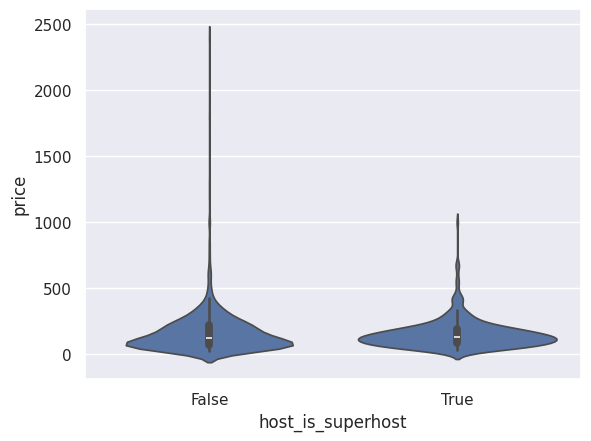

In [ ]:
sns.violinplot(x='host_is_superhost', y='price', data=df)
plt.show()

I am examining the relationship between the categorical variable host_has_profile_pic and the numerical variable review_scores_rating.

In [ ]:
import statsmodels.api as sm

df_encoded = pd.get_dummies(df, columns=['host_has_profile_pic'])
df_encoded['host_has_profile_pic_True'] = df_encoded['host_has_profile_pic_True'].astype(int)


X = df_encoded[['host_has_profile_pic_True']]
y = df_encoded['review_scores_rating']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     review_scores_rating   R-squared:                       0.002
Model:                              OLS   Adj. R-squared:                  0.001
Method:                   Least Squares   F-statistic:                     2.606
Date:                  Mon, 30 Sep 2024   Prob (F-statistic):              0.107
Time:                          21:23:07   Log-Likelihood:                -1064.6
No. Observations:                  1324   AIC:                             2133.
Df Residuals:                      1322   BIC:                             2144.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
co

In [ ]:
sns.violinplot(x='host_has_profile_pic', y='review_scores_rating', data=df)
plt.show()

In both cases, the obtained R coefficient values indicate a very weak association between the selected pairs of variables. None of the categorical variables explains the selected numerical variables.

#9. Analysis of selected variables.

9.1. Which offers are most often chosen because of their name?

[Text(0.5, 1.0, 'Top 10 most frequently appearing offer names')]

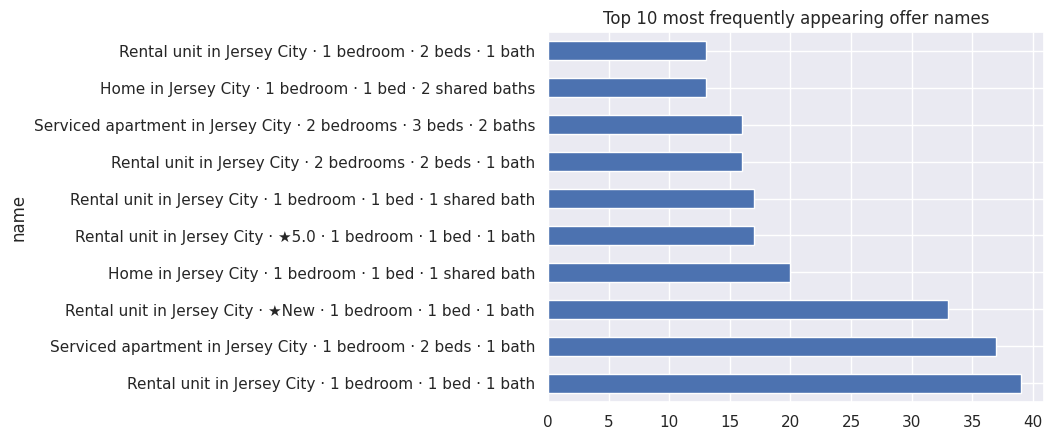

In [ ]:
name_10 = df['name'].value_counts(ascending=False)
name_10.head(10).plot(kind='barh').set(title='Top 10 most frequently appearing offer names')

9.2. What is the relationship between offers with top 10 names and the number of reviews of the offer?

In [ ]:
top_categories = df['name'].value_counts().nlargest(10).index
filtered_data = df[df['name'].isin(top_categories)]

plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='name', y='number_of_reviews', data=filtered_data)
plt.title('Plot for name i number_of_reviews')

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

<ipython-input-237-81b14392d3cc>:8: UserWarning:

FixedFormatter should only be used together with FixedLocator



We can see that the most frequently rated offers are those with a star, 5.0 and 1 room, one bath and one bed in their name. The rest are rated at a similar level, which may suggest that offers with the above-mentioned words in their name are the most popular.

9.3. What is the relationship between the number of bathrooms and the price?

In [ ]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

#Identification of outliers based on IQR
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Their removal
df_no_ouliers = df[(df['price'] > lower_bound) & (df['price'] < upper_bound)]

In [ ]:
fig, ax= plt.subplots(figsize=(10, 5))
sns.scatterplot(data=df_no_ouliers, x='price', y='bathrooms')\
                                                    .set(title='The relationship between the number of bathrooms and the price',
                                                         xlabel='price',
                                                         ylabel='bathrooms')

[Text(0.5, 1.0, 'The relationship between the number of bathrooms and the price'),
 Text(0.5, 0, 'price'),
 Text(0, 0.5, 'bathrooms')]

It can be concluded that in the case of offers with one, one and a half or two bathrooms, this does not affect the price. In general, the correlation coefficient of these two variables is at the level of 0.34, so they are weakly related to each other.

9.4. What is the relationship between room type and price?

<ipython-input-240-1d0c0969effe>:5: UserWarning:

FixedFormatter should only be used together with FixedLocator



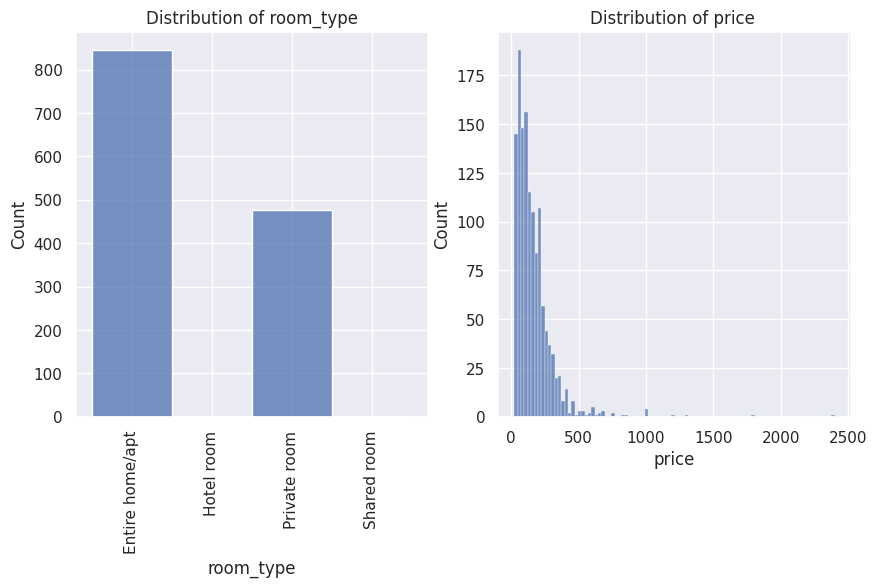

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))


sns.histplot(data=df, x='room_type', ax = axes[0]).set(title='Distribution of room_type')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)


sns.histplot(data=df, x='price', ax = axes[1]).set(title='Distribution of price ')

plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='room_type', y='price', data=filtered_data)
plt.title('Plot for name i number_of_reviews')

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

<ipython-input-241-17cfe67d17e5>:5: UserWarning:

FixedFormatter should only be used together with FixedLocator



We see that the highest prices are for offers with the possibility of renting an entire house/apartment. In the case of renting one separate room, the prices are much lower, although for the price of one room you can find an entire house or apartment. We see that in the case of a private room, the prices are more concentrated than in the case of an entire house or apartment.

#10. An attempt to cluster all types of ratings left by users in order to identify specific groups of guests in order to determine what a given group pays most attention to when evaluating an offer.

Using the DBSCAN algorithm.

In [ ]:
#Makes copies of data for clustering
df_cluster = df.loc[:,['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location']].copy()


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_subset_scaled = scaler.fit_transform(df_cluster)
df_subset_scaled

array([[ 0.61388362,  0.58676602,  0.69017286,  0.44711   ,  0.44842589,
         0.86069269],
       [ 0.18895275,  0.11687177,  0.44735379,  0.13416391,  0.1386528 ,
        -0.52562984],
       [ 0.17047749,  0.13730195,  0.48782363,  0.23045501,  0.043338  ,
        -0.52562984],
       ...,
       [ 0.24437851,  0.25988306,  0.28547441,  0.27860057,  0.3054537 ,
         0.18791852],
       [ 0.24437851,  0.25988306,  0.28547441,  0.27860057,  0.3054537 ,
         0.18791852],
       [ 0.24437851,  0.25988306,  0.28547441,  0.27860057,  0.3054537 ,
         0.18791852]])

<ipython-input-244-a5d76ffe7503>:13: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



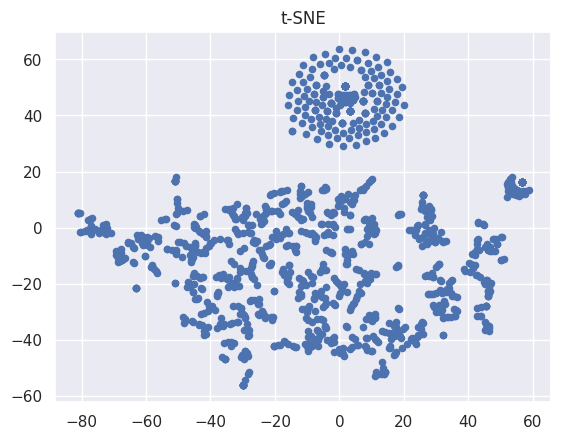

In [ ]:
# Dimensionality Reduction and Data Visualization with t-SNE
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2,
            perplexity=10,
            random_state=42)


df_tsne = tsne.fit_transform(df_subset_scaled)

import matplotlib.pyplot as plt
plt.scatter(df_tsne[:, 0],
            df_tsne[:, 1],
            cmap='viridis',
            s=20)
plt.title('t-SNE')
plt.show()

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_df = pca.fit_transform(df_subset_scaled)
pca_df

array([[ 1.47397935,  0.32870091],
       [ 0.23044285, -0.64858722],
       [ 0.24957588, -0.62997248],
       ...,
       [ 0.64014538, -0.0538854 ],
       [ 0.64014538, -0.0538854 ],
       [ 0.64014538, -0.0538854 ]])

In [ ]:
#Model DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn import metrics

dbscan = DBSCAN(eps=0.005, min_samples=10)
labels_d = dbscan.fit_predict(df_subset_scaled)


In [ ]:
print(f"Silhouette Coefficient: {metrics.silhouette_score(df_subset_scaled, labels_d):.3f}")

Silhouette Coefficient: -0.039


In [ ]:
plt.scatter(df_tsne[:, 0],
            df_tsne[:, 1],
            c=labels_d,
            cmap='viridis',
            s=20)
plt.title('t-SNE after DBSCAN')
plt.show()

In [ ]:
sns.histplot(labels_d, bins=len(set(labels_d)), kde=False)
plt.title('Distribution of obtained clusters')
plt.xlabel('Cluster Label')
plt.ylabel('Count')
plt.show()

In [ ]:
df_viz = pd.DataFrame(df_subset_scaled,
                      columns = df_cluster.columns)

df_viz['labels_d'] = labels_d
df_viz_ = df_viz.groupby('labels_d').mean().reset_index().melt(id_vars = ['labels_d'])

import plotly.express as px
fig = px.line_polar(df_viz_,
                    r = "value",
                    theta = "variable",
                    line_close = True,
                    color = "labels_d",
                    color_discrete_sequence = px.colors.sequential.Plasma_r)


fig.update_layout(polar = dict(
    radialaxis = dict(
      visible = True,
      range = [-2, 2]
    )),
  showlegend = True
)

fig.show()

The results of this basic clustering are unsatisfactory. Although visually we obtained two clusters plus a large amount of noise, the Silhouette Coefficient, which measures clustering quality, indicates that the clusters are not clearly defined or that there is significant overlap between them. The polar plot shows that each group is evenly distributed across the applied features, which unfortunately does not allow for isolating a specific group.